In [ ]:
# Stats 

In [ ]:
Run stats on ADJtma_cleaned 

columns: 
'base_celltypes'
'CT_final'
'CT_metatumour_funcimmu'
'Metabolic_baseCT'
'protein_exp_nb'
'CT_basetumour'
'Metabolic_allcells'


comparison groups: 
'Relapse' : Y/N - Mann Whitney
'Smoking': Y/N - Mann Whitney
 'stage_grouped': stage1,stage2,stage3 - ANOVA?
'Histology': Adenocarcinoma, Squamous - Mann Whiteny 
 'Sex': M/F - Mann Whiteny 
 'Deceased': 0/1 - Mann Whiteny 
 'Mutation': EGRF - Mann Whitney ? 

survival: CoxPH? KM? 
'Surv_status'
'Surv_Followup'
'Relapse_status'
'Relapse_followup'



Make df with proportion of each celltype for each patient + mapped with comparison group information. 


In [11]:
import anndata as ad
import pandas as pd 
import scipy.stats as stats

In [12]:
adata = ad.read_h5ad('adjTMA_cleaned.h5ad')

# DPI plots

In [207]:
dpi[dpi['Histology'].isin(['Adenocarcinoma','Squamous'])]

Unnamed: 0        DPI unique_core  Surv_status  Surv_Followup  \
0             0  58.392343    TMA_A_A8          0.0          583.0   
1             1  17.442824    TMA_A_B8          0.0          583.0   
2             2  15.092194    TMA_A_C8          0.0          631.0   
3             3  35.041262    TMA_A_D8          0.0          631.0   
4             4  65.601428    TMA_A_E8          0.0          654.0   
..          ...        ...         ...          ...            ...   
114         114  45.342269    TMA_B_J2          1.0         2602.0   
115         115  33.604746    TMA_B_J3          0.0          995.0   
116         116  33.985100    TMA_B_J4          1.0          407.0   
117         117  43.918116    TMA_B_J7          0.0         2558.0   
118         118  29.547576    TMA_B_J8          1.0          530.0   

     Relapse_status Relapse_followup       Histology Relapse  
0               0.0              583  Adenocarcinoma      No  
1               0.0              583  Adenocarcinoma      No  
2               0.0              631  Adenocarcinoma      No  
3               0.0              631  Adenocarcinoma      No  
4               0.0              654        Squamous      No  
..              ...              ...             ...     ...  
114             1.0             2262  Adenocarcinoma     Yes  
115             0.0              995  Adenocarcinoma      No  
116             1.0              214  Adenocarcinoma     Yes  
117             0.0             2558  Adenocarcinoma      No  
118             1.0              416  Adenocarcinoma     Yes  

[112 rows x 9 columns]

<Axes: xlabel='Histology', ylabel='DPI'>

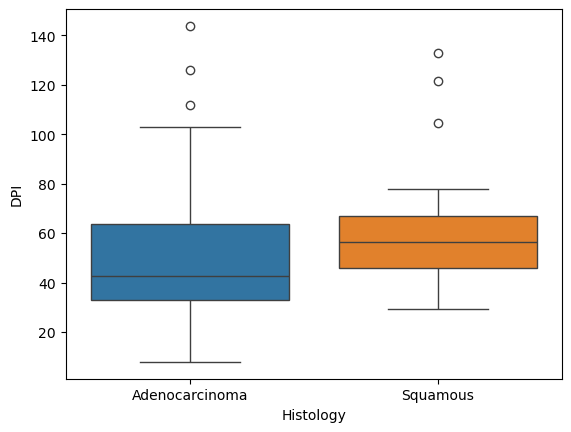

In [208]:
sns.boxplot(data = dpi[dpi['Histology'].isin(['Adenocarcinoma','Squamous'])], x ='Histology', y = 'DPI', hue = 'Histology')

<Axes: xlabel='Histology', ylabel='DPI'>

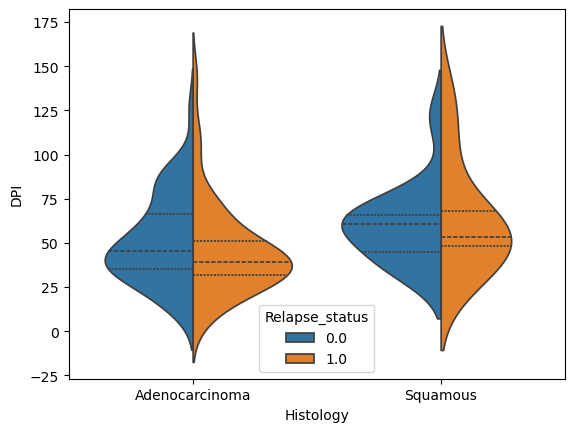

In [212]:
sns.violinplot(data=dpi[dpi['Histology'].isin(['Adenocarcinoma','Squamous'])], x="Histology", y="DPI", hue="Relapse_status", split=True, inner="quart")

<Axes: xlabel='Relapse_status', ylabel='DPI'>

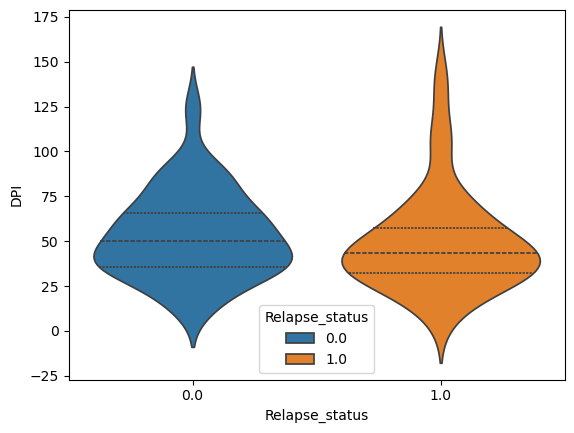

In [213]:
sns.violinplot(data=dpi[dpi['Histology'].isin(['Adenocarcinoma','Squamous'])], x="Relapse_status", y="DPI", hue="Relapse_status", split=False, inner="quart")

In [188]:
mann_whitney_tests(
    input_folder="Metabolic_entropy/unnamed",
    output_dir="mann_whiteny/metabolic_entropy",
    sample="Unnamed: 0",                # your sample identifier column
    remove_samples=[],    # samples to exclude = lC and Squamousadneo
    variable_filter= "Histology",         # variable to filter e.g., 'Region'
    subtype_filter= ['Squamous', 'Adenocarcinoma'],       # allowed values for that variable
    metadata_columns = ['Relapse','Smoking','Histology','Sex', 'Deceased'],
    exclude_columns=['Unnamed: 0','stage_grouped','Mutation','Surv_status','Surv_Followup','Relapse_status','Relapse_followup']# metadata columns to test groupings
)


Error processing file 'global_co_occurence_metabolic.csv': 'Histology'
Error processing file 'metabolicnb_mdi.csv': 'Histology'
All stats saved to mann_whiteny/metabolic_entropy/Mann_Whitney_stats_combined.csv


# Frequency 

In [216]:
freq = pd.read_csv('./Metabolic_entropy/global_cellfreq_df_metabolic.csv')

In [217]:
freq

Unnamed: 0 unique_core   B_cells   CD4_TFH  CD4_cells  CD8_cells  \
0             0    TMA_A_A1  0.000170  0.000000   0.043249   0.023497   
1             1    TMA_A_A2  0.058828  0.010897   0.057249   0.074463   
2             2    TMA_A_A3  0.004581  0.006386   0.123837   0.011106   
3             3    TMA_A_A4  0.002923  0.039609   0.321306   0.016730   
4             4    TMA_A_A5  0.125716  0.021844   0.199954   0.026044   
..          ...         ...       ...       ...        ...        ...   
114         114    TMA_B_J2  0.000636  0.000000   0.016265   0.018264   
115         115    TMA_B_J3  0.001560  0.000520   0.108082   0.058089   
116         116    TMA_B_J4  0.002006  0.000231   0.043059   0.150783   
117         117    TMA_B_J7  0.084385  0.001865   0.185559   0.058433   
118         118    TMA_B_J8  0.020341  0.000394   0.058924   0.065945   

     Cytotoxic_CD8_cells  Fibroblast  Glutamine_import   Hypoxic  ...  \
0               0.000170    0.107441          0.000000  0.000000  ...   
1               0.000474    0.071462          0.001974  0.000079  ...   
2               0.000000    0.073858          0.000139  0.000000  ...   
3               0.000504    0.167204          0.000605  0.000000  ...   
4               0.000000    0.113649          0.013290  0.000000  ...   
..                   ...         ...               ...       ...  ...   
114             0.000000    0.099500          0.025352  0.018719  ...   
115             0.000669    0.015525          0.163943  0.001411  ...   
116             0.000077    0.119222          0.001389  0.001080  ...   
117             0.000274    0.036925          0.052672  0.000439  ...   
118             0.000000    0.036614          0.000591  0.000000  ...   

          PPP  PPP_Glutamine_import  Tumour_metalow   Vessels  Surv_status  \
0    0.017538              0.008684        0.576707  0.081389          0.0   
1    0.000711              0.003711        0.173484  0.105575          0.0   
2    0.018465              0.001388        0.586561  0.039706          1.0   
3    0.091715              0.003326        0.036182  0.013707          0.0   
4    0.008172              0.002597        0.096846  0.049110          0.0   
..        ...                   ...             ...       ...          ...   
114  0.115129              0.011904        0.282962  0.026079          1.0   
115  0.071758              0.225301        0.046130  0.018348          0.0   
116  0.089822              0.006559        0.010263  0.027626          1.0   
117  0.008340              0.018655        0.067815  0.015747          0.0   
118  0.495735              0.005512        0.002559  0.148688          1.0   

     Surv_Followup  Relapse_status  Relapse_followup       Histology  Relapse  
0           1968.0             0.0              1968  Adenocarcinoma       No  
1           1662.0             1.0               234        Squamous      Yes  
2           1025.0             1.0               233  Adenocarcinoma      Yes  
3           1204.0             0.0              1204  Adenocarcinoma       No  
4           1172.0             1.0               907        Squamous      Yes  
..             ...             ...               ...             ...      ...  
114         2602.0             1.0              2262  Adenocarcinoma      Yes  
115          995.0             0.0               995  Adenocarcinoma       No  
116          407.0             1.0               214  Adenocarcinoma      Yes  
117         2558.0             0.0              2558  Adenocarcinoma       No  
118          530.0             1.0               416  Adenocarcinoma      Yes  

[119 rows x 51 columns]

In [223]:
relapse_sig = ['Glutamine_import',
'Hypoxic_Glutamine_import',
'Hypoxic_Lipid_Oxidation_PPP',
'Lipid_Oxidation_Glutamine_import',
'Lipid_Oxidation_PPP',
'Macrophages_M2_PDL1+',
'Macrophages_PDL1+',
'PPP']

<Axes: xlabel='Relapse_status', ylabel='Glutamine_import'>

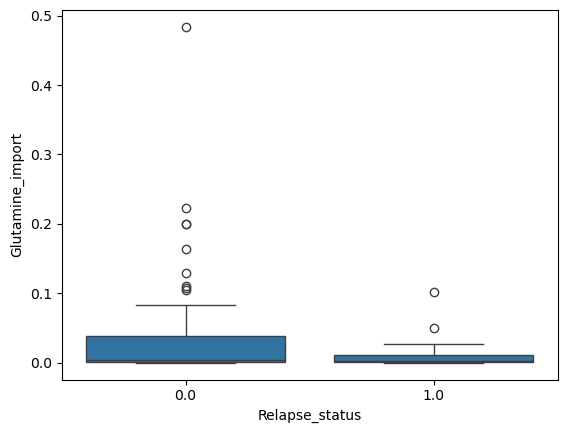

In [225]:
sns.boxplot(data = freq[freq['Histology'].isin(['Adenocarcinoma','Squamous'])], x ='Relapse_status', y = 'Glutamine_import')

<Axes: xlabel='Relapse_status', ylabel='Hypoxic_Glutamine_import'>

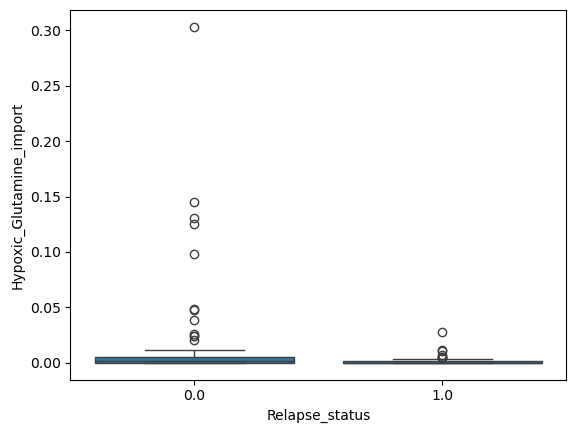

In [226]:
sns.boxplot(data = freq[freq['Histology'].isin(['Adenocarcinoma','Squamous'])], x ='Relapse_status', y = 'Hypoxic_Glutamine_import')

<Axes: xlabel='Relapse_status', ylabel='Hypoxic_Lipid_Oxidation_PPP'>

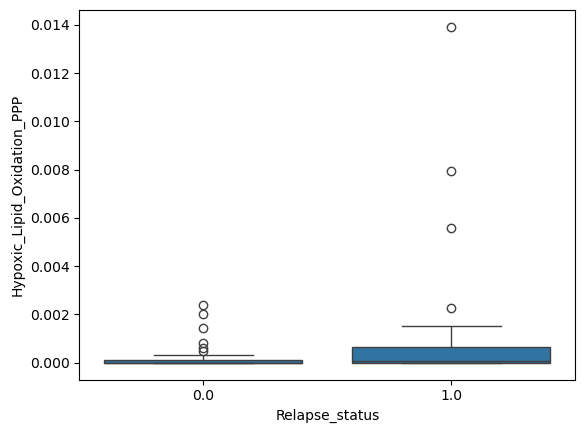

In [227]:
sns.boxplot(data = freq[freq['Histology'].isin(['Adenocarcinoma','Squamous'])], x ='Relapse_status', y = 'Hypoxic_Lipid_Oxidation_PPP')

<Axes: xlabel='Relapse_status', ylabel='Lipid_Oxidation_Glutamine_import'>

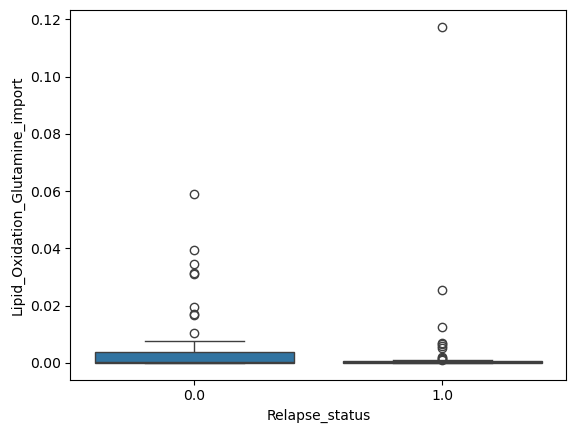

In [228]:
sns.boxplot(data = freq[freq['Histology'].isin(['Adenocarcinoma','Squamous'])], x ='Relapse_status', y = 'Lipid_Oxidation_Glutamine_import')

<Axes: xlabel='Relapse_status', ylabel='Macrophages_M2_PDL1+'>

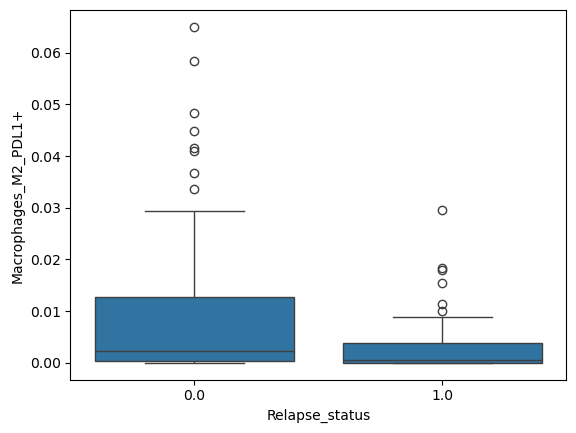

In [229]:
sns.boxplot(data = freq[freq['Histology'].isin(['Adenocarcinoma','Squamous'])], x ='Relapse_status', y = 'Macrophages_M2_PDL1+')

<Axes: xlabel='Relapse_status', ylabel='Macrophages_PDL1+'>

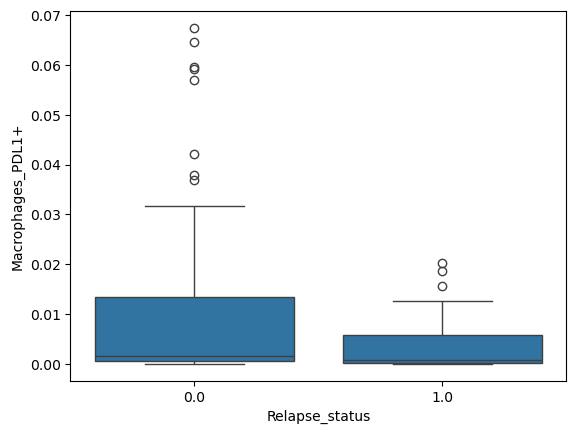

In [230]:
sns.boxplot(data = freq[freq['Histology'].isin(['Adenocarcinoma','Squamous'])], x ='Relapse_status', y = 'Macrophages_PDL1+')

<Axes: xlabel='Relapse_status', ylabel='PPP'>

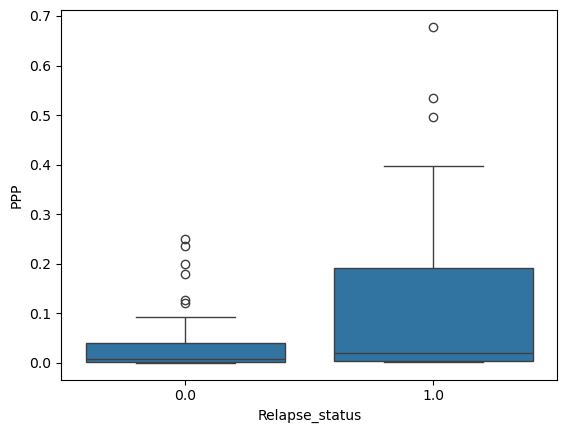

In [231]:
sns.boxplot(data = freq[freq['Histology'].isin(['Adenocarcinoma','Squamous'])], x ='Relapse_status', y = 'PPP')

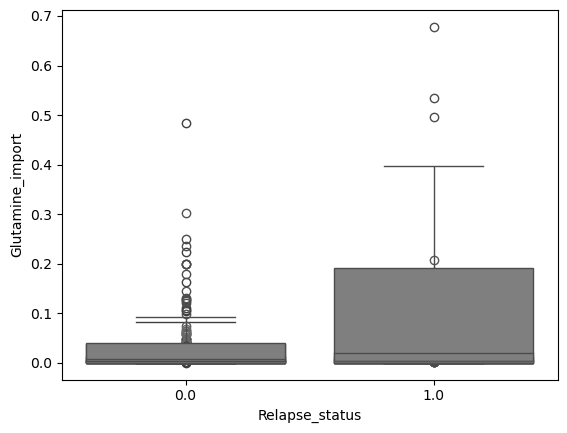

In [224]:

sns.boxplot(data = freq[freq['Histology'].isin(['Adenocarcinoma','Squamous'])], x ='Relapse_status', y = cell)

## 2/05/2025: New stats using the xbounds 

Stat tests on the feature_csv folder. 

1. Create full dataframe using the csv in Feature_csv folder.
2. Create new csv with the joined dataframes
3. Do univariate stat tests: Relapse, histology, stage, smoking, mutation
4. Do kaplan meier univariate for; ~~ Time to relapse, overall survival ~~ 

In [14]:
import scanpy as sc 
import anndata as ad 
import pandas as pd

In [15]:
adata = sc.read_h5ad('adjTMA_xbounds.h5ad')

df1_unique = adata.obs.drop_duplicates(subset='unique_core', keep='first')

In [4]:
input_dir = './Feature_csv' 
output_dir = './Feature_csv/stats' 


In [7]:
#### Create feature csv

In [244]:
import pandas as pd
import glob
import os

# Path to folder containing CSVs
csv_folder = input_dir

# Get list of all CSV files
csv_files = glob.glob(os.path.join(csv_folder, "*.csv"))

# Load and merge CSVs on 'unique_core'
dfs = []
for f in csv_files:
    df = pd.read_csv(f)
    df['unique_core'] = df['unique_core'].astype(str).str.strip()  # remove leading/trailing spaces
    dfs.append(df)

# Combine them all on 'unique_core'
from functools import reduce

big_df = reduce(lambda left, right: pd.merge(left, right, on='unique_core', how='outer'), dfs)

#big_df = pd.merge(big_df, df1_unique[['unique_core', 'Histology','Relapse','Mutation', 'Surv_status',
#       'Surv_Followup', 'Relapse_status', 'Relapse_followup','stage_grouped' ]], on='unique_core', how='left')

big_df.to_csv(f'./{input_dir}/full_feature_entropy.csv')


MergeError: Passing 'suffixes' which cause duplicate columns {'Histology_x', 'Relapse_x', 'Unnamed: 0_x'} is not allowed.

In [941]:
import os
import glob
import pandas as pd
from functools import reduce

# Path to folder containing CSVs
csv_folder = input_dir

# Get list of all CSV files
csv_files = glob.glob(os.path.join(csv_folder, "*.csv"))

# Load, rename, and merge CSVs on 'unique_core'
dfs = []
for f in csv_files:
    df = pd.read_csv(f)
    df['unique_core'] = df['unique_core'].astype(str).str.strip() # clean unique_core

    # Get first 5 characters of the filename (without folder path and extension)
    prefix = os.path.basename(f)[:10]

    # Drop columns you don't want duplicated
    cols_to_drop = ['Histology', 'Relapse', 'Surv_status', 'Relapse_status',
                    'Surv_Followup', 'Relapse_followup', 'stage_grouped', 'Unnamed: 0']
    df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

    # Rename columns (except 'unique_core') with prefix
    df = df.rename(columns={col: f"{prefix}_{col}" for col in df.columns if col != 'unique_core'})

    dfs.append(df)

# Merge them all on 'unique_core'
big_df = reduce(lambda left, right: pd.merge(left, right, on='unique_core', how='outer'), dfs)

# (Optional) Merge metadata dataframe if needed later
# big_df = pd.merge(big_df, df1_unique[['unique_core', 'Histology','Relapse','Mutation', 'Surv_status',
#        'Surv_Followup', 'Relapse_status', 'Relapse_followup','stage_grouped']], 
#        on='unique_core', how='left')

# Export to CSV



In [260]:
# Merge df1_unique (only unique patients) with df2 on the 'patient' column
feature_csv = pd.merge(big_df, df1_unique[['unique_core', 'Mutation','Histology', 'Relapse', 'stage_grouped','Smoking',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup']], on='unique_core', how='left')

In [261]:
feature_csv.to_csv(f'./{input_dir}/full_feature_entropywithhistology.csv')

In [17]:
df = pd.read_csv('Feature_csv/Aaron/features_filtered.csv')

In [21]:
df.rename(columns= {'Unnamed: 0': 'unique_core'}, inplace = True)

In [23]:
feature_csv = pd.merge(df, df1_unique[['unique_core', 'Mutation','Histology', 'stage_grouped','Smoking',
       ]], on='unique_core', how='left')

#### Functions

In [24]:
import os
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

def mann_whitney_tests(input_folder, output_dir, sample, remove_samples, variable_filter, subtype_filter, metadata_columns, exclude_columns=None):
    os.makedirs(output_dir, exist_ok=True)
    stats_records = []
    files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

    # Ensure exclude_columns is a list
    if exclude_columns is None:
        exclude_columns = []

    for file in files:
        try:
            df = pd.read_csv(os.path.join(input_folder, file))

            # keep specified samples and keep specified variable subtype
            df = df[df[sample].isin(remove_samples)]
            df = df[df[variable_filter].isin(subtype_filter)]

            for meta in metadata_columns:
                if meta not in df.columns:
                    print(f"Metadata column '{meta}' not found in {file}, skipping.")
                    continue

                for feature in df.columns:
                    if feature in [sample, variable_filter] + metadata_columns + exclude_columns:
                        continue

                    try:
                        df_subset = df[[meta, feature]].dropna()

                        # Skip if less than 2 unique groups
                        if df_subset[meta].nunique() < 2:
                            continue

                        groups = df_subset[meta].unique()
                        group1 = df_subset[df_subset[meta] == groups[0]][feature]
                        group2 = df_subset[df_subset[meta] == groups[1]][feature]

                        if len(group1) < 2 or len(group2) < 2:
                            continue

                        U_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

                        mean_group1 = np.mean(group1)
                        mean_group2 = np.mean(group2)
                        std_group1 = np.std(group1, ddof=1)
                        std_group2 = np.std(group2, ddof=1)

                        n1, n2 = len(group1), len(group2)
                        U_mean = n1 * n2 / 2
                        U_std = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
                        Z_score = (U_stat - U_mean) / U_std if U_std != 0 else np.nan

                        stats_records.append({
                            "File": file,
                            "Feature": feature,
                            "Metadata": meta,
                            "p-value": p_value,
                            "Z-score": Z_score,
                            "Mean Group 1": mean_group1,
                            "Mean Group 2": mean_group2,
                            "Std Group 1": std_group1,
                            "Std Group 2": std_group2,
                            "U_stat": U_stat
                        })

                    except Exception as e:
                        print(f"Error processing feature '{feature}' with metadata '{meta}' in file '{file}': {e}")

        except Exception as e:
            print(f"Error processing file '{file}': {e}")

    stats_df = pd.DataFrame(stats_records)
    stats_csv_path = os.path.join(output_dir, "Mann_Whitney_stats_combined.csv")
    stats_df.to_csv(stats_csv_path, index=False)
    print(f"All stats saved to {stats_csv_path}")


In [25]:
import os
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

def kaplan_meier_by_median(input_folder, output_dir, sample, remove_samples, variable_filter, subtype_filter, time_column, event_column, exclude_columns=None):
    os.makedirs(output_dir, exist_ok=True)
    stats_records = []
    files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

    if exclude_columns is None:
        exclude_columns = []

    for file in files:
        try:
            df = pd.read_csv(os.path.join(input_folder, file))

            # Keep specified samples and keep specified variable subtype
            df = df[df[sample].isin(remove_samples)]
            df = df[df[variable_filter].isin(subtype_filter)]

            for feature in df.columns:
                if feature in [sample, variable_filter, time_column, event_column] + exclude_columns:
                    continue

                try:
                    df_subset = df[[time_column, event_column, feature]].dropna()

                    if len(df_subset) < 4:
                        continue

                    median_value = df_subset[feature].median()

                    # Split into two groups based on median
                    df_subset['group'] = np.where(df_subset[feature] > median_value, 'High', 'Low')

                    group_counts = df_subset['group'].value_counts()
                    if group_counts.min() < 2:
                        continue

                    T_high = df_subset[df_subset['group'] == 'High'][time_column]
                    E_high = df_subset[df_subset['group'] == 'High'][event_column]
                    T_low  = df_subset[df_subset['group'] == 'Low'][time_column]
                    E_low  = df_subset[df_subset['group'] == 'Low'][event_column]

                    # Log-rank test
                    result = logrank_test(T_high, T_low, event_observed_A=E_high, event_observed_B=E_low)

                    stats_records.append({
                        "File": file,
                        "Feature": feature,
                        "p-value": result.p_value,
                        "Logrank Test Statistic": result.test_statistic,
                        "n_High": len(T_high),
                        "n_Low": len(T_low)
                    })

                except Exception as e:
                    print(f"Error processing feature '{feature}' in file '{file}': {e}")

        except Exception as e:
            print(f"Error processing file '{file}': {e}")

    stats_df = pd.DataFrame(stats_records)
    stats_csv_path = os.path.join(output_dir, "Kaplan_Meier_by_median_stats.csv")
    stats_df.to_csv(stats_csv_path, index=False)
    print(f"All stats saved to {stats_csv_path}")


In [26]:
### Running the samples - creating test and validation cohorts: 
training = [
 'TMA_A_A2',
 'TMA_A_A5',
 'TMA_A_A6',
 'TMA_A_C1',
 'TMA_A_C6',
 'TMA_A_C7',
 'TMA_A_E4',
 'TMA_A_E6',
 'TMA_A_E7',
 'TMA_A_G2',
 'TMA_A_G5',
 'TMA_A_G6',
 'TMA_A_G7',
 'TMA_A_I7',
 'TMA_B_A1',
 'TMA_B_A2',
 'TMA_B_A6',
 'TMA_B_C3',
 'TMA_B_C7',
 'TMA_B_E5',
 'TMA_B_G5',
 'TMA_B_G6',
 'TMA_B_I2',
 'TMA_B_I3',
 'TMA_A_B3',
 'TMA_A_B4',
 'TMA_A_B7',
 'TMA_A_D5',
 'TMA_A_F1',
 'TMA_A_F3',
 'TMA_A_F5',
 'TMA_A_H1',
 'TMA_A_J2',
 'TMA_A_J4',
 'TMA_A_J5',
 'TMA_A_J6',
 'TMA_B_B8',
 'TMA_B_D1',
 'TMA_B_D2',
 'TMA_B_D6',
 'TMA_B_D8',
 'TMA_B_F2',
 'TMA_B_F3',
 'TMA_B_F4',
 'TMA_B_F8',
 'TMA_B_H4',
 #'TMA_B_H7',
 'TMA_B_J7',
 'TMA_A_C2',
 'TMA_A_C3',
 'TMA_B_D4',
 'TMA_B_C5',
 'TMA_B_G1',
 'TMA_B_G3',
 'TMA_B_I8']

validation = [ 'TMA_A_B2',
 'TMA_A_B5',
 'TMA_A_B6',
 'TMA_A_D1',
 'TMA_A_D6',
 'TMA_A_D7',
 'TMA_A_F4',
 'TMA_A_F6',
 'TMA_A_F7',
 'TMA_A_H2',
 'TMA_A_H5',
 'TMA_A_H6',
 'TMA_A_H7',
 'TMA_A_J7',
 'TMA_B_B1',
 'TMA_B_B2',
 'TMA_B_B6',
 'TMA_B_D3',
 'TMA_B_D7',
 'TMA_B_F5',
 'TMA_B_H5',
 'TMA_B_H6',
 'TMA_B_J2',
 'TMA_B_J3',
 'TMA_A_A3',
 'TMA_A_A4',
 'TMA_A_A7',
 'TMA_A_C5',
 'TMA_A_E1',
 'TMA_A_E3',
 'TMA_A_E5',
 'TMA_A_G1',
 'TMA_A_I2',
 'TMA_A_I4',
 'TMA_A_I5',
 'TMA_A_I6',
 'TMA_B_A8',
 'TMA_B_C1',
 'TMA_B_C2',
 'TMA_B_C6',
 'TMA_B_C8',
 'TMA_B_E2',
 'TMA_B_E3',
 'TMA_B_E4',
 'TMA_B_E8',
 'TMA_B_G4',
 'TMA_B_G7',
 'TMA_B_I7',
'TMA_A_A1',
 'TMA_A_C4',
 'TMA_A_G3',
 #'TMA_A_G4',
 'TMA_A_I3',
 'TMA_B_J4', 
              #'TMA_B_H7'
             ]


### Run the code 

In [125]:

validation.append("TMA_A_G4")
training.append("TMA_A_G4")




In [ ]:
df_full = pd.read_csv('Feature_csv/Aaron/big/all_features_forNaomi.csv') 

In [36]:
df_stats = pd.merge(df_full,df[['Unnamed: 0','Relapse','Relapse_status', 'Relapse_followup']],on='Unnamed: 0', how='left')

In [29]:
df = pd.read_csv('Feature_csv/Aaron/all_features_forNaomi_old.csv')
samples = list(df['Unnamed: 0'])
samples

['TMA_A_A1',
 'TMA_A_A2',
 'TMA_A_A3',
 'TMA_A_A4',
 'TMA_A_A5',
 'TMA_A_A6',
 'TMA_A_A7',
 'TMA_A_B2',
 'TMA_A_B3',
 'TMA_A_B4',
 'TMA_A_B5',
 'TMA_A_B6',
 'TMA_A_B7',
 'TMA_A_C1',
 'TMA_A_C2',
 'TMA_A_C3',
 'TMA_A_C4',
 'TMA_A_C5',
 'TMA_A_C6',
 'TMA_A_C7',
 'TMA_A_D1',
 'TMA_A_D5',
 'TMA_A_D6',
 'TMA_A_D7',
 'TMA_A_E1',
 'TMA_A_E3',
 'TMA_A_E4',
 'TMA_A_E5',
 'TMA_A_E6',
 'TMA_A_E7',
 'TMA_A_F1',
 'TMA_A_F3',
 'TMA_A_F4',
 'TMA_A_F5',
 'TMA_A_F6',
 'TMA_A_F7',
 'TMA_A_G1',
 'TMA_A_G2',
 'TMA_A_G3',
 'TMA_A_G4',
 'TMA_A_G5',
 'TMA_A_G6',
 'TMA_A_G7',
 'TMA_A_H1',
 'TMA_A_H2',
 'TMA_A_H5',
 'TMA_A_H6',
 'TMA_A_H7',
 'TMA_A_I2',
 'TMA_A_I3',
 'TMA_A_I5',
 'TMA_A_I6',
 'TMA_A_I7',
 'TMA_A_J2',
 'TMA_A_J5',
 'TMA_A_J6',
 'TMA_A_J7',
 'TMA_B_A1',
 'TMA_B_A2',
 'TMA_B_A6',
 'TMA_B_A8',
 'TMA_B_B1',
 'TMA_B_B2',
 'TMA_B_B6',
 'TMA_B_B8',
 'TMA_B_C1',
 'TMA_B_C2',
 'TMA_B_C3',
 'TMA_B_C5',
 'TMA_B_C6',
 'TMA_B_C7',
 'TMA_B_C8',
 'TMA_B_D1',
 'TMA_B_D2',
 'TMA_B_D3',
 'TMA_B_D4',
 'TMA_B_D6',

In [37]:
df_filter = df_full.loc[:, df_full.nunique() > 60]

In [41]:
df_filter = pd.merge(df_filter,df[['Unnamed: 0','Relapse','Relapse_status', 'Relapse_followup']],on='Unnamed: 0', how='left')

In [42]:
df_filter.to_csv("Feature_csv/Aaron/features_filtered.csv")

In [99]:
### ALL

mann_whitney_tests(
    input_folder="Feature_csv/Aaron",
    output_dir="Feature_csv/mann_whitney/02072025_all_aaron/training",
    sample="Unnamed: 0",                # your sample identifier column
    remove_samples=training,    # samples to exclude = lC and Squamousadneo
    variable_filter= "Unnamed: 0",         # variable to filter e.g., 'Region'
    subtype_filter= samples, #'Squamous', 'Adenocarcinoma'],       # allowed values for that variable
    metadata_columns = ['Relapse','Smoking','Histology','Sex', 'Deceased'],
    exclude_columns=['stage_grouped','Mutation','Surv_status','Surv_Followup','Relapse_status','Relapse_followup']# metadata columns to test groupings
)

Metadata column 'Smoking' not found in features_filtered.csv, skipping.
Metadata column 'Histology' not found in features_filtered.csv, skipping.
Metadata column 'Sex' not found in features_filtered.csv, skipping.
Metadata column 'Deceased' not found in features_filtered.csv, skipping.
All stats saved to Feature_csv/mann_whitney/02072025_all_aaron/training/Mann_Whitney_stats_combined.csv


In [100]:
### ALL

mann_whitney_tests(
    input_folder="Feature_csv/Aaron",
    output_dir="Feature_csv/mann_whitney/02072025_all_aaron/valdiation",
    sample="Unnamed: 0",                # your sample identifier column
    remove_samples=validation,    # samples to exclude = lC and Squamousadneo
    variable_filter= "Unnamed: 0",         # variable to filter e.g., 'Region'
    subtype_filter= samples,       # allowed values for that variable
    metadata_columns = ['Relapse','Smoking','Histology','Sex', 'Deceased'],
    exclude_columns=['stage_grouped','Mutation','Surv_status','Surv_Followup','Relapse_status','Relapse_followup']# metadata columns to test groupings
)

Metadata column 'Smoking' not found in features_filtered.csv, skipping.
Metadata column 'Histology' not found in features_filtered.csv, skipping.
Metadata column 'Sex' not found in features_filtered.csv, skipping.
Metadata column 'Deceased' not found in features_filtered.csv, skipping.
All stats saved to Feature_csv/mann_whitney/02072025_all_aaron/valdiation/Mann_Whitney_stats_combined.csv


In [101]:
### SQUAMOUS

mann_whitney_tests(
    input_folder="Feature_csv/Aaron",
    output_dir="Feature_csv/mann_whitney/02072025_all_aaron/training_squamous",
    sample="Unnamed: 0",                # your sample identifier column
    remove_samples=training,    # samples to exclude = lC and Squamousadneo
    variable_filter= "Unnamed: 0",         # variable to filter e.g., 'Region'
    subtype_filter= Squamous, #'Squamous', 'Adenocarcinoma'],       # allowed values for that variable
    metadata_columns = ['Relapse','Smoking','Histology','Sex', 'Deceased'],
    exclude_columns=['stage_grouped','Mutation','Surv_status','Surv_Followup','Relapse_status','Relapse_followup']# metadata columns to test groupings
)

Metadata column 'Smoking' not found in features_filtered.csv, skipping.
Metadata column 'Histology' not found in features_filtered.csv, skipping.
Metadata column 'Sex' not found in features_filtered.csv, skipping.
Metadata column 'Deceased' not found in features_filtered.csv, skipping.
All stats saved to Feature_csv/mann_whitney/02072025_all_aaron/training_squamous/Mann_Whitney_stats_combined.csv


In [102]:
### SQUAMOUS

mann_whitney_tests(
    input_folder="Feature_csv/Aaron",
    output_dir="Feature_csv/mann_whitney/02072025_all_aaron/valdiation_squamous",
    sample="Unnamed: 0",                # your sample identifier column
    remove_samples=validation,    # samples to exclude = lC and Squamousadneo
    variable_filter= "Unnamed: 0",         # variable to filter e.g., 'Region'
    subtype_filter= Squamous,       # allowed values for that variable
    metadata_columns = ['Relapse','Smoking','Histology','Sex', 'Deceased'],
    exclude_columns=['stage_grouped','Mutation','Surv_status','Surv_Followup','Relapse_status','Relapse_followup']# metadata columns to test groupings
)

Metadata column 'Smoking' not found in features_filtered.csv, skipping.
Metadata column 'Histology' not found in features_filtered.csv, skipping.
Metadata column 'Sex' not found in features_filtered.csv, skipping.
Metadata column 'Deceased' not found in features_filtered.csv, skipping.
All stats saved to Feature_csv/mann_whitney/02072025_all_aaron/valdiation_squamous/Mann_Whitney_stats_combined.csv


In [103]:
### ADENO

mann_whitney_tests(
    input_folder="Feature_csv/Aaron",
    output_dir="Feature_csv/mann_whitney/02072025_all_aaron/training_adeno",
    sample="Unnamed: 0",                # your sample identifier column
    remove_samples=training,    # samples to keep = lC and Squamousadneo
    variable_filter= "Unnamed: 0",         # variable to filter e.g., 'Region'
    subtype_filter= adeno, #'Squamous', 'Adenocarcinoma'],       # allowed values for that variable
    metadata_columns = ['Relapse','Smoking','Histology','Sex', 'Deceased'],
    exclude_columns=['stage_grouped','Mutation','Surv_status','Surv_Followup','Relapse_status','Relapse_followup']# metadata columns to test groupings
)

Metadata column 'Smoking' not found in features_filtered.csv, skipping.
Metadata column 'Histology' not found in features_filtered.csv, skipping.
Metadata column 'Sex' not found in features_filtered.csv, skipping.
Metadata column 'Deceased' not found in features_filtered.csv, skipping.
All stats saved to Feature_csv/mann_whitney/02072025_all_aaron/training_adeno/Mann_Whitney_stats_combined.csv


In [104]:
### ADENO 

mann_whitney_tests(
    input_folder="Feature_csv/Aaron",
    output_dir="Feature_csv/mann_whitney/02072025_all_aaron/valdiation_adeno",
    sample="Unnamed: 0",                # your sample identifier column
    remove_samples=validation,    # samples to exclude = lC and Squamousadneo
    variable_filter= "Unnamed: 0",         # variable to filter e.g., 'Region'
    subtype_filter= adeno,       # allowed values for that variable
    metadata_columns = ['Relapse','Smoking','Histology','Sex', 'Deceased'],
    exclude_columns=['stage_grouped','Mutation','Surv_status','Surv_Followup','Relapse_status','Relapse_followup']# metadata columns to test groupings
)

Metadata column 'Smoking' not found in features_filtered.csv, skipping.
Metadata column 'Histology' not found in features_filtered.csv, skipping.
Metadata column 'Sex' not found in features_filtered.csv, skipping.
Metadata column 'Deceased' not found in features_filtered.csv, skipping.
All stats saved to Feature_csv/mann_whitney/02072025_all_aaron/valdiation_adeno/Mann_Whitney_stats_combined.csv


## Kaplan Meier 

In [105]:
# All


kaplan_meier_by_median(
    input_folder="Feature_csv/Aaron",
    output_dir = "Feature_csv/kaplan_meier/02072025_all_aaron/training", 
    sample ="Unnamed: 0", 
    remove_samples = training, 
    variable_filter= "Unnamed: 0",         # variable to filter e.g., 'Region'
    subtype_filter= samples,
    time_column="Relapse_followup",
    event_column="Relapse_status",
    exclude_columns=['stage_grouped','Mutation','Surv_status','Surv_Followup','Relapse_followup','Relapse','Smoking','Histology','Sex', 'Deceased']
)

All stats saved to Feature_csv/kaplan_meier/02072025_all_aaron/training/Kaplan_Meier_by_median_stats.csv


In [106]:



kaplan_meier_by_median(
    input_folder="Feature_csv/Aaron",
    output_dir = "Feature_csv/kaplan_meier/02072025_all_aaron/valdiation", 
    sample ="Unnamed: 0", 
    remove_samples = validation, 
    variable_filter= "Unnamed: 0",         # variable to filter e.g., 'Region'
    subtype_filter= samples,
    time_column="Relapse_followup",
    event_column="Relapse_status",
    exclude_columns=['stage_grouped','Mutation','Surv_status','Surv_Followup','Relapse_followup','Relapse','Smoking','Histology','Sex', 'Deceased']
)

All stats saved to Feature_csv/kaplan_meier/02072025_all_aaron/valdiation/Kaplan_Meier_by_median_stats.csv


In [107]:
# Adeno


kaplan_meier_by_median(
    input_folder="Feature_csv/Aaron",
    output_dir = "Feature_csv/kaplan_meier/02072025_all_aaron/training_adeno", 
    sample ="Unnamed: 0", 
    remove_samples = training, 
    variable_filter= "Unnamed: 0",         # variable to filter e.g., 'Region'
    subtype_filter= adeno,
    time_column="Relapse_followup",
    event_column="Relapse_status",
    exclude_columns=['stage_grouped','Mutation','Surv_status','Surv_Followup','Relapse_followup','Relapse','Smoking','Histology','Sex', 'Deceased']
)

All stats saved to Feature_csv/kaplan_meier/02072025_all_aaron/training_adeno/Kaplan_Meier_by_median_stats.csv


In [108]:



kaplan_meier_by_median(
    input_folder="Feature_csv/Aaron",
    output_dir = "Feature_csv/kaplan_meier/02072025_all_aaron/valdiation_adeno", 
    sample ="Unnamed: 0", 
    remove_samples = validation, 
    variable_filter= "Unnamed: 0",         # variable to filter e.g., 'Region'
    subtype_filter= adeno,
    time_column="Relapse_followup",
    event_column="Relapse_status",
    exclude_columns=['stage_grouped','Mutation','Surv_status','Surv_Followup','Relapse_followup','Relapse','Smoking','Histology','Sex', 'Deceased']
)

All stats saved to Feature_csv/kaplan_meier/02072025_all_aaron/valdiation_adeno/Kaplan_Meier_by_median_stats.csv


In [109]:
# Squamous


kaplan_meier_by_median(
    input_folder="Feature_csv/Aaron",
    output_dir = "Feature_csv/kaplan_meier/02072025_all_aaron/training_squamous", 
    sample ="Unnamed: 0", 
    remove_samples = training, 
    variable_filter= "Unnamed: 0",         # variable to filter e.g., 'Region'
    subtype_filter= Squamous,
    time_column="Relapse_followup",
    event_column="Relapse_status",
    exclude_columns=['stage_grouped','Mutation','Surv_status','Surv_Followup','Relapse_followup','Relapse','Smoking','Histology','Sex', 'Deceased']
)

All stats saved to Feature_csv/kaplan_meier/02072025_all_aaron/training_squamous/Kaplan_Meier_by_median_stats.csv


In [110]:



kaplan_meier_by_median(
    input_folder="Feature_csv/Aaron",
    output_dir = "Feature_csv/kaplan_meier/02072025_all_aaron/valdiation_squamous", 
    sample ="Unnamed: 0", 
    remove_samples = validation, 
    variable_filter= "Unnamed: 0",         # variable to filter e.g., 'Region'
    subtype_filter= Squamous,
    time_column="Relapse_followup",
    event_column="Relapse_status",
    exclude_columns=['stage_grouped','Mutation','Surv_status','Surv_Followup','Relapse_followup','Relapse','Smoking','Histology','Sex', 'Deceased']
)

All stats saved to Feature_csv/kaplan_meier/02072025_all_aaron/valdiation_squamous/Kaplan_Meier_by_median_stats.csv


## Plots 

In [135]:
pwd()

'/mnt/c/Users/NaomiBerrell/Nextcloud/SPATIALOMX-Q4777/Naomi/Projects/ADjTMA/Metabolic_clustring_investigation'

In [2]:
df_filter = pd.read_csv('Feature_csv/Aaron/features_filtered.csv')

In [3]:
df_metadata = pd.read_csv('Feature_csv/full_feature/full_feature_entropy.csv')

In [4]:
df_filter['unique_core']= df_filter['Unnamed: 0']

In [5]:
df_filter = pd.merge(df_filter, df_metadata[['unique_core','Relapse',
                                  'Histology'
                                  ]],
                  on='unique_core', how='left')

df_metadata['Histology']

0      Adenocarcinoma
1            Squamous
2      Adenocarcinoma
3      Adenocarcinoma
4            Squamous
            ...      
105    Adenocarcinoma
106    Adenocarcinoma
107    Adenocarcinoma
108    Adenocarcinoma
109    Adenocarcinoma
Name: Histology, Length: 110, dtype: object

In [8]:
import numpy as np

In [9]:
# add 

# Add a new column based on whether ID is in training_ids
df_filter['Set'] = np.where(df_filter['Unnamed: 0'].isin(training), 'training', 'validation')

print(df_filter)

     Unnamed: 0.1 Unnamed: 0  \
0               0   TMA_A_A1   
1               1   TMA_A_A2   
2               2   TMA_A_A3   
3               3   TMA_A_A4   
4               4   TMA_A_A5   
..            ...        ...   
101           101   TMA_B_J2   
102           102   TMA_B_J3   
103           103   TMA_B_J4   
104           104   TMA_B_J7   
105           105   TMA_B_J8   

     JSDScores@k2CNs@CT_basetumour@CT_basetumour@AllCells_0_Macrophages_M2_PDL1+_Vessels  \
0                                                  NaN                                     
1                                             0.849263                                     
2                                             0.766869                                     
3                                             0.668055                                     
4                                             0.776492                                     
..                                                 ...         

In [133]:
all_samples = ['nb:Metabolic_allcellsHypoxic_Lipid_Oxidation_PPP:Stroma',
'nb:Metabolic_allcellsLipid_Oxidation_PPP_Glutamine_import:Tumour',
'nb:Metabolic_baseCT_filteredFibroblastPhenotype:Stroma',
'nb:Metabolic_baseCT_filteredCD4_cellsLipid_Oxidation_PPP:Stroma',
'nb:Metabolic_baseCT_filteredOther_Stromal_cellsLipid_Oxidation_PPP_Glutamine_import:Stroma',
'nb:structural_immune_tumour_functionalImmuneCell_PD1:Stroma',
'nb:structural_immune_tumour_functionalImmuneCell_PD1:Tumour_Stroma_interface',
'nb:structural_immune_tumour_functionalStructuralCell_PD1_ICOS:Stroma',
'nb:Metabolic_allcellsHypoxic_Lipid_Oxidation_PPP:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredFibroblastPhenotype:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredCD4_cellsLipid_Oxidation_PPP:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredOther_Stromal_cellsLipid_Oxidation_PPP_Glutamine_import:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredCD4_cellsPPP_Glutamine_import:Tumour_duplicated_0',
'nb:Metabolic_baseCT_filteredFibroblastGlutamine_import:Stroma_duplicated_0',
'nb:structural_immune_tumour_functionalImmuneCell_PD1:Stroma_duplicated_0',
'nb:structural_immune_tumour_functionalImmuneCell_PD1:Tumour_duplicated_0',
'nb:structural_immune_tumour_functionalImmuneCell_PDL1_GRZMB:Stroma_duplicated_0',
'nb:structural_immune_tumour_functionalStructuralCell_PD1_ICOS:Stroma_duplicated_0',
'GCrossCorr@CT_final@CT_final@Cytotoxic_CD8_cells_to_Tumour',
'GCrossCorr@CT_metatumour@CT_metatumour@Hypoxic_to_Macrophages_M2',
'Entropy@all_cells__Metabolic_baseCT_FibroblastGlutamine_import',
'Entropy@all_cells__Metabolic_baseCT_Other_Stromal_cellsGlutamine_import',
'Entropy@all_cells__Metabolic_allcells_Hypoxic_Lipid_Oxidation_PPP']

luad = ['GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD8_cellsLipid_Oxidation_PPP_to_TumourLipid_Oxidation',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@FibroblastHypoxic_PPP_to_FibroblastLipid_Oxidation',
'Entropy@all_cells__Metabolic_baseCT_CD4_cellsLipid_Oxidation_PPP_Glutamine_import']

lusc = ['nb:Metabolic_allcellsHypoxic:Tumour_Stroma_interface',
'nb:Metabolic_allcellsHypoxic_Glutamine_import:Stroma',
'nb:Metabolic_allcellsGlutamine_import:Stroma',
'nb:Metabolic_allcellsLipid_Oxidation_PPP:Stroma',
'nb:Metabolic_allcellsLipid_Oxidation_PPP_Glutamine_import:Stroma',
'nb:Metabolic_baseCT_filteredOther_Stromal_cellsLipid_Oxidation_PPP:Stroma',
'nb:Metabolic_baseCT_filteredVesselsLipid_Oxidation_PPP:Stroma',
'nb:Metabolic_baseCT_filteredFibroblastLipid_Oxidation_PPP_Glutamine_import:Stroma',
'nb:Metabolic_baseCT_filteredOther_Stromal_cellsHypoxic_Glutamine_import:Tumour_Stroma_interface',
'nb:Metabolic_baseCT_filteredCD4_cellsLipid_Oxidation_PPP:Stroma',
'nb:Metabolic_baseCT_filteredFibroblastLipid_Oxidation_PPP:Stroma',
'nb:Metabolic_baseCT_filteredMacrophagesHypoxic_Glutamine_import:Stroma',
'nb:Metabolic_baseCT_filteredOther_Stromal_cellsGlutamine_import:Stroma',
'nb:Metabolic_baseCT_filteredOther_Stromal_cellsLipid_Oxidation_PPP_Glutamine_import:Stroma',
'nb:Metabolic_baseCT_filteredMacrophagesGlutamine_import:Stroma',
'nb:Metabolic_baseCT_filteredVesselsHypoxic_Glutamine_import:Stroma',
'nb:Metabolic_baseCT_filteredFibroblastGlutamine_import:Stroma',
'nb:structural_immune_tumour_functionalStructuralCell_PD1_HLADR_ICOS_GRZMB:Stroma',
'nb:structural_immune_tumour_functionalImmuneCell_PD1:Tumour_Stroma_interface',
'nb:structural_immune_tumour_functionalStructuralCell_PD1:Stroma',
'nb:structural_immune_tumour_functionalStructuralCell_PD1:Tumour_Stroma_interface',
'nb:structural_immune_tumour_functionalStructuralCell_PD1_ICOS:Stroma',
'nb:structural_immune_tumour_functionalImmuneCell_PD1_ICOS:Stroma',
'nb:CT_metatumour_funcimmuGlutamine_import:Stroma_duplicated_0',
'nb:Metabolic_allcellsHypoxic_Glutamine_import:Stroma_duplicated_0',
'nb:Metabolic_allcellsGlutamine_import:Stroma_duplicated_0',
'nb:Metabolic_allcellsLipid_Oxidation_PPP:Stroma_duplicated_0',
'nb:Metabolic_allcellsLipid_Oxidation_PPP_Glutamine_import:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredOther_Stromal_cellsLipid_Oxidation_PPP:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredVesselsLipid_Oxidation_PPP:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredFibroblastLipid_Oxidation_PPP_Glutamine_import:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredCD4_cellsLipid_Oxidation_PPP:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredMacrophagesHypoxic_Glutamine_import:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredMacrophagesGlutamine_import:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredTumourGlutamine_import:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredVesselsHypoxic_Glutamine_import:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredCD8_cellsLipid_Oxidation_PPP_Glutamine_import:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredFibroblastGlutamine_import:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredFibroblastOxidative_Stress_PPP:Stroma_duplicated_0',
'nb:structural_immune_tumour_functionalImmuneCell_PDL1_HLADR_HLAA:Stroma_duplicated_0',
'nb:structural_immune_tumour_functionalStructuralCell_PDL1:Tumour_duplicated_0',
'nb:structural_immune_tumour_functionalStructuralCell_PD1:Stroma_duplicated_0',
'nb:structural_immune_tumour_functionalStructuralCell_PD1_ICOS:Stroma_duplicated_0',
'nb:structural_immune_tumour_functionalImmuneCell_PD1_ICOS:Stroma_duplicated_0',
'GCrossCorr@CT_metatumour@CT_metatumour@Hypoxic_PPP_Glutamine_import_to_Glutamine_import',
'GCrossCorr@CT_metatumour@CT_metatumour@Hypoxic_PPP_Glutamine_import_to_PPP_Glutamine_import',
'GCrossCorr@CT_metatumour@CT_metatumour@PPP_to_Glutamine_import',
'GCrossCorr@CT_metatumour@CT_metatumour@PPP_Glutamine_import_to_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Glutamine_import_to_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Hypoxic_PPP_to_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Hypoxic_PPP_to_Hypoxic_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Hypoxic_PPP_Glutamine_import_to_Hypoxic_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Lipid_Oxidation_to_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Lipid_Oxidation_to_Hypoxic_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Lipid_Oxidation_Glutamine_import_to_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Lipid_Oxidation_PPP_to_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Lipid_Oxidation_PPP_Glutamine_import_to_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Lipid_Oxidation_PPP_Glutamine_import_to_Hypoxic_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Oxidative_Stress_to_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Oxidative_Stress_Glutamine_import_to_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Oxidative_Stress_PPP_to_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Oxidative_Stress_PPP_to_Oxidative_Stress_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Oxidative_Stress_PPP_Glutamine_import_to_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@PPP_to_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@PPP_to_Hypoxic_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@PPP_Glutamine_import_to_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@PPP_Glutamine_import_to_Lipid_Oxidation_PPP',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Phenotype_to_Glutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD4_cellsHypoxic_Glutamine_import_to_Other_Stromal_cellsHypoxic_PPP_Glutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD4_cellsHypoxic_PPP_Glutamine_import_to_MacrophagesGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD4_cellsLipid_Oxidation_to_CD8_cellsGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD4_cellsLipid_Oxidation_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD4_cellsPPP_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD4_cellsPhenotype_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD8_cellsHypoxic_PPP_Glutamine_import_to_Other_Stromal_cellsGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD8_cellsLipid_Oxidation_to_CD8_cellsGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD8_cellsLipid_Oxidation_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD8_cellsPPP_to_TumourGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD8_cellsPhenotype_to_CD4_cellsGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD8_cellsPhenotype_to_CD8_cellsGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD8_cellsPhenotype_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD8_cellsPhenotype_to_MacrophagesGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@FibroblastHypoxic_PPP_Glutamine_import_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@FibroblastLipid_Oxidation_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@FibroblastPPP_Glutamine_import_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@FibroblastPhenotype_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@MacrophagesLipid_Oxidation_to_CD8_cellsGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@MacrophagesPhenotype_to_CD8_cellsGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@MacrophagesPhenotype_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@MacrophagesPhenotype_to_MacrophagesGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@Other_Stromal_cellsGlutamine_import_to_CD8_cellsGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@Other_Stromal_cellsGlutamine_import_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@Other_Stromal_cellsHypoxic_PPP_Glutamine_import_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@Other_Stromal_cellsLipid_Oxidation_to_CD8_cellsGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@Other_Stromal_cellsLipid_Oxidation_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@Other_Stromal_cellsLipid_Oxidation_to_TumourGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@Other_Stromal_cellsPhenotype_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@TumourHypoxic_PPP_Glutamine_import_to_TumourGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@TumourHypoxic_PPP_Glutamine_import_to_TumourPPP_Glutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@TumourLipid_Oxidation_to_CD8_cellsGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@TumourPPP_to_TumourGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@TumourPPP_Glutamine_import_to_MacrophagesGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@TumourPPP_Glutamine_import_to_TumourGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@VesselsLipid_Oxidation_to_CD8_cellsGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@VesselsLipid_Oxidation_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@VesselsLipid_Oxidation_to_MacrophagesGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@VesselsPPP_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@VesselsPhenotype_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@VesselsPhenotype_to_MacrophagesGlutamine_import',
'Entropy@all_cells__Metabolic_baseCT_CD4_cellsHypoxic_Glutamine_import',
'Entropy@all_cells__Metabolic_baseCT_CD4_cellsLipid_Oxidation_PPP',
'Entropy@all_cells__Metabolic_baseCT_FibroblastGlutamine_import',
'Entropy@all_cells__Metabolic_baseCT_FibroblastLipid_Oxidation_PPP',
'Entropy@all_cells__Metabolic_baseCT_MacrophagesGlutamine_import',
'Entropy@all_cells__Metabolic_baseCT_MacrophagesHypoxic_Glutamine_import',
'Entropy@all_cells__Metabolic_baseCT_Other_Stromal_cellsLipid_Oxidation_PPP',
'Entropy@all_cells__Metabolic_baseCT_Other_Stromal_cellsLipid_Oxidation_PPP_Glutamine_import',
'Entropy@all_cells__Metabolic_baseCT_VesselsLipid_Oxidation_PPP',
'Entropy@all_cells__Metabolic_allcells_Glutamine_import']





In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df_filter

Unnamed: 0  \
0     TMA_A_A1   
1     TMA_A_A2   
2     TMA_A_A3   
3     TMA_A_A4   
4     TMA_A_A5   
..         ...   
101   TMA_B_J2   
102   TMA_B_J3   
103   TMA_B_J4   
104   TMA_B_J7   
105   TMA_B_J8   

     JSDScores@k2CNs@CT_basetumour@CT_basetumour@AllCells_0_Macrophages_M2_PDL1+_Vessels  \
0                                                  NaN                                     
1                                             0.849263                                     
2                                             0.766869                                     
3                                             0.668055                                     
4                                             0.776492                                     
..                                                 ...                                     
101                                                NaN                                     
102                                           0.621604                                     
103                                           0.771249                                     
104                                                NaN                                     
105                                                NaN                                     

     JSDScores@k2CNs@CT_basetumour@CT_basetumour@AllCells_0_Macrophages_M2_PDL1+_Tumour  \
0                                                  NaN                                    
1                                             0.737798                                    
2                                             0.734866                                    
3                                             0.715580                                    
4                                             0.661261                                    
..                                                 ...                                    
101                                                NaN                                    
102                                           0.543270                                    
103                                           0.697754                                    
104                                                NaN                                    
105                                                NaN                                    

     JSDScores@k2CNs@CT_basetumour@CT_basetumour@AllCells_0_CD8_cells_Fibroblast  \
0                                             0.506636                             
1                                                  NaN                             
2                                             0.779122                             
3                                             0.678584                             
4                                                  NaN                             
..                                                 ...                             
101                                                NaN                             
102                                           0.743199                             
103                                                NaN                             
104                                                NaN                             
105                                           0.397013                             

     JSDScores@k2CNs@CT_basetumour@CT_basetumour@AllCells_0_CD8_cells_Tumour  \
0                                             0.483936                         
1                                                  NaN                         
2                                             0.693202                         
3                                             0.613596                         
4                                                  NaN                         
..                                                 ...                         
101                 

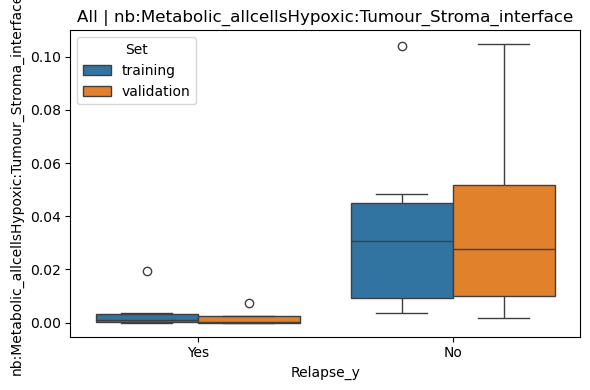

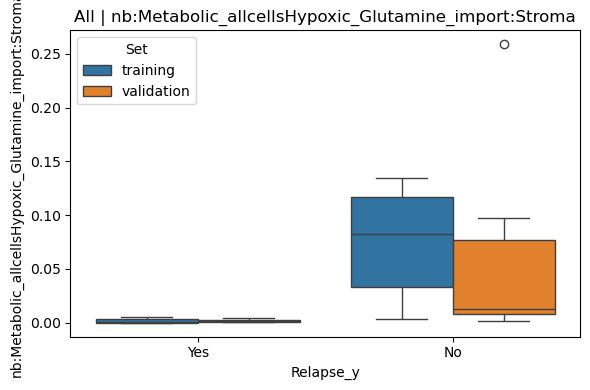

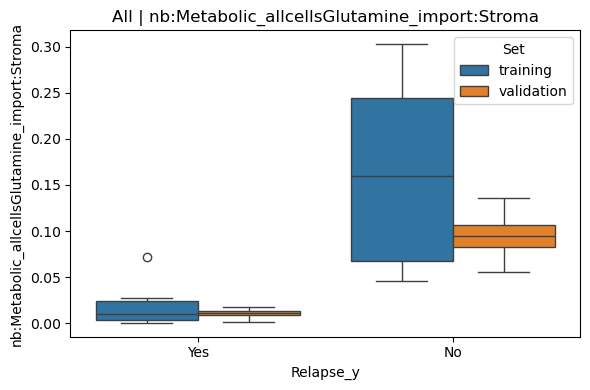

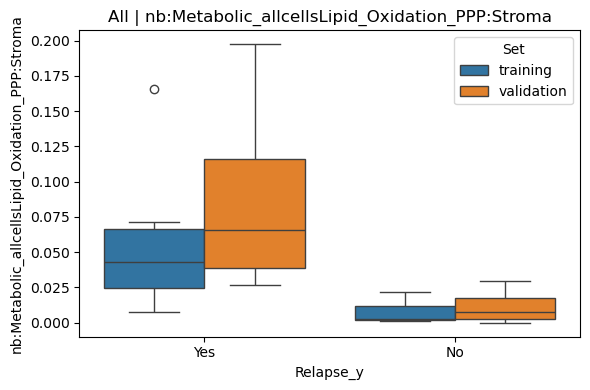

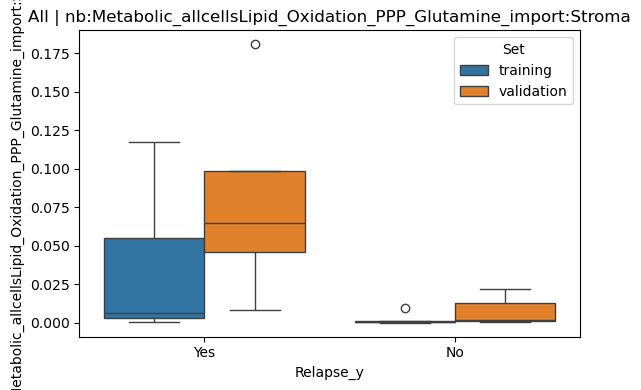

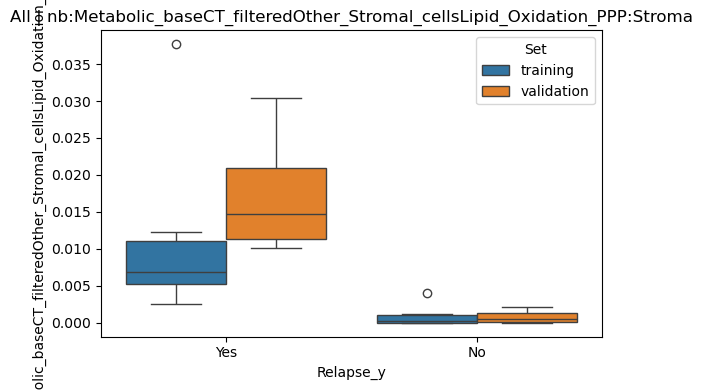

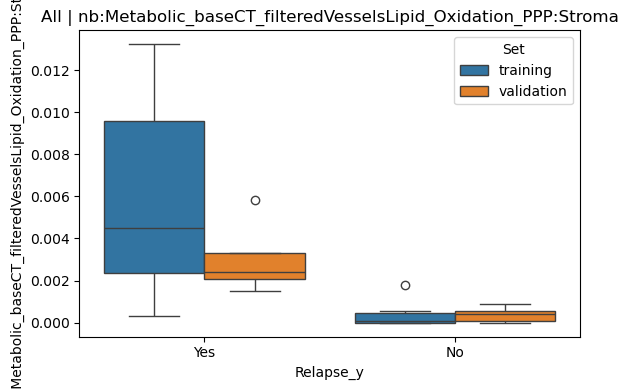

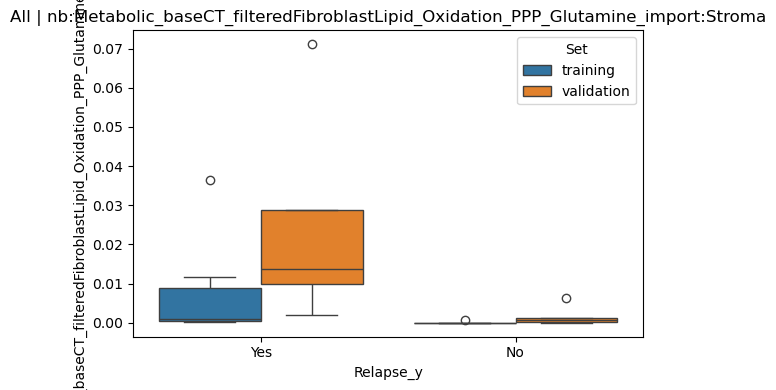

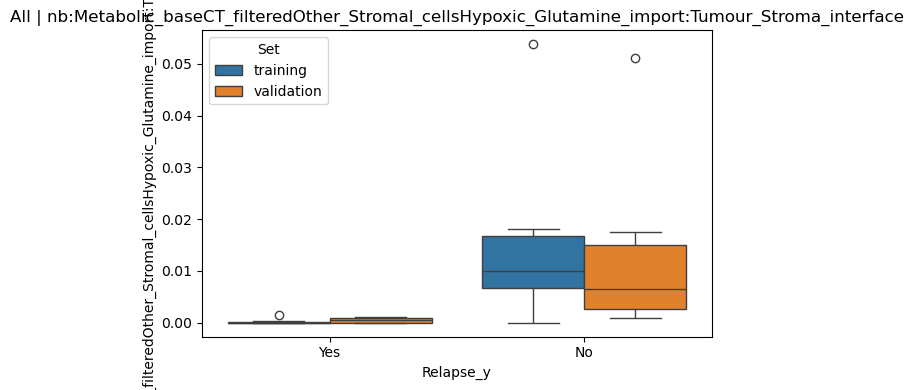

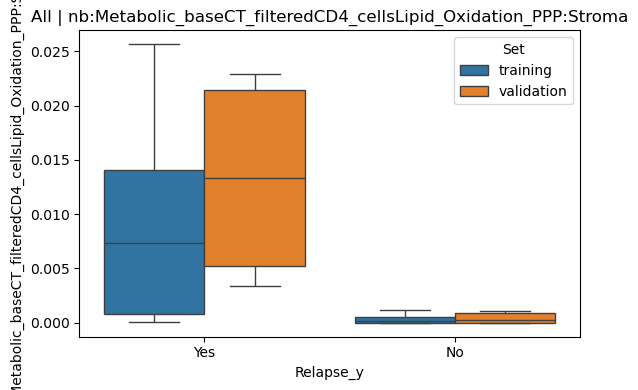

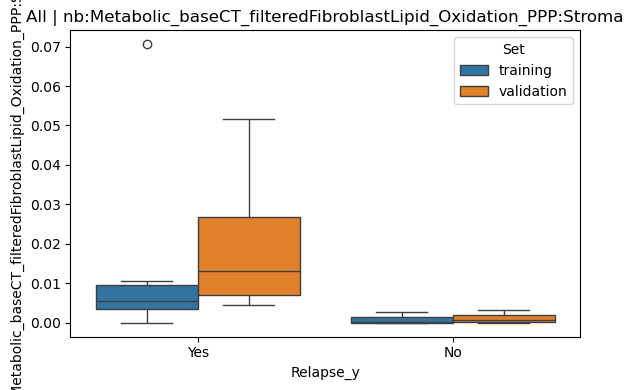

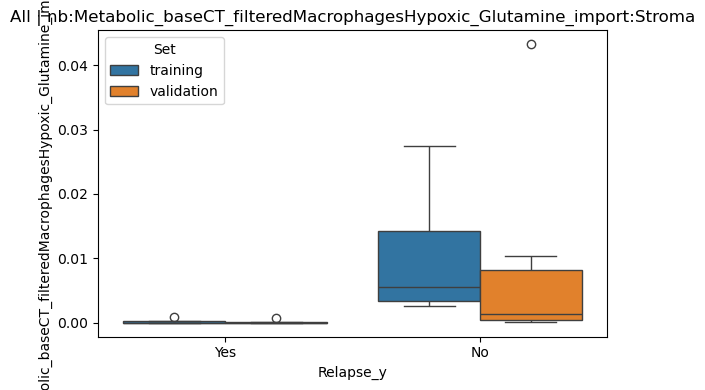

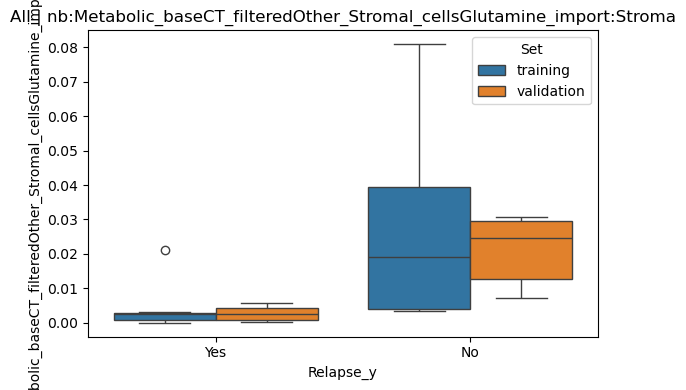

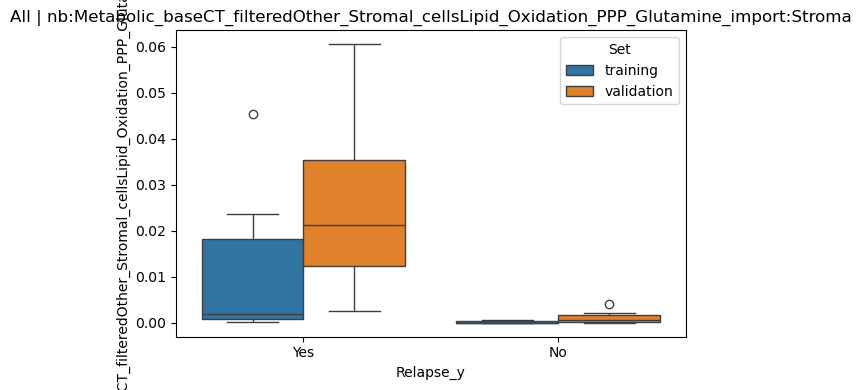

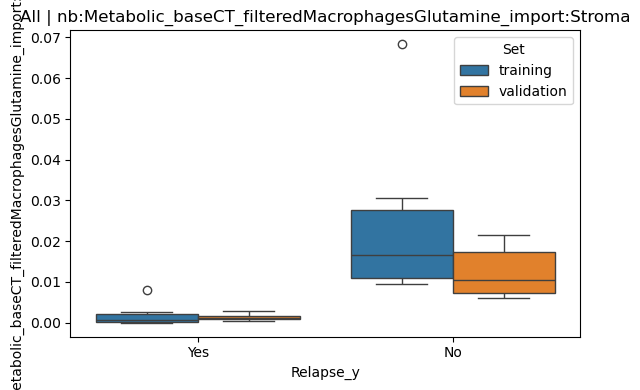

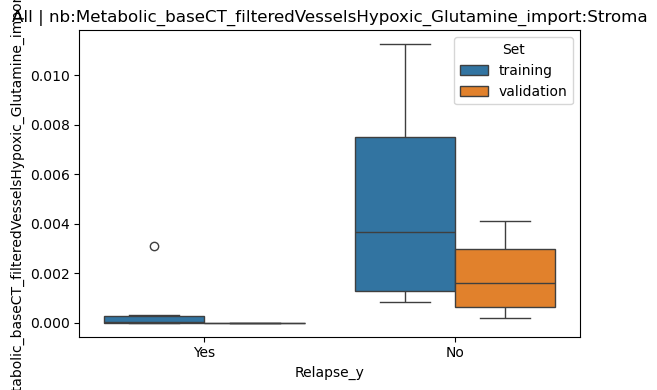

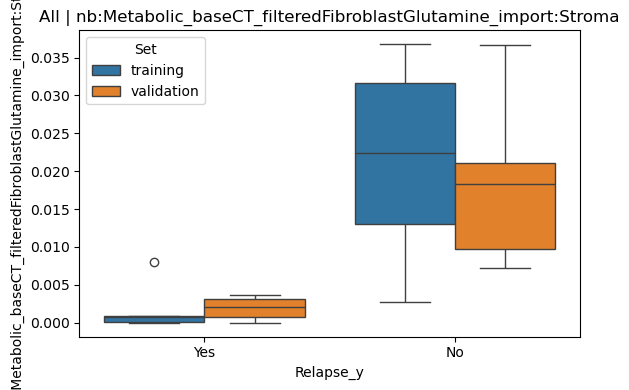

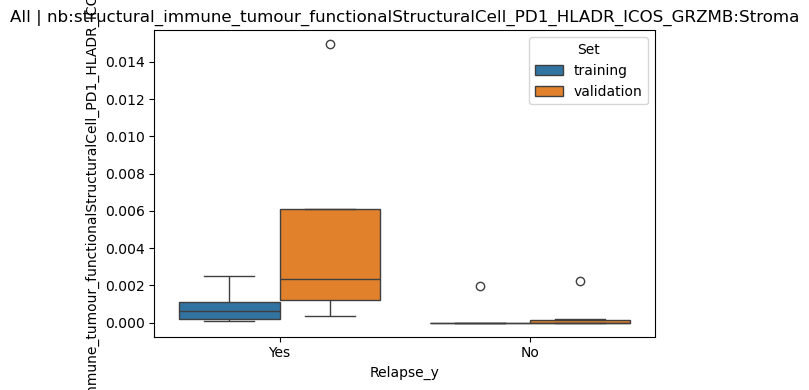

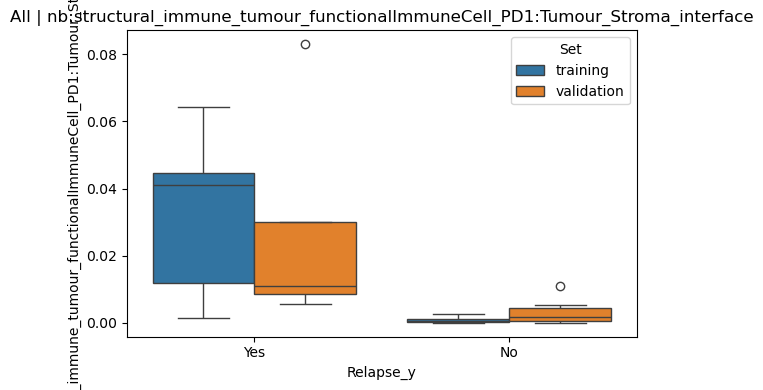

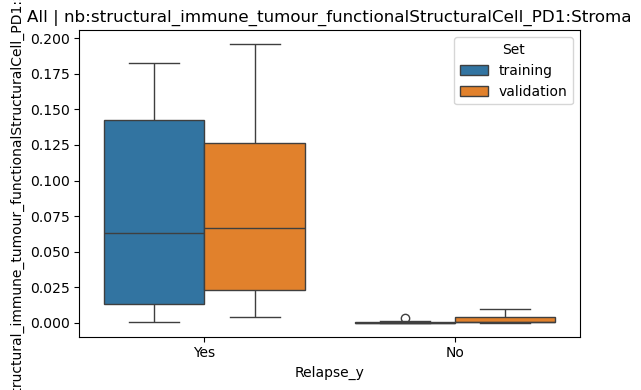

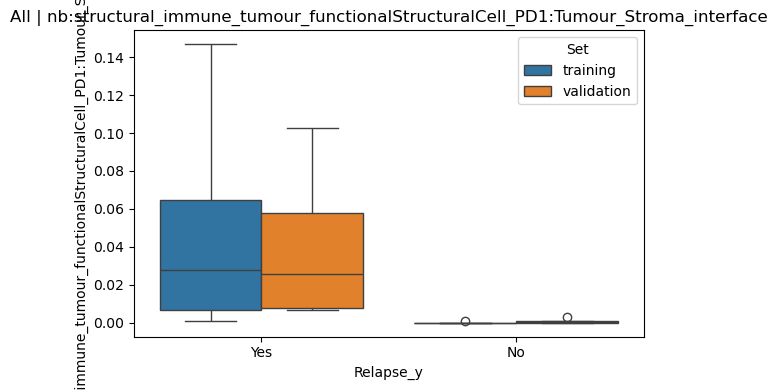

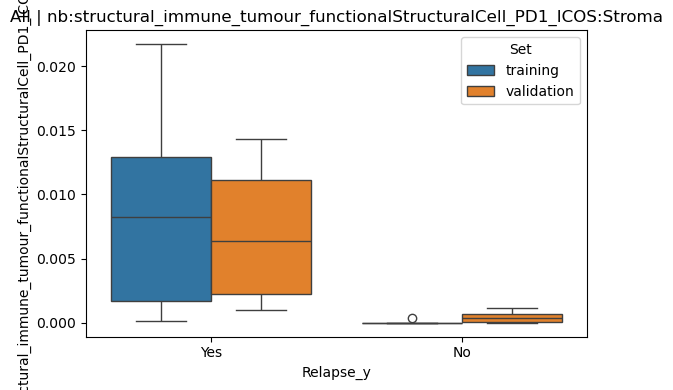

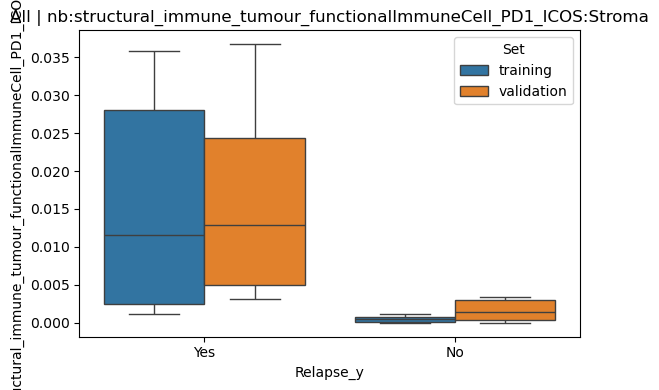

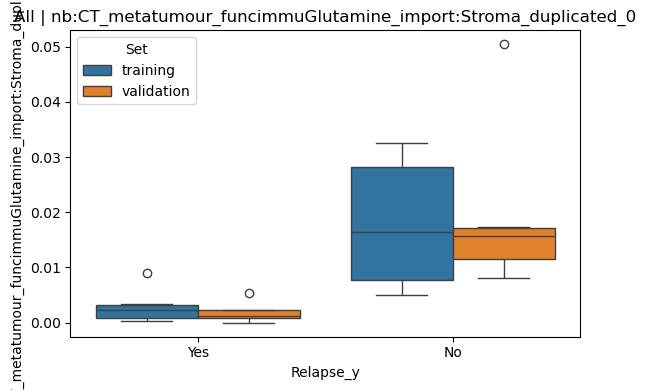

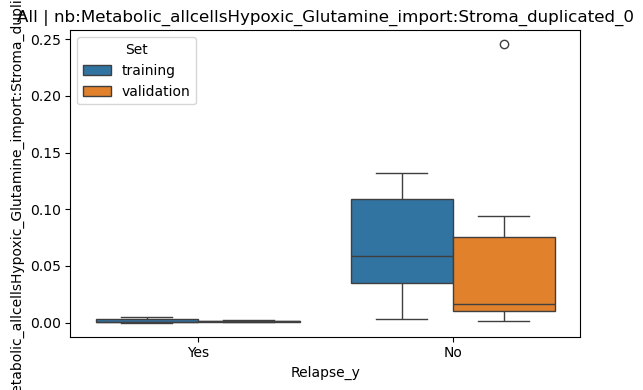

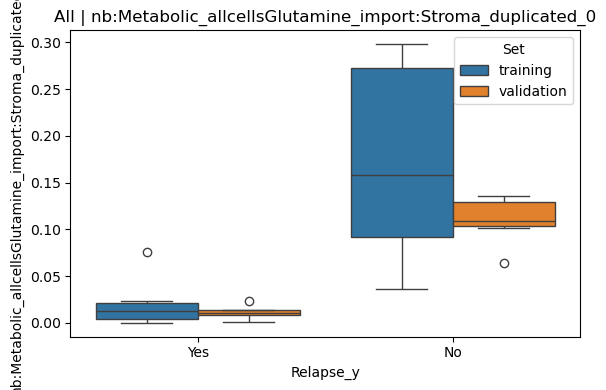

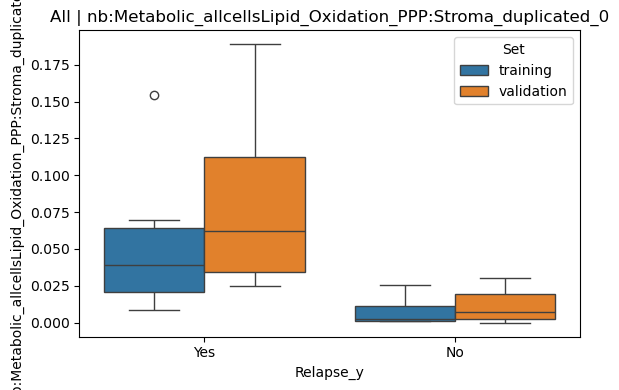

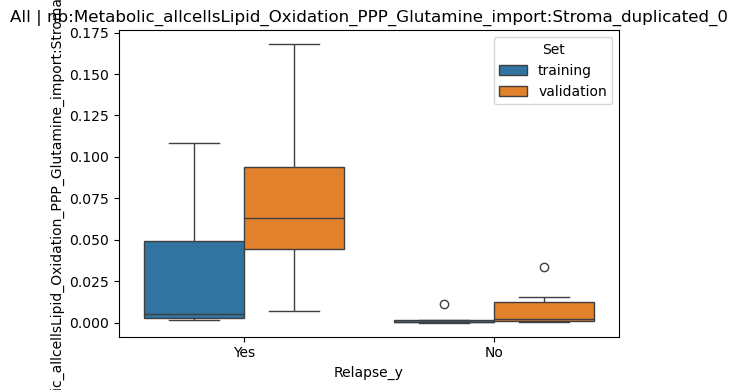

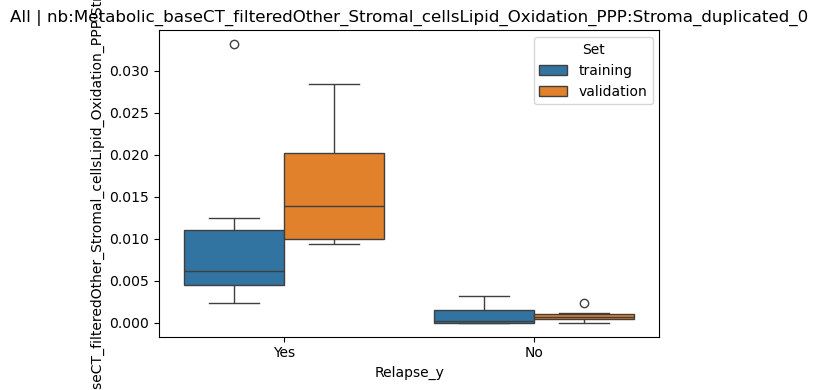

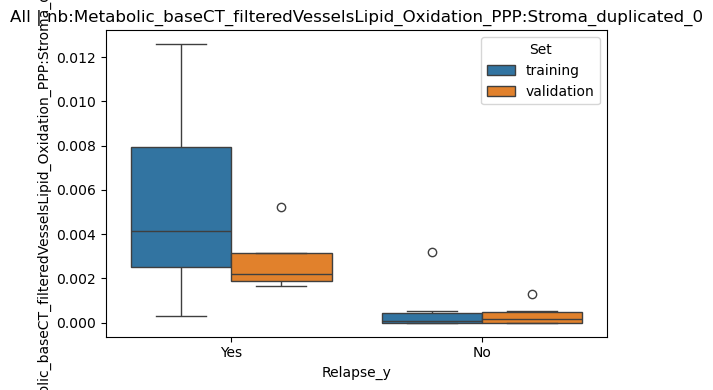

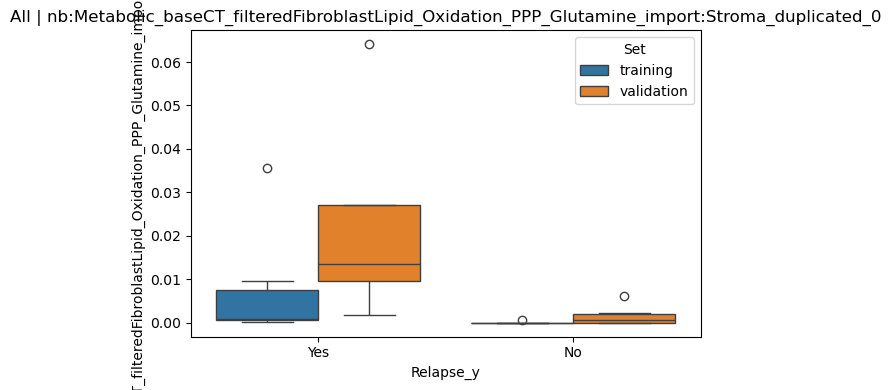

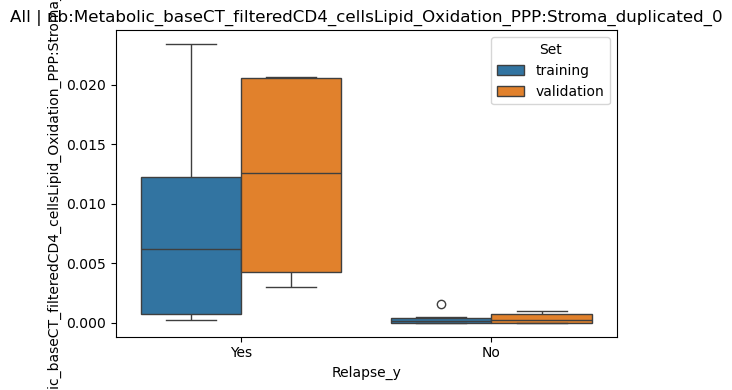

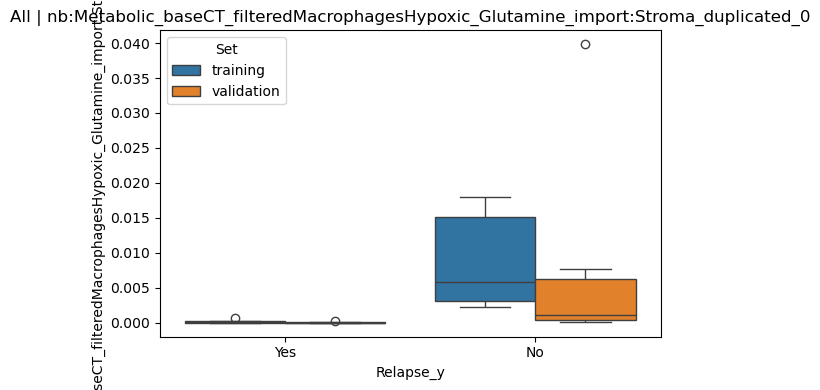

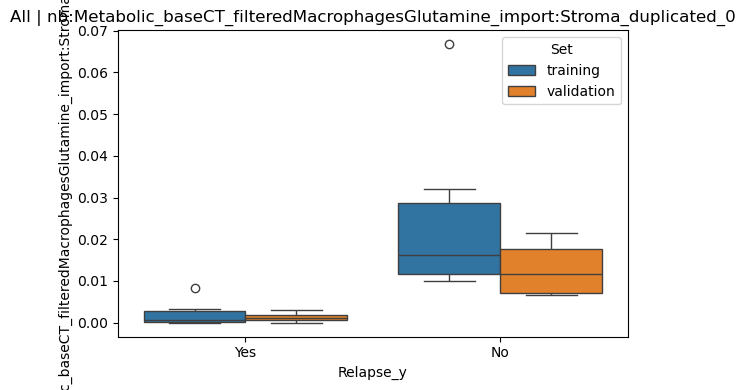

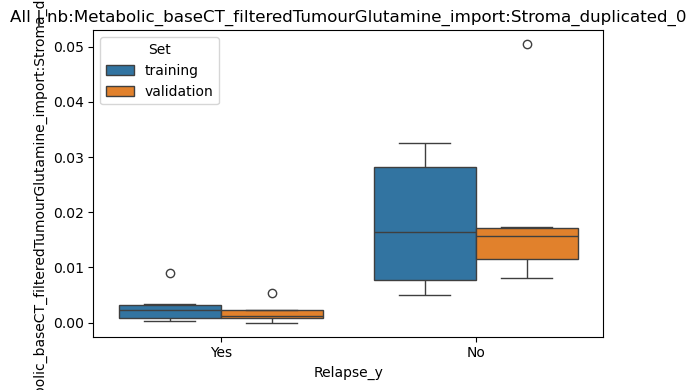

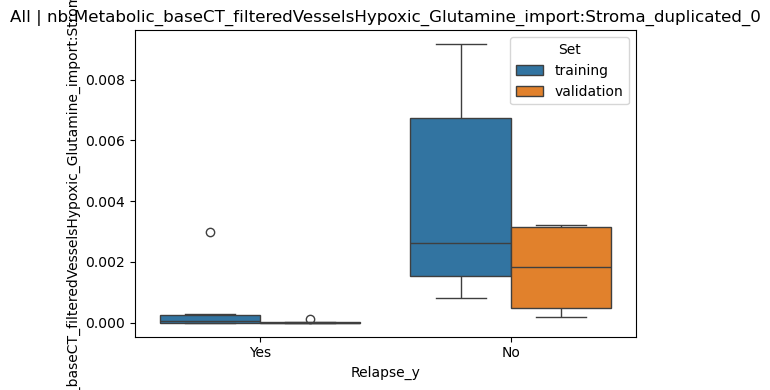

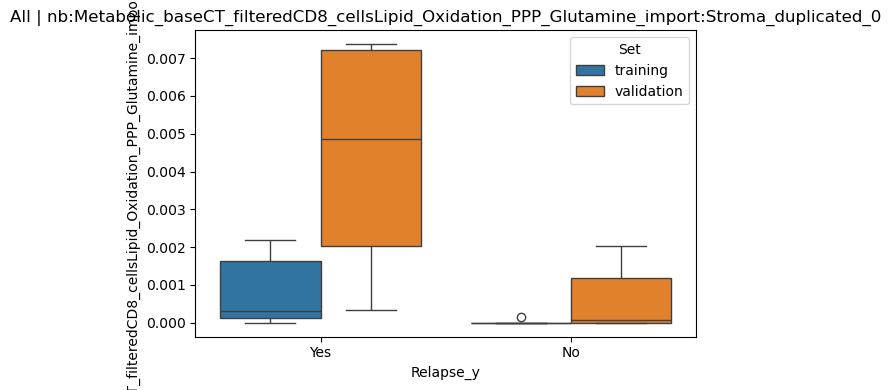

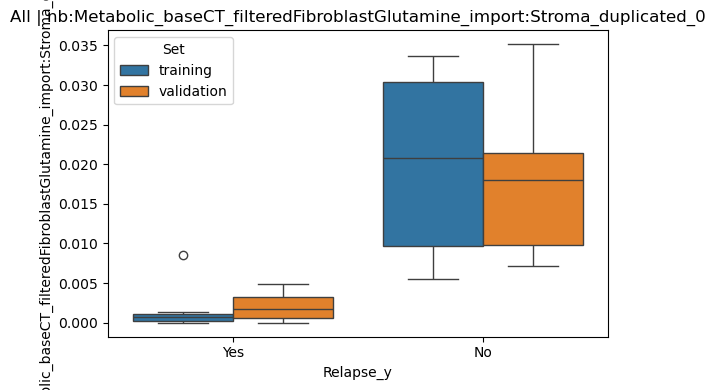

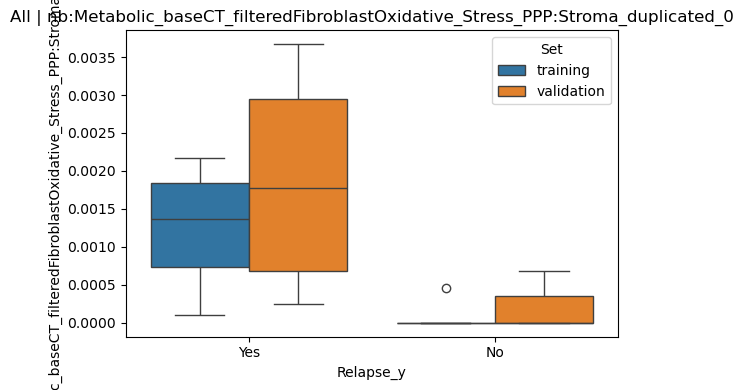

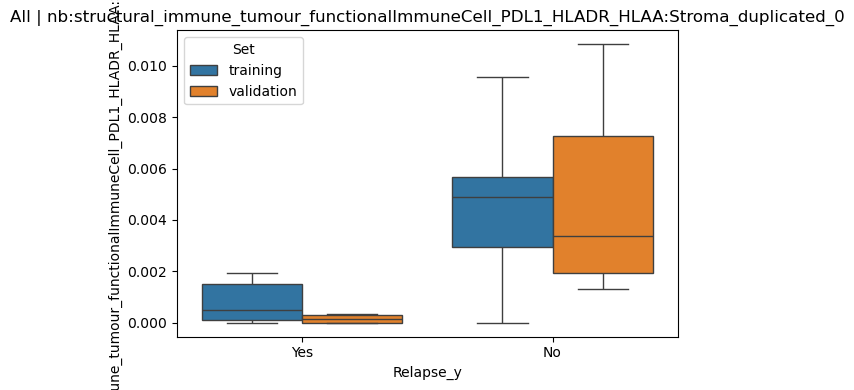

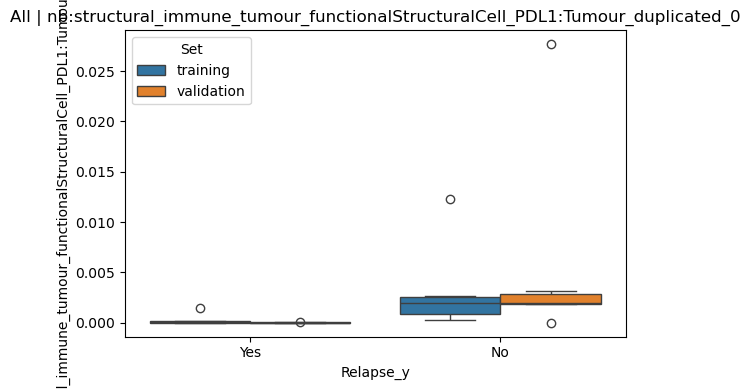

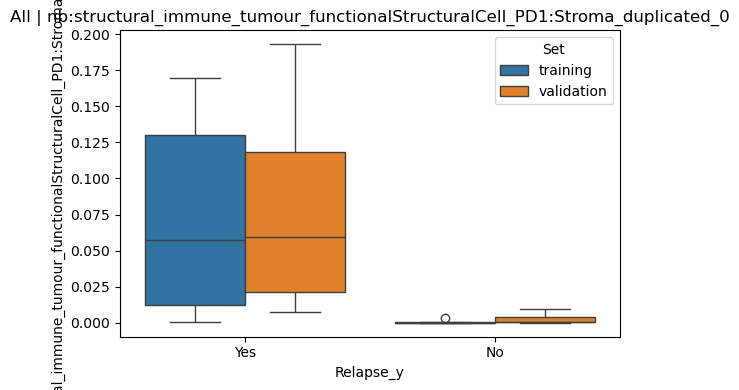

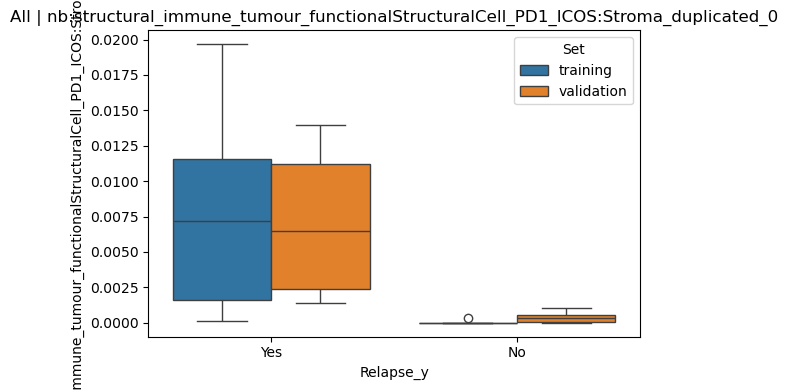

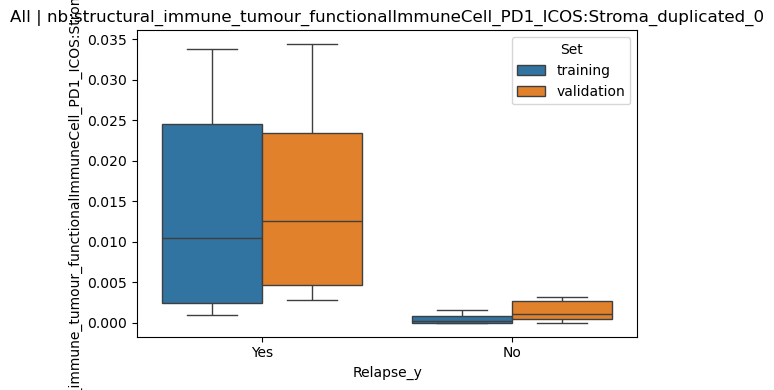

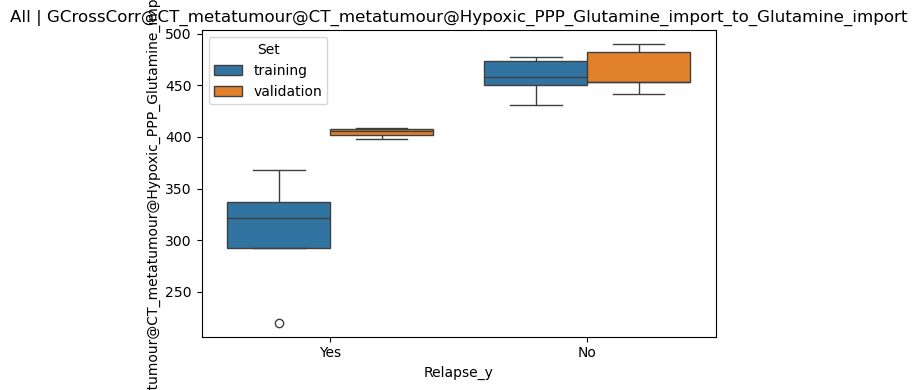

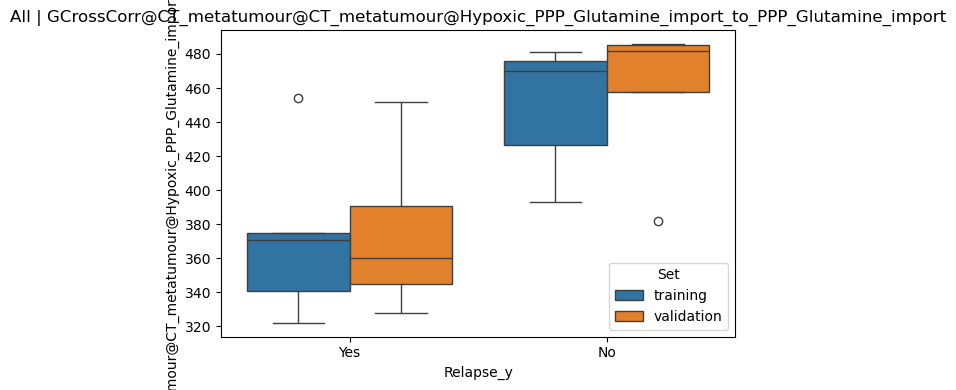

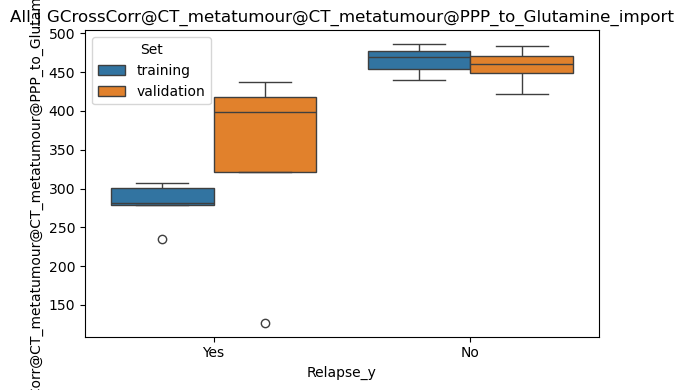

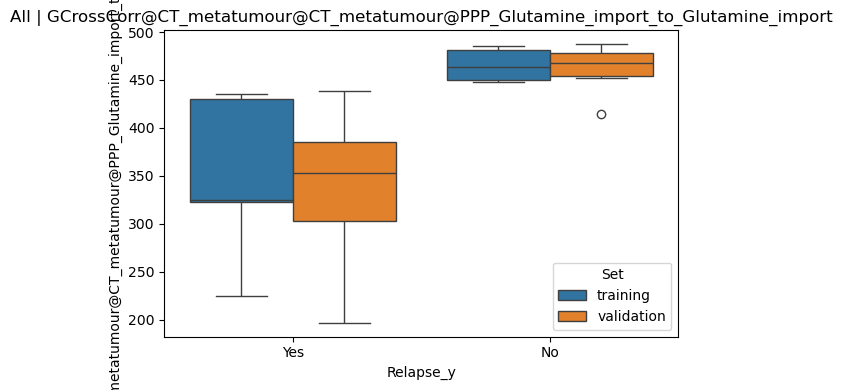

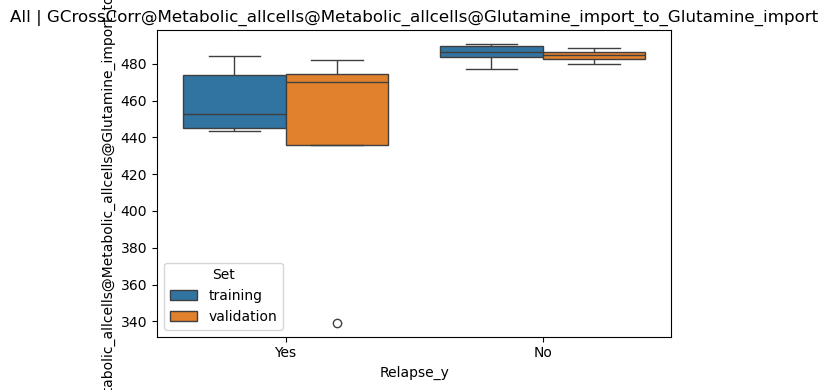

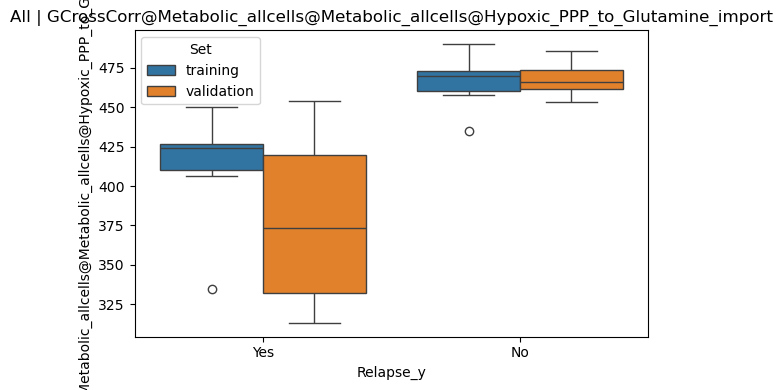

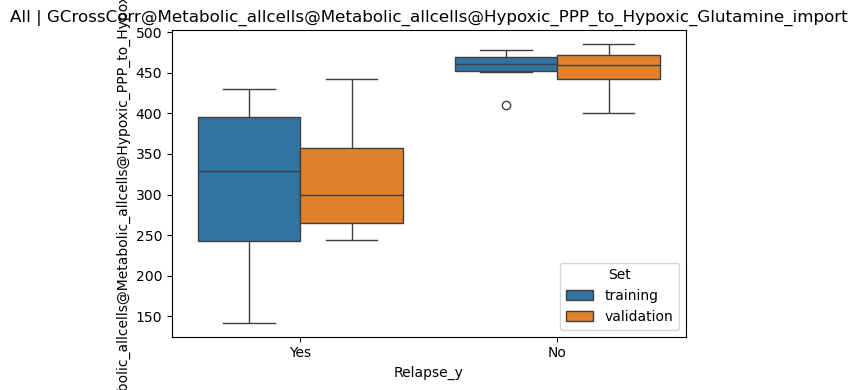

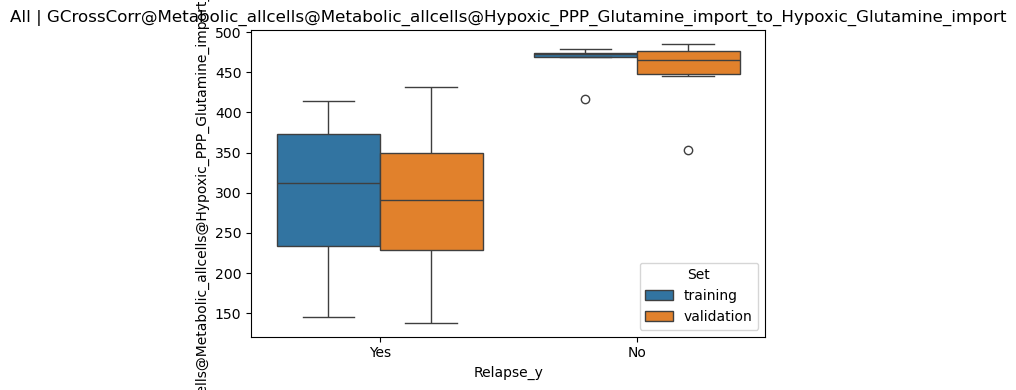

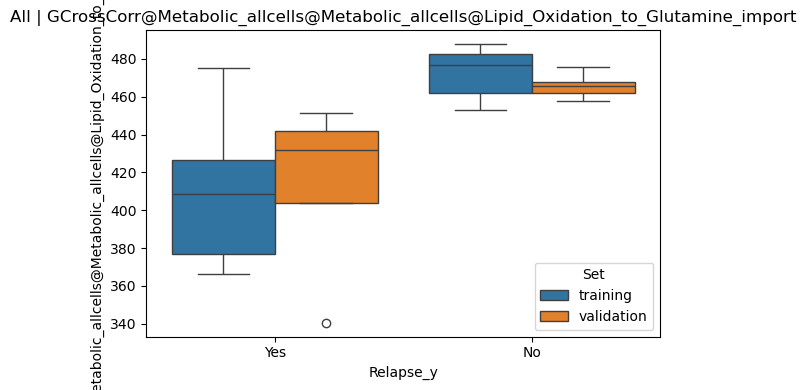

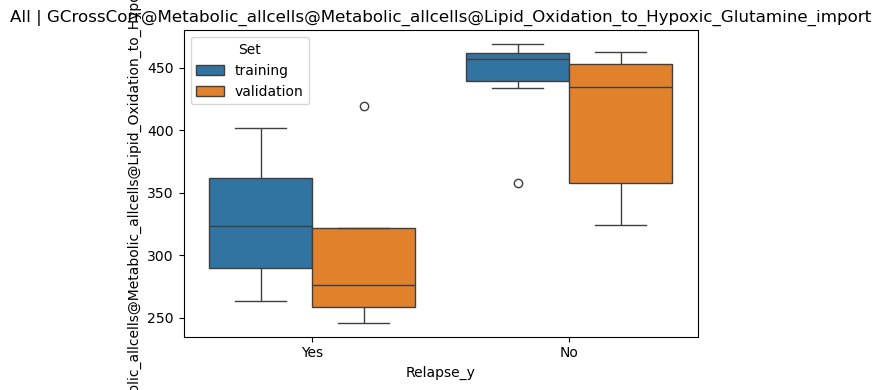

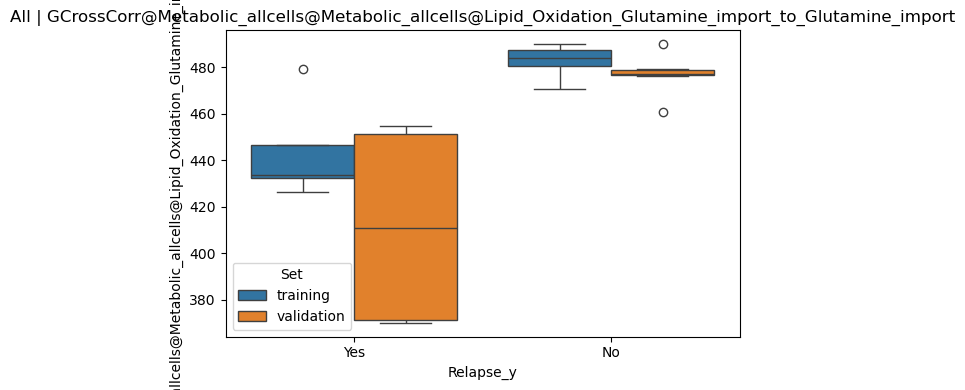

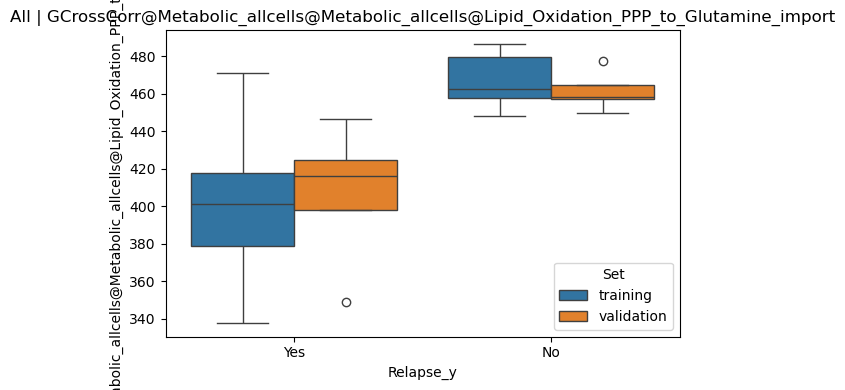

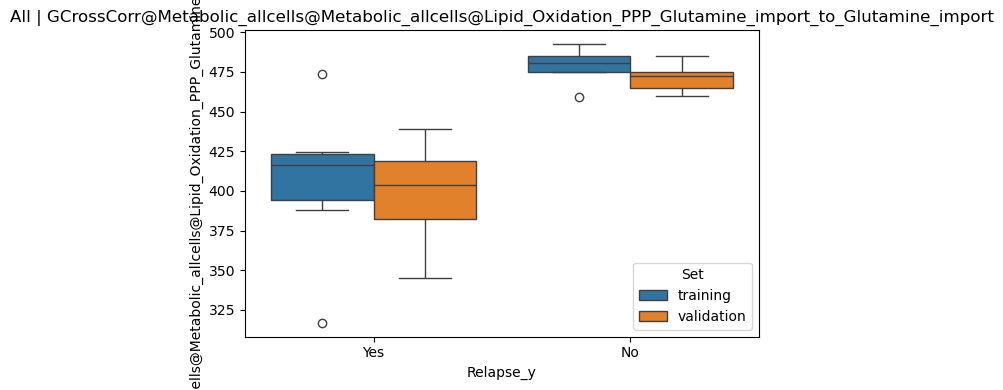

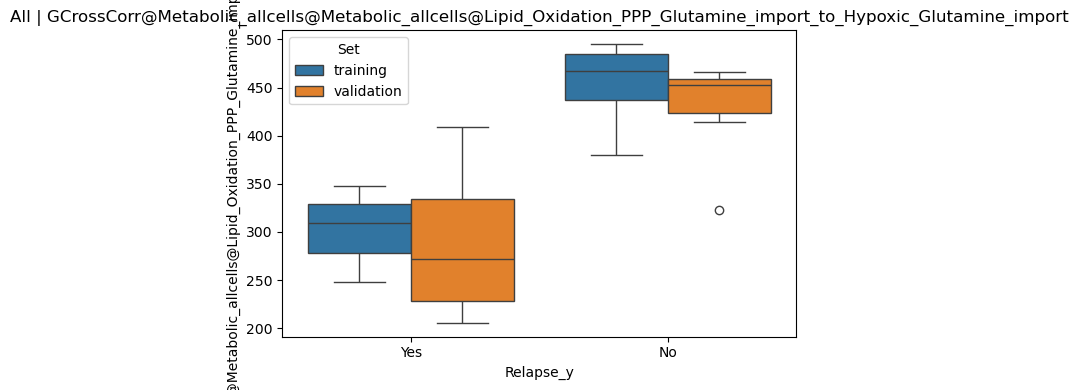

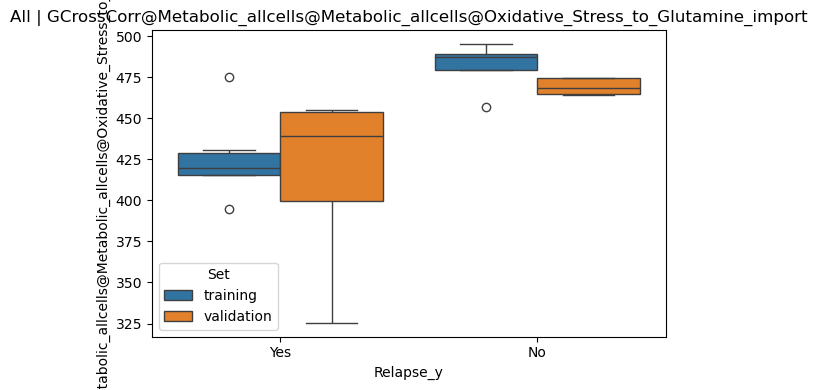

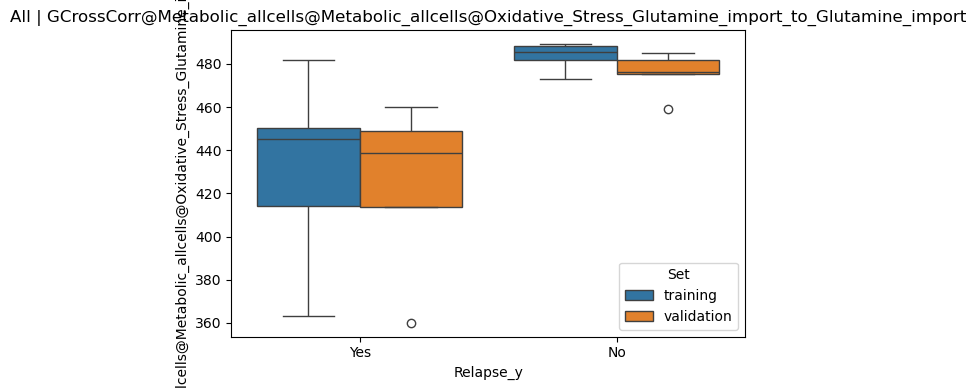

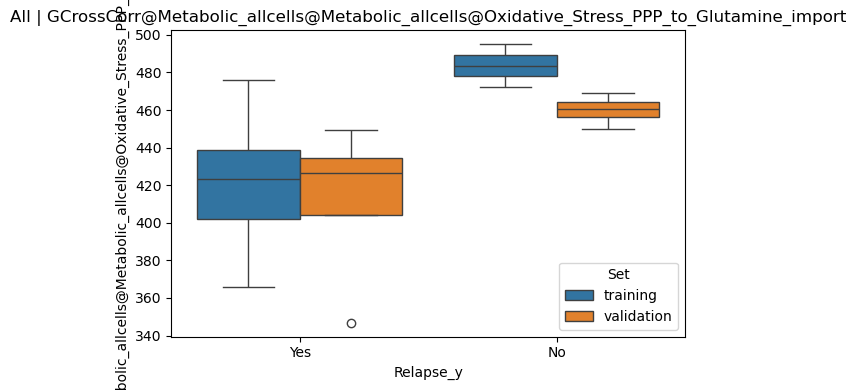

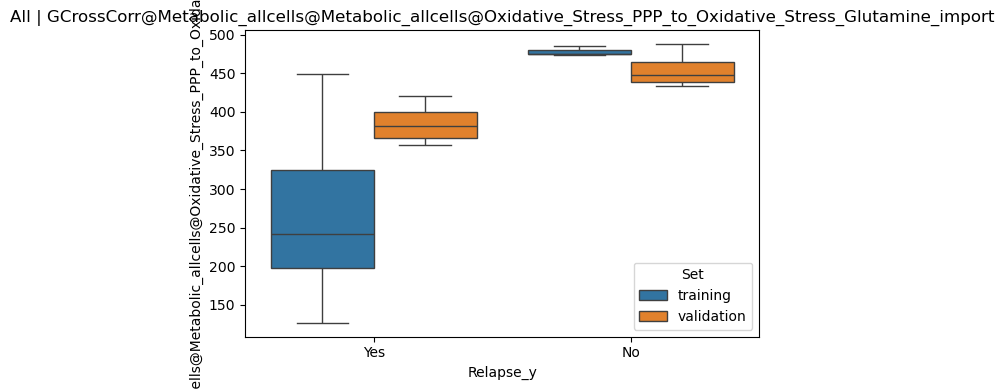

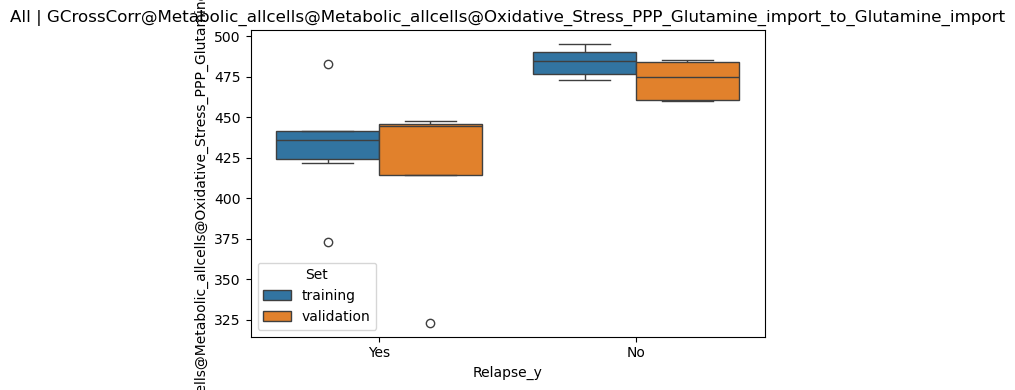

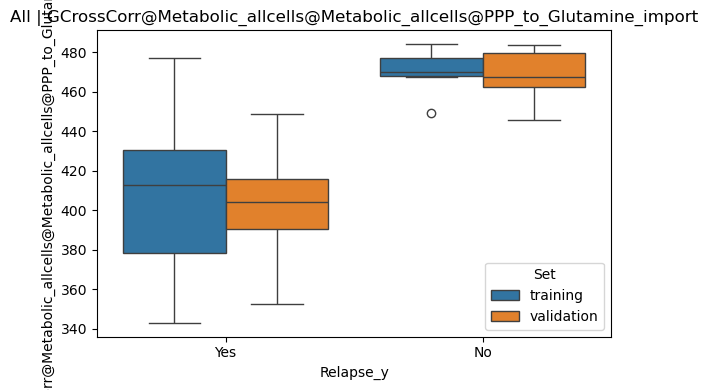

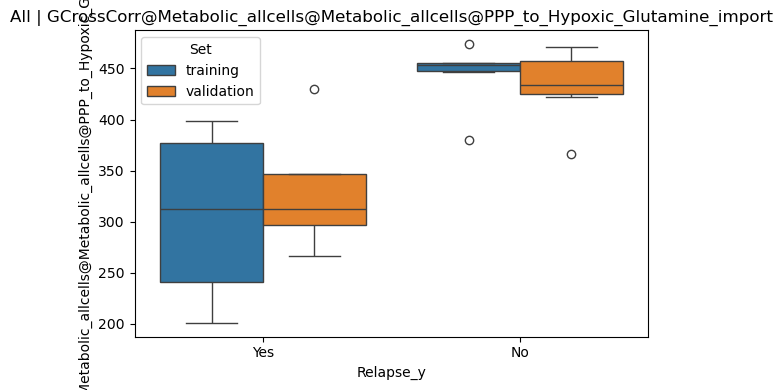

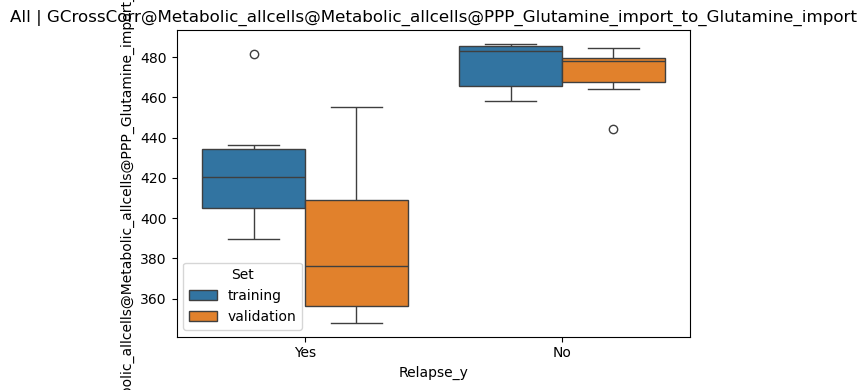

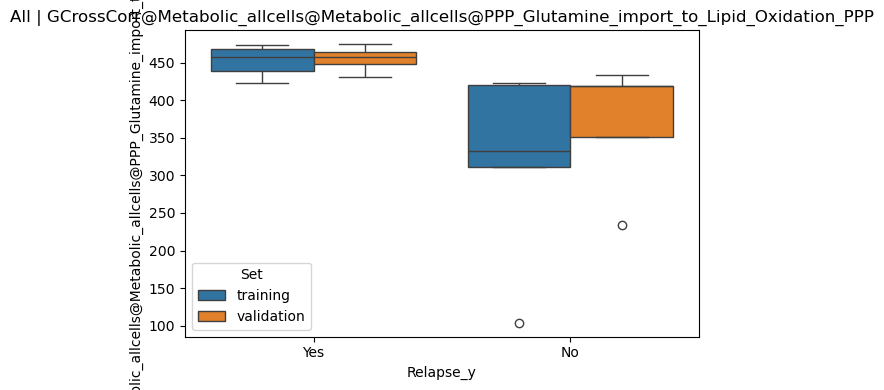

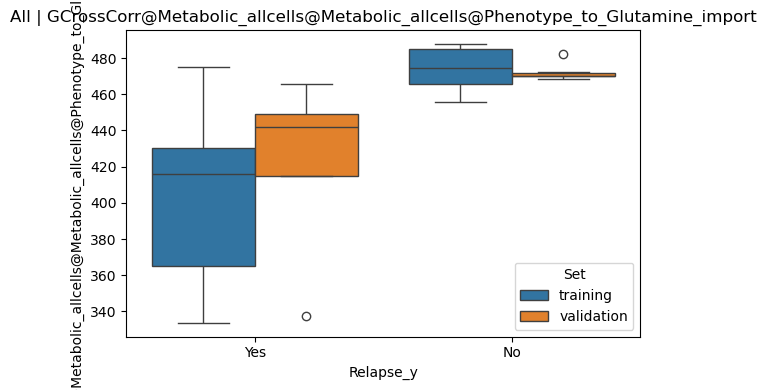

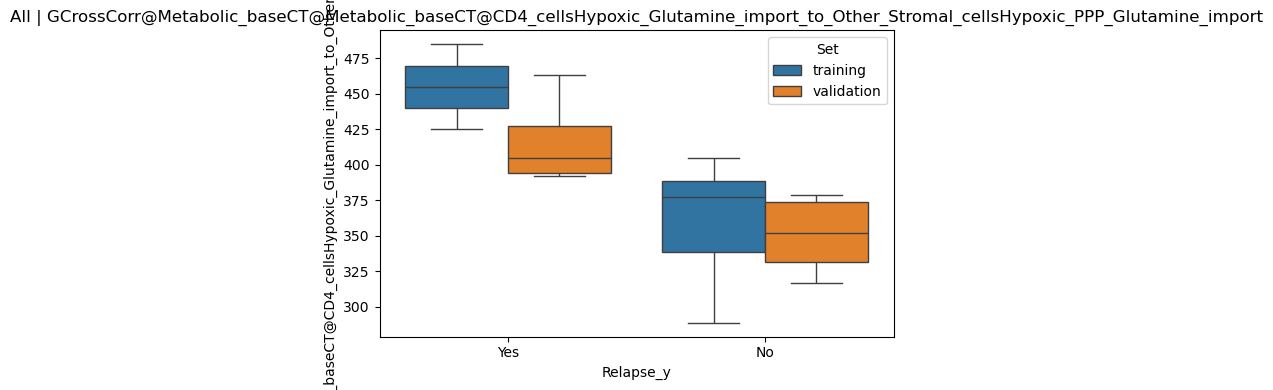

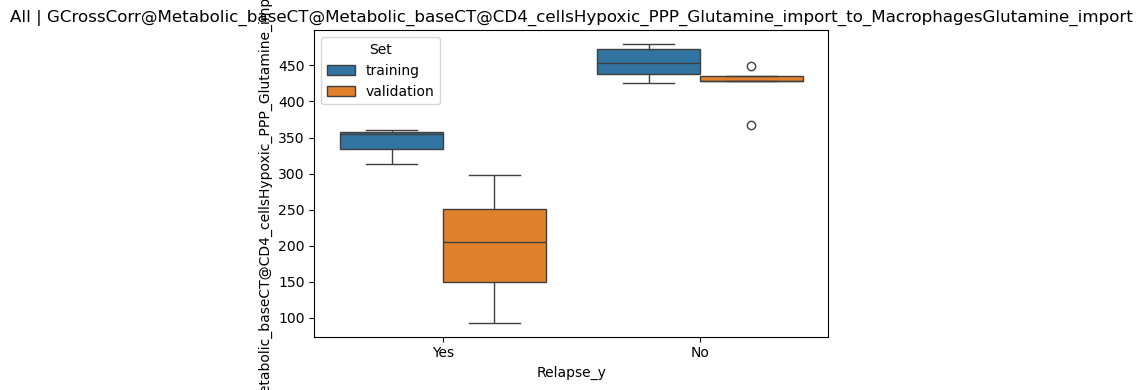

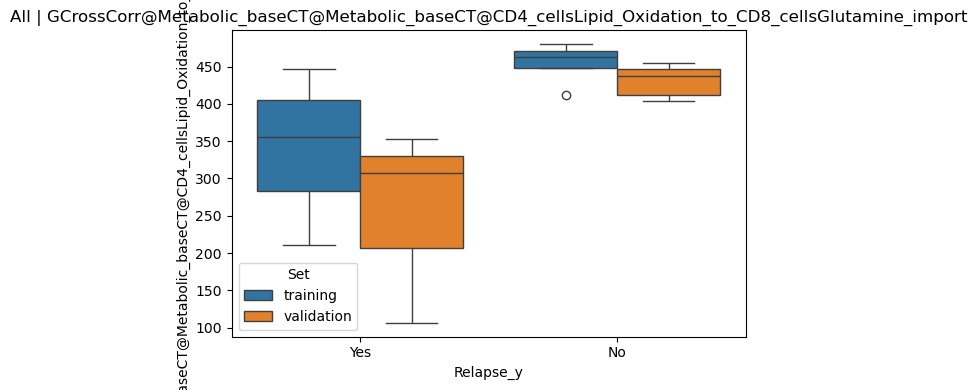

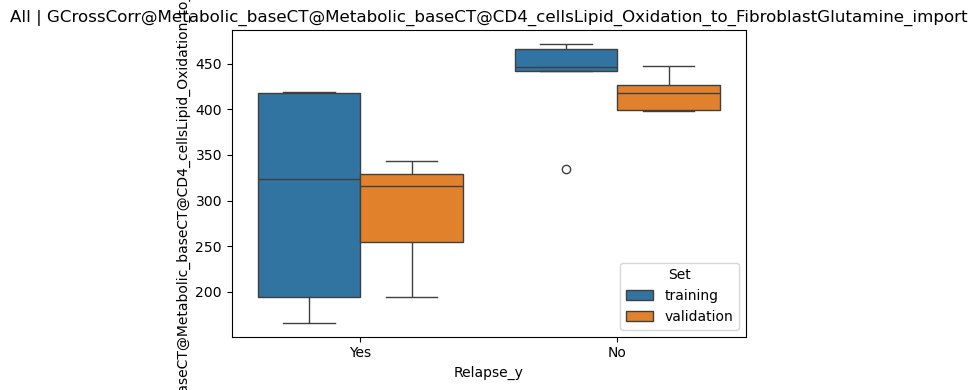

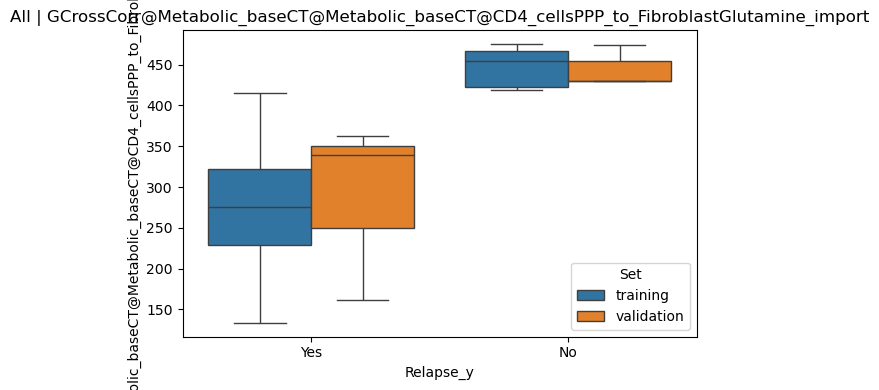

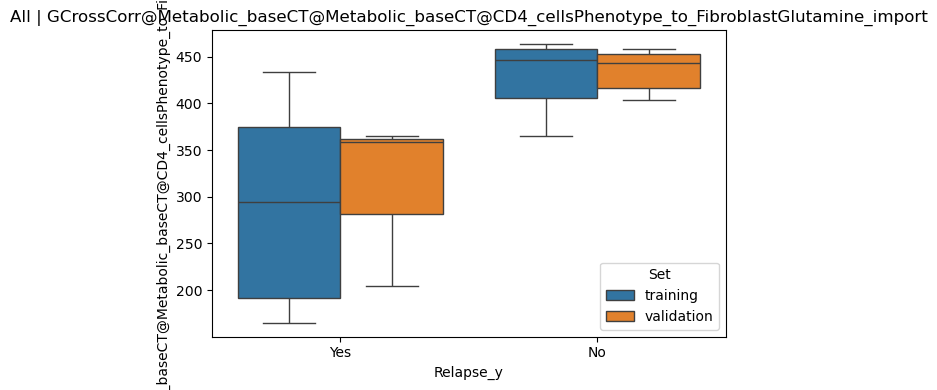

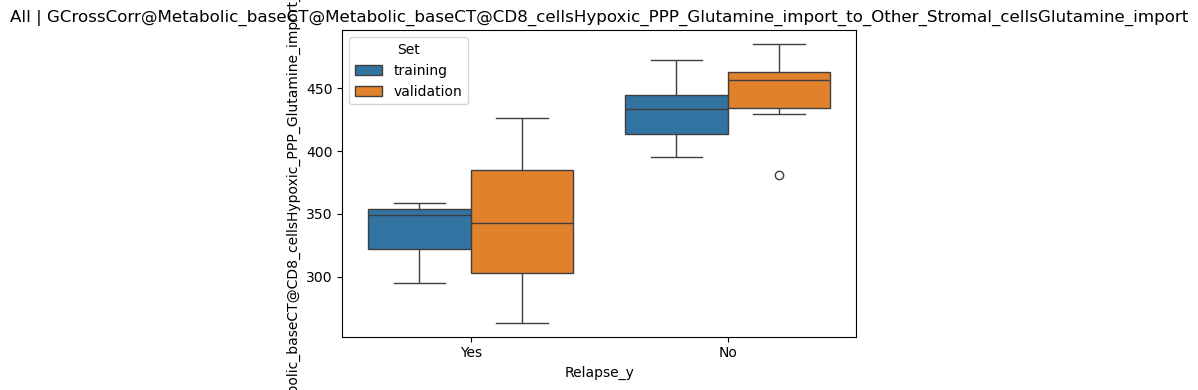

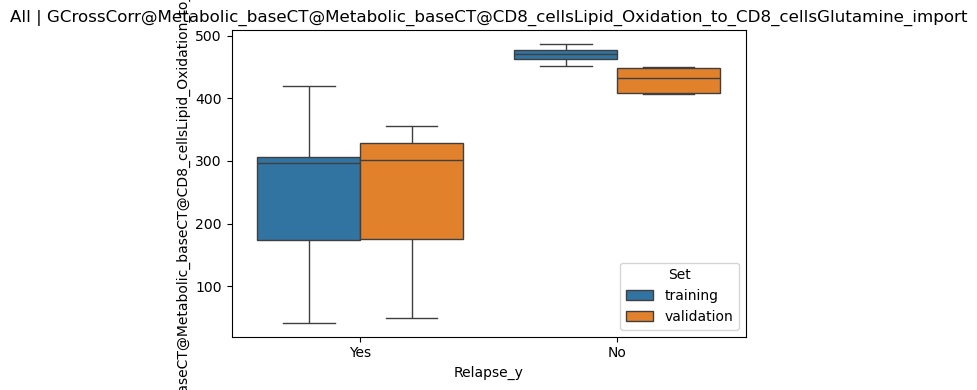

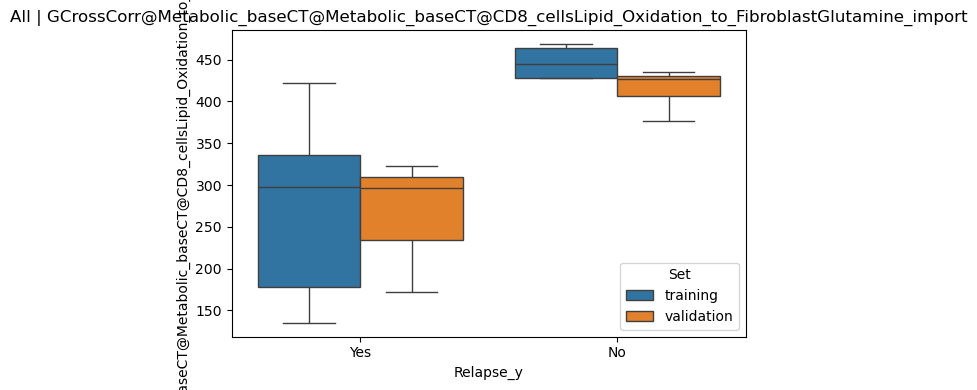

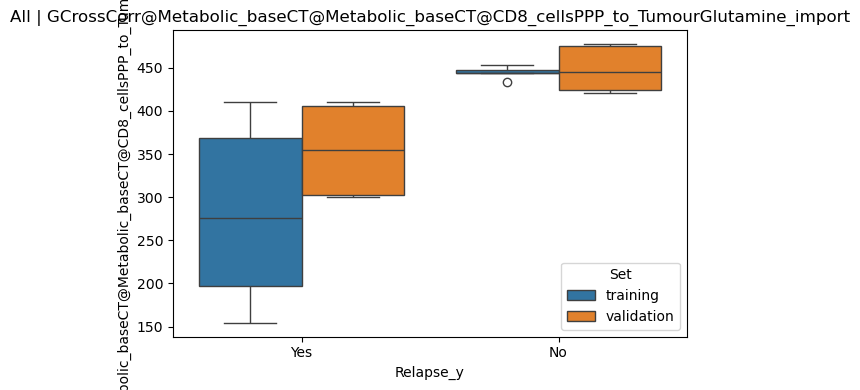

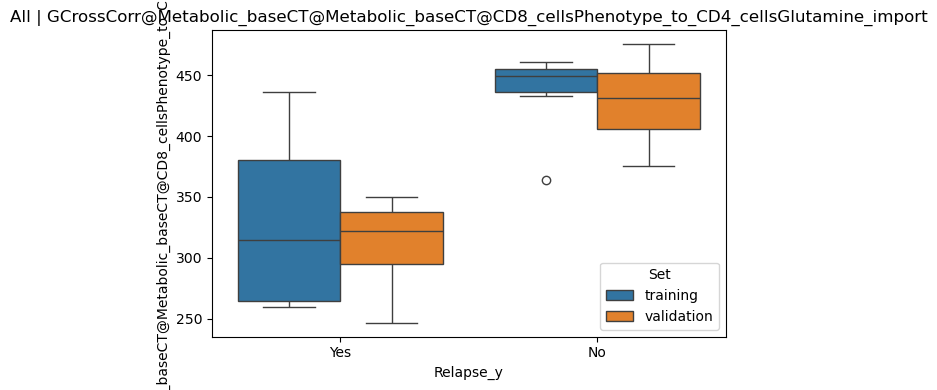

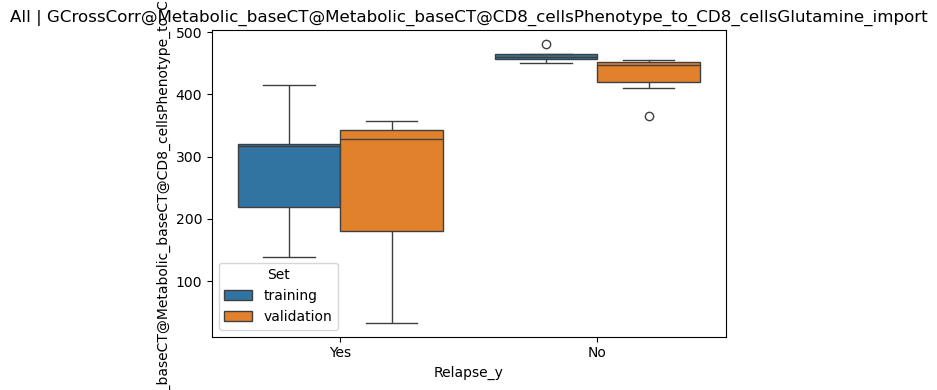

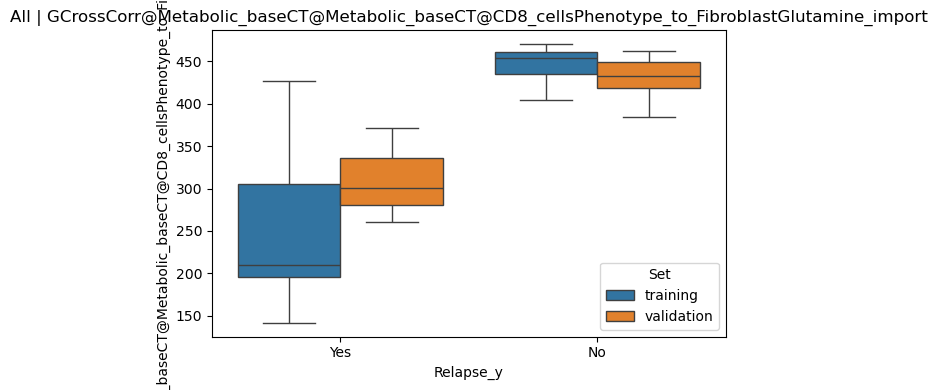

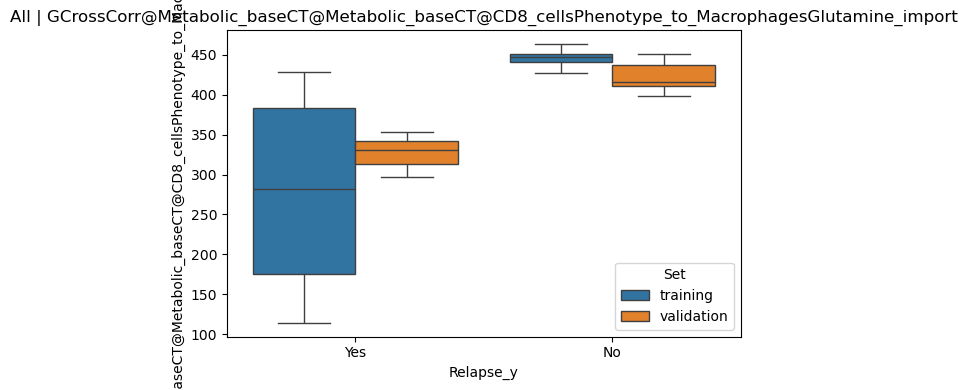

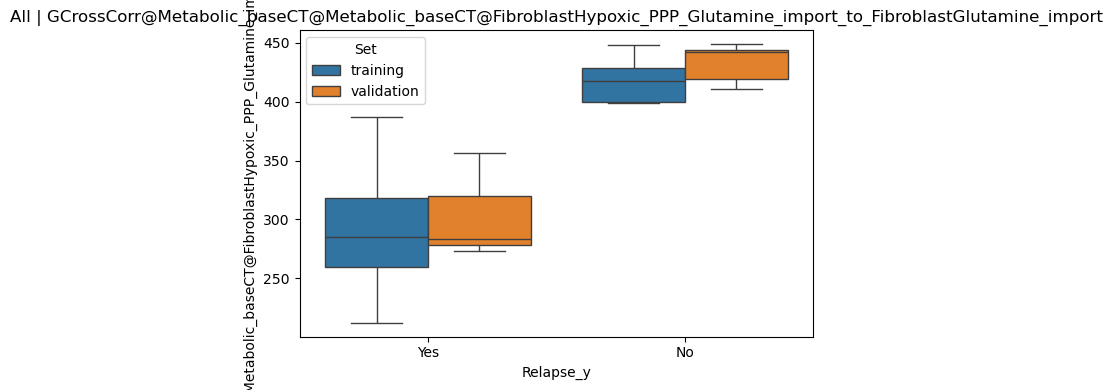

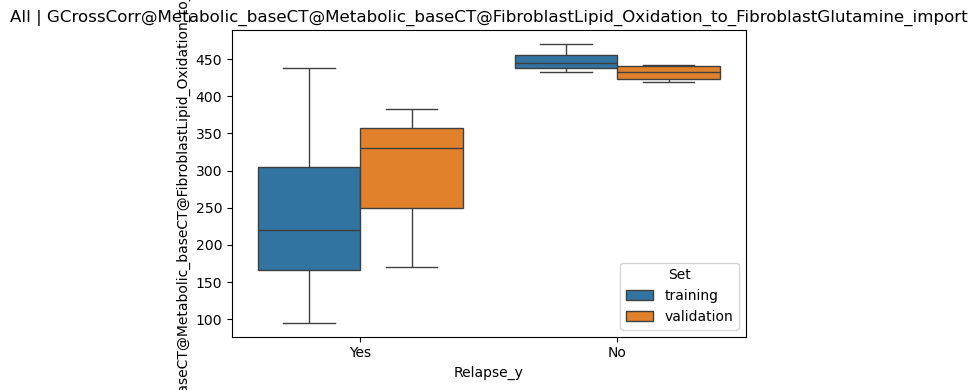

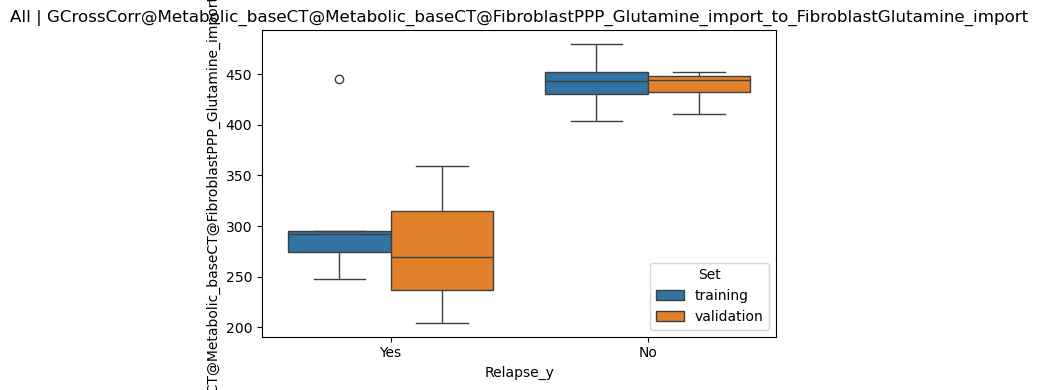

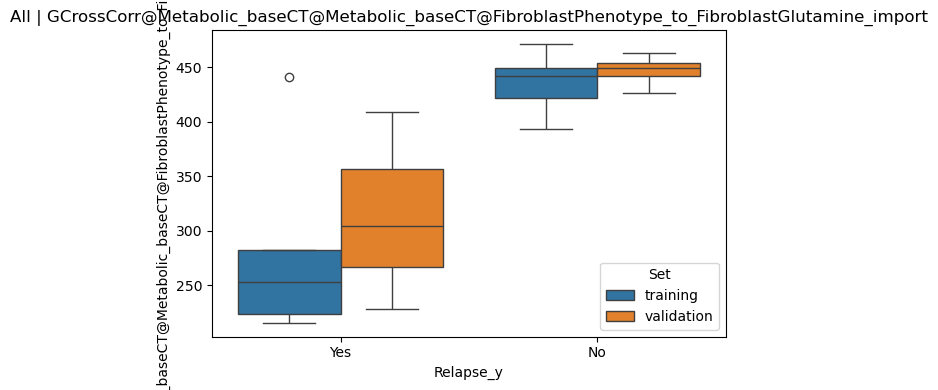

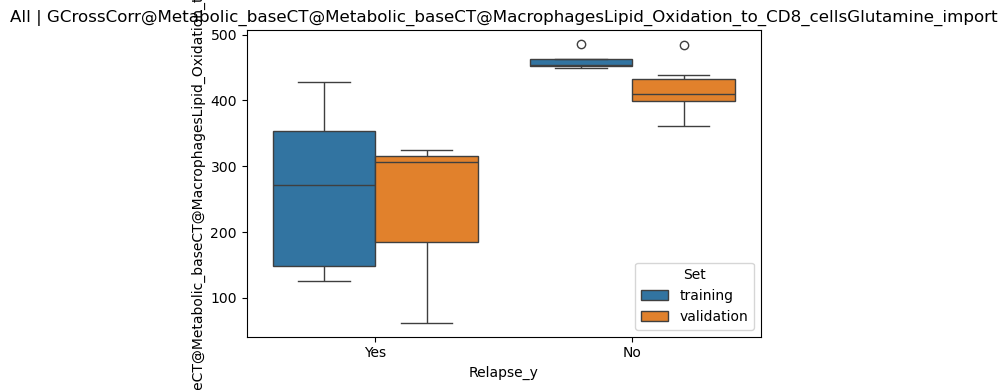

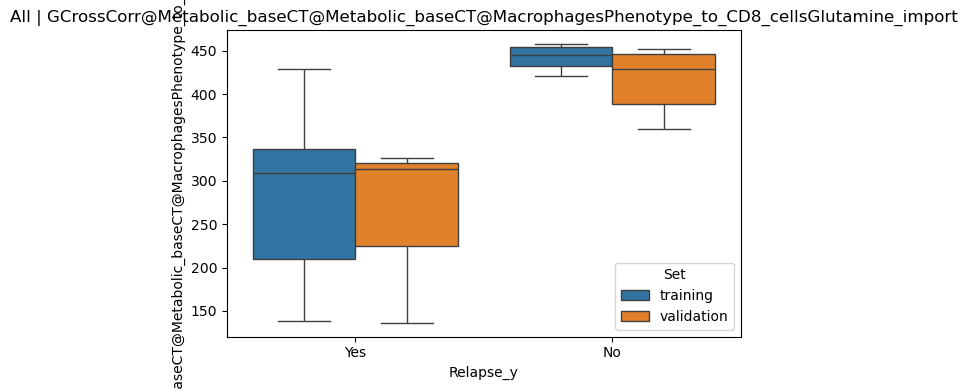

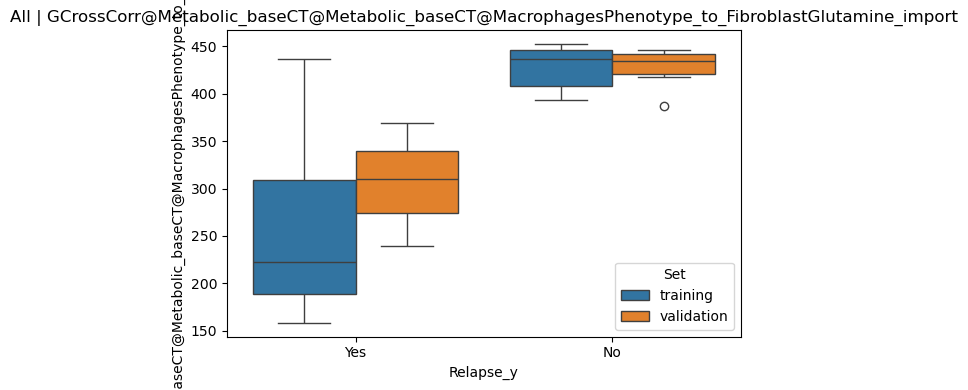

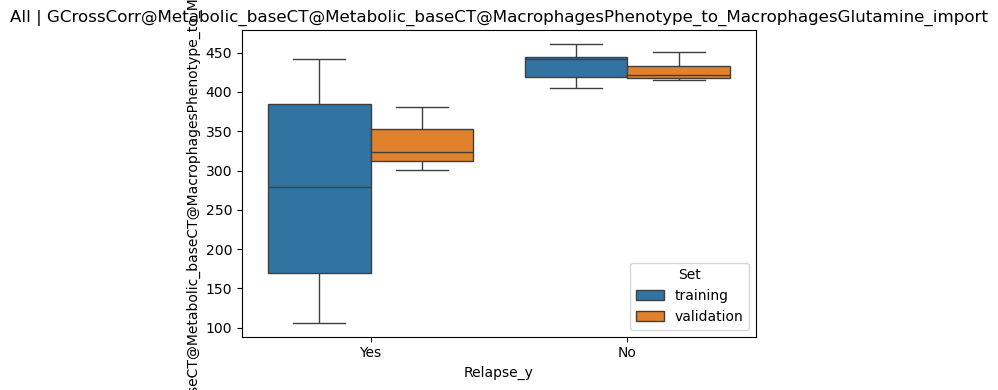

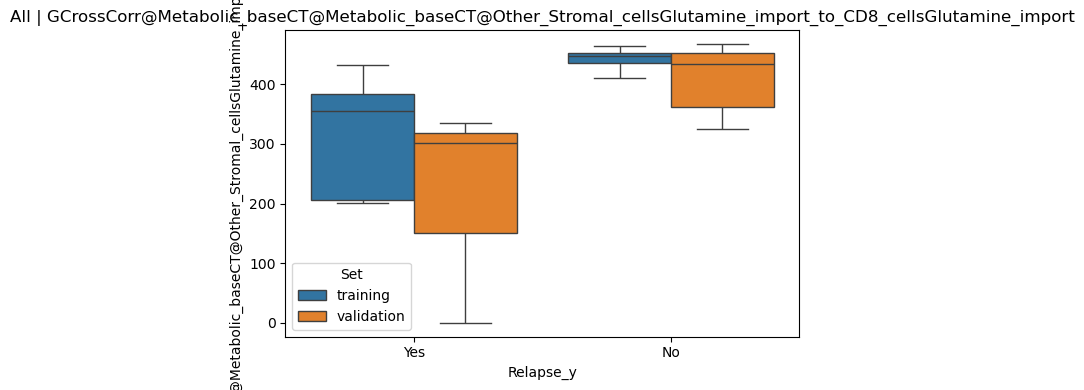

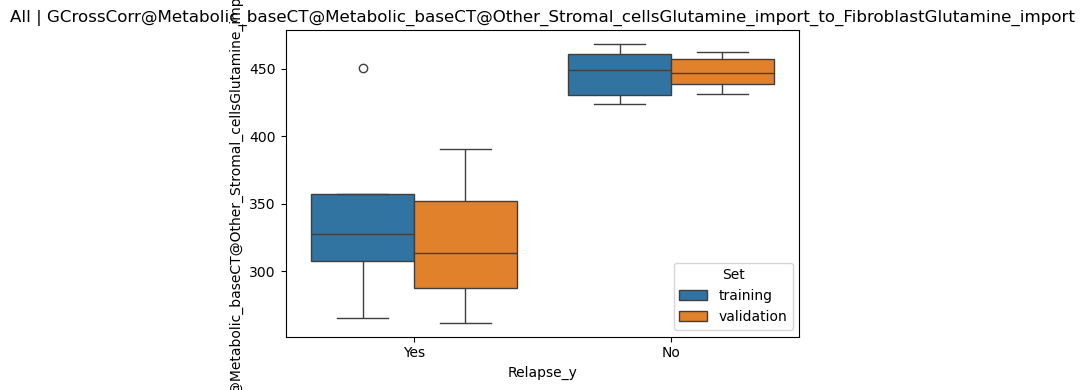

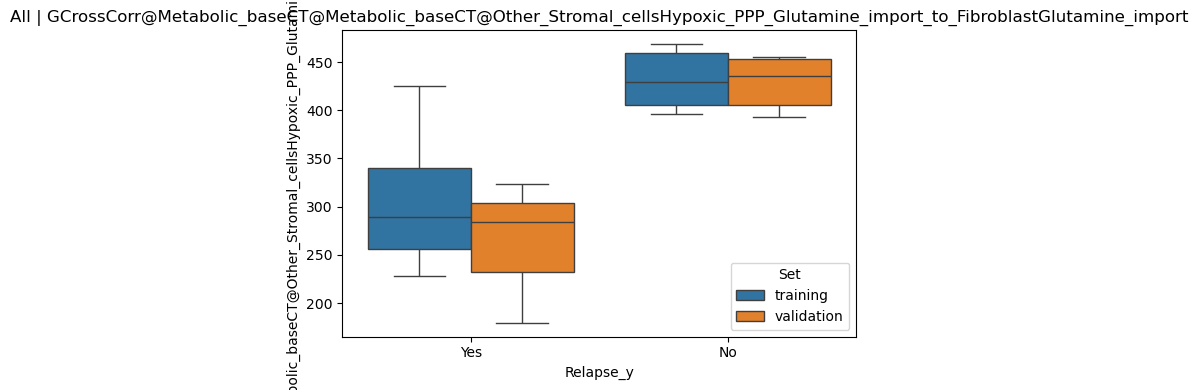

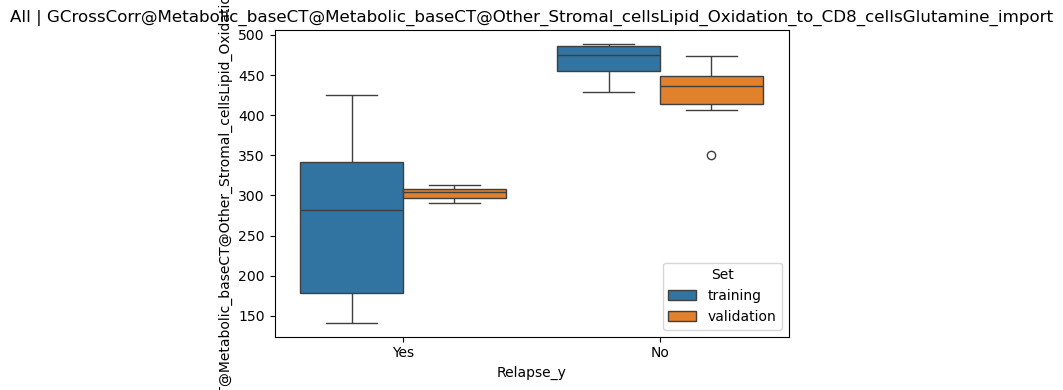

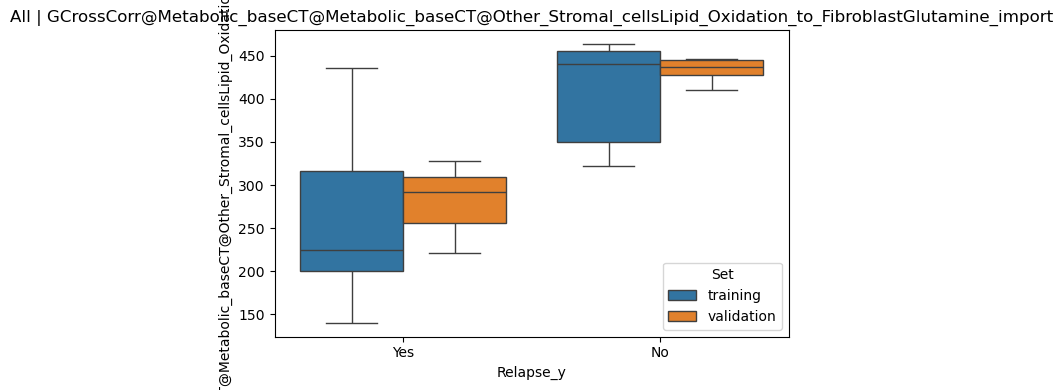

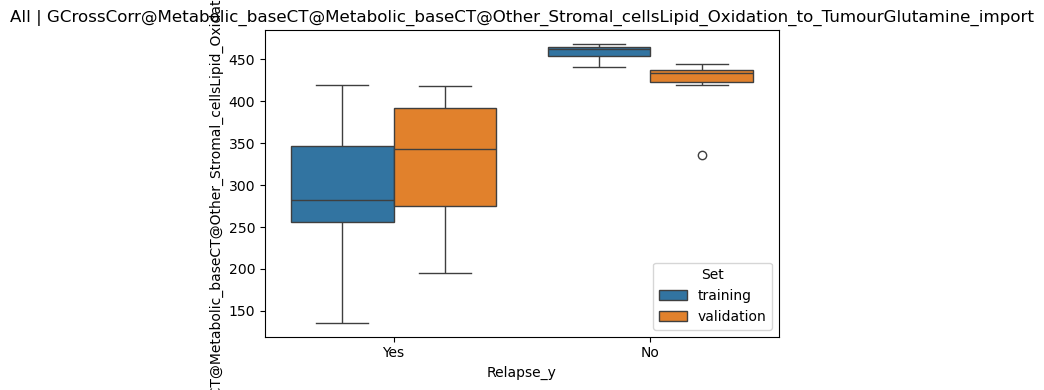

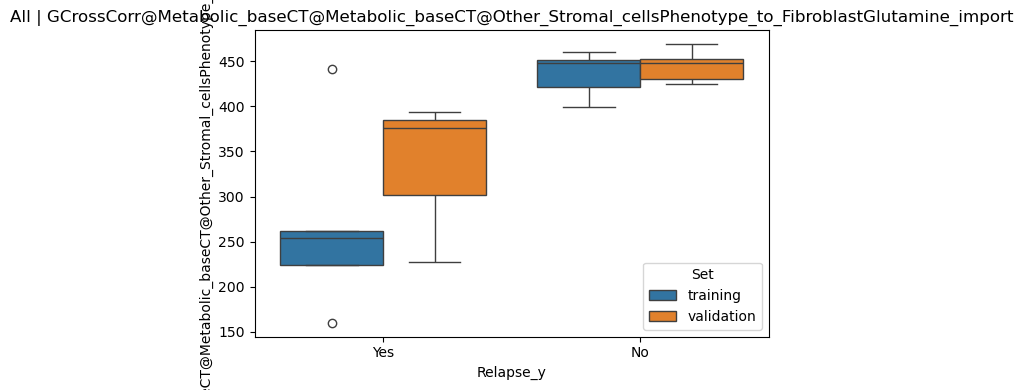

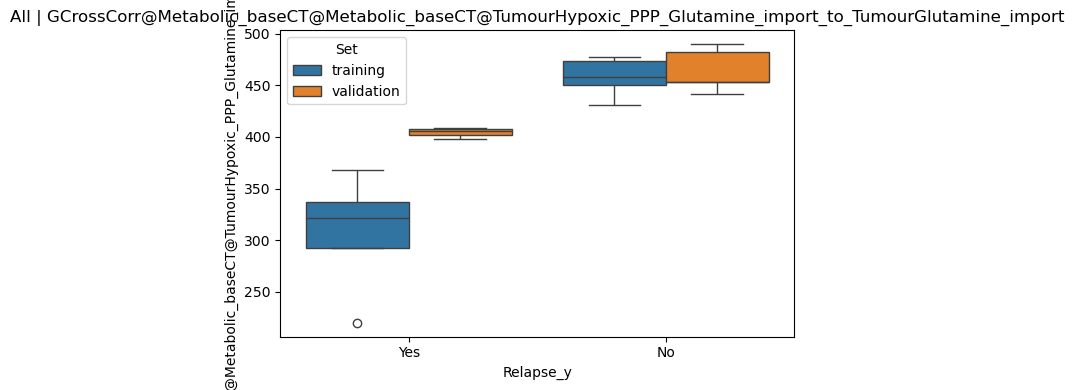

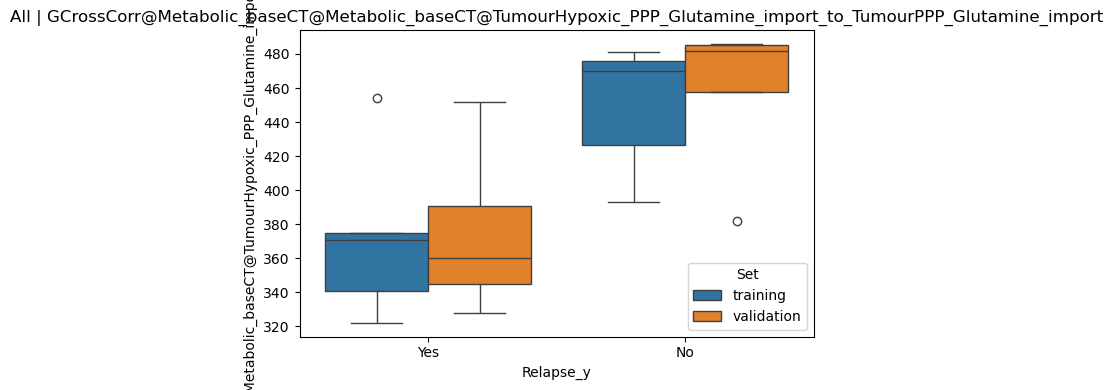

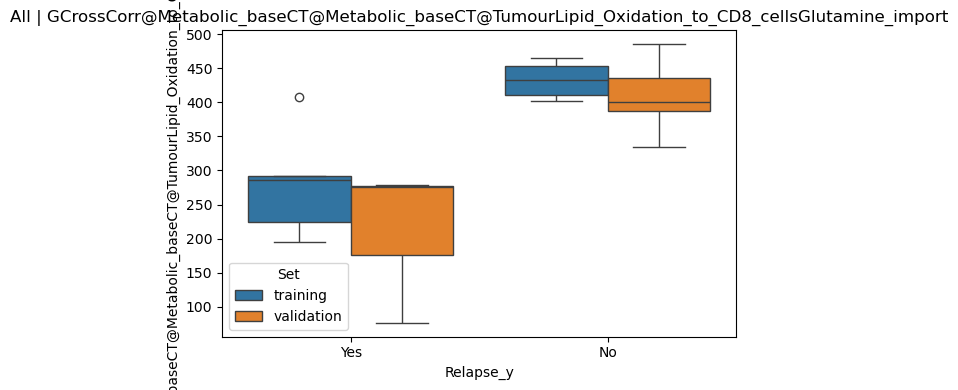

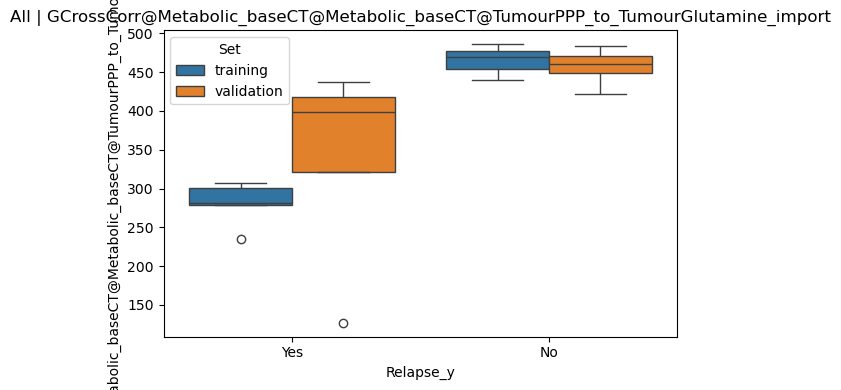

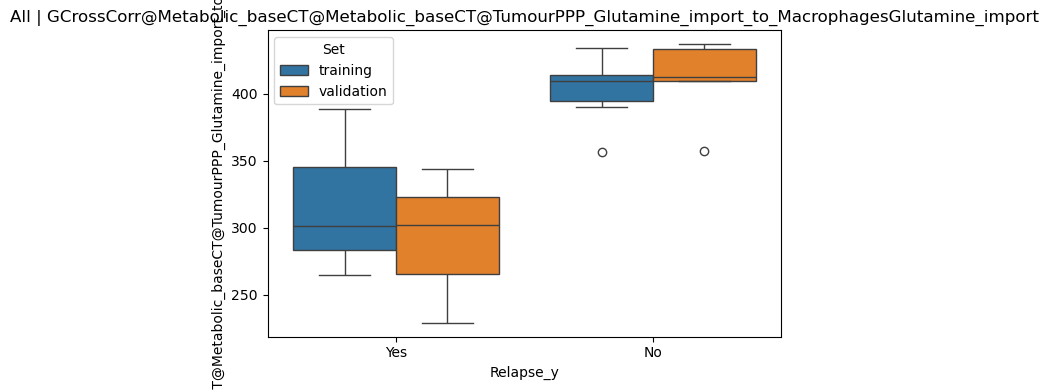

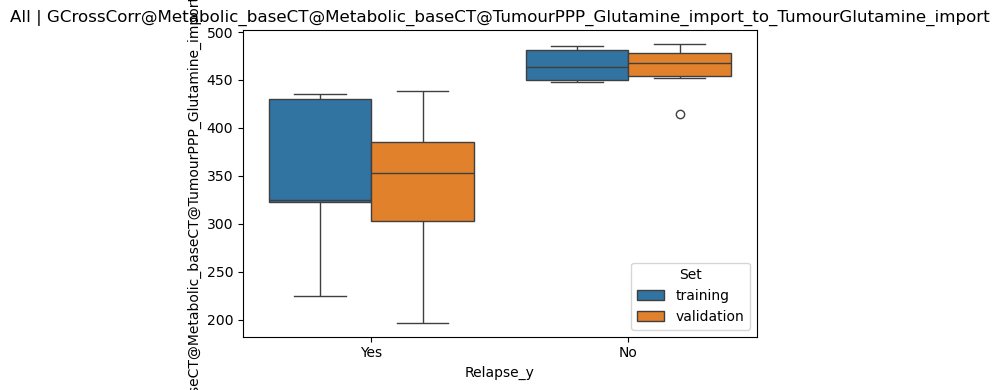

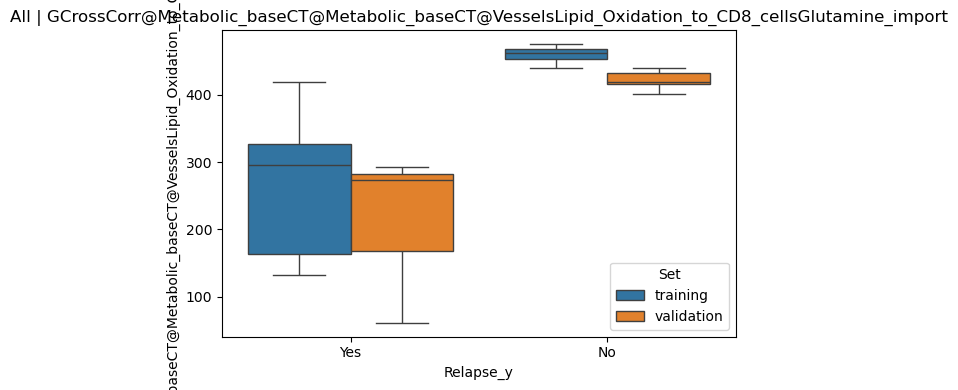

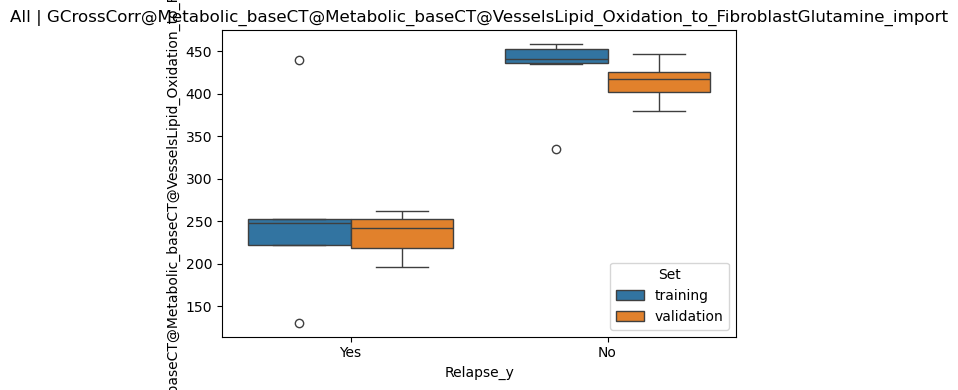

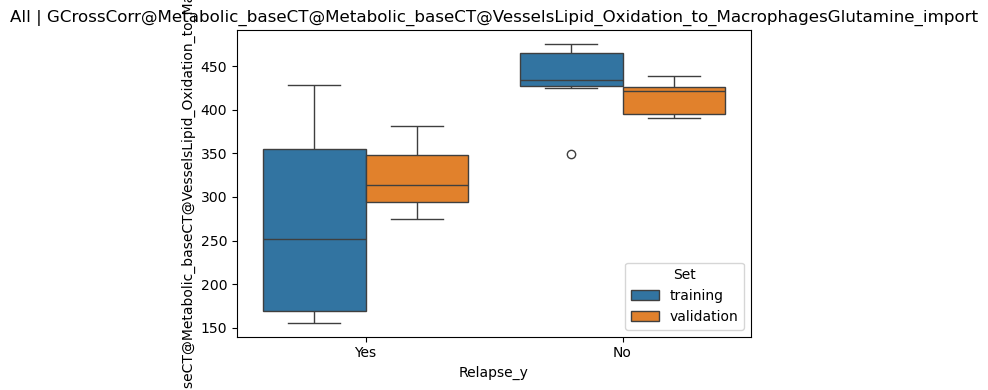

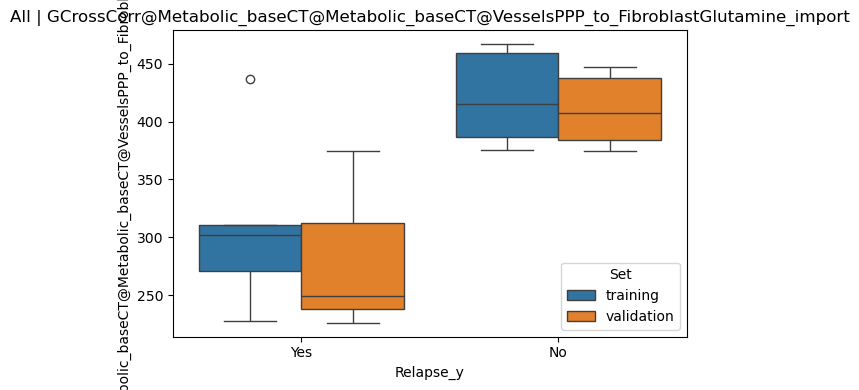

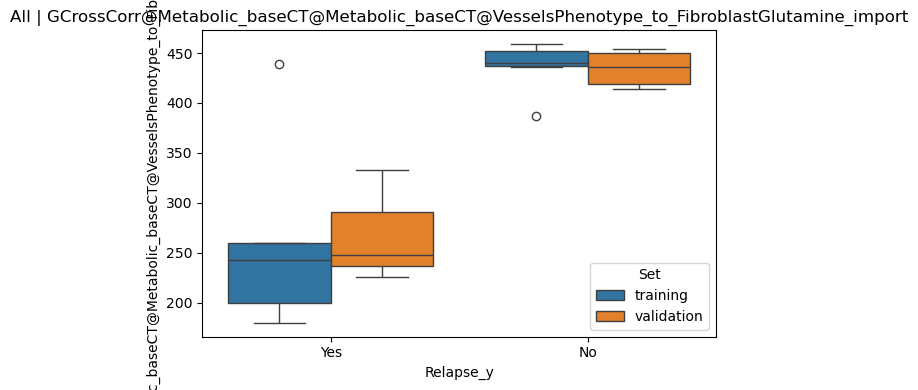

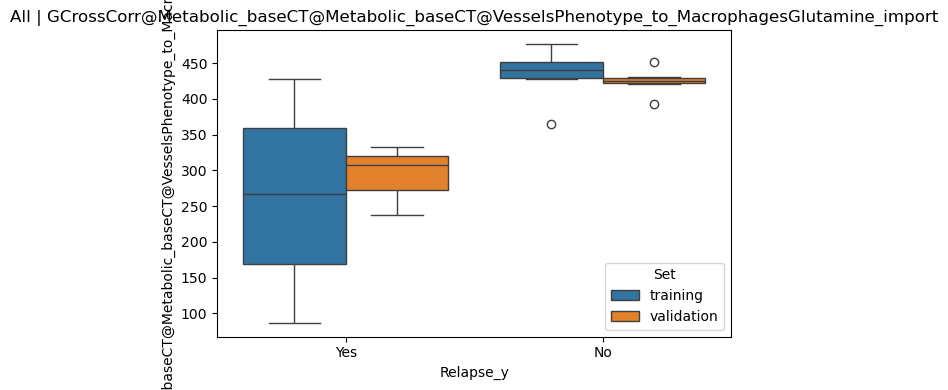

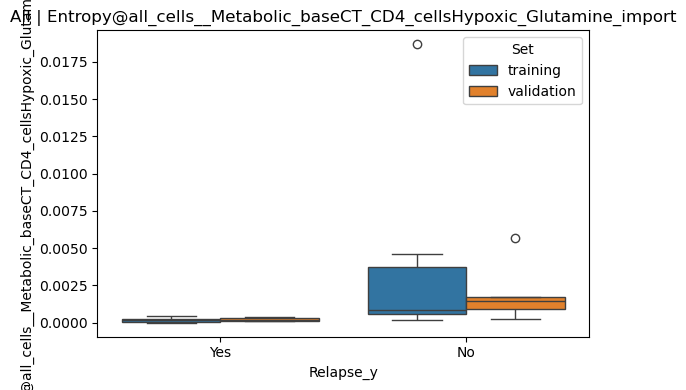

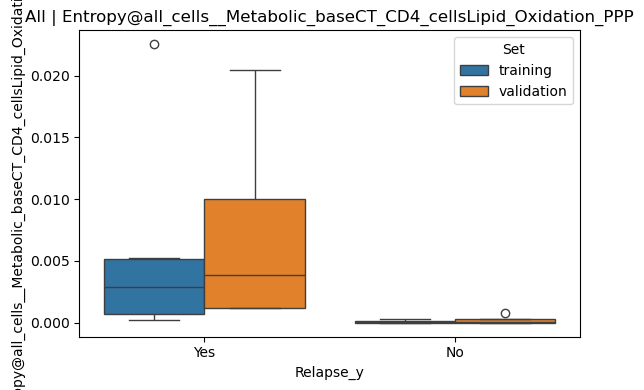

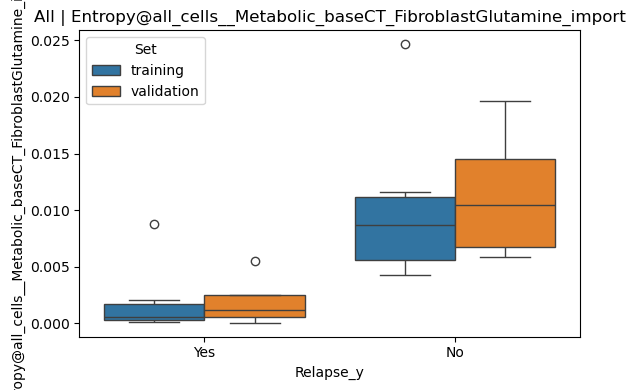

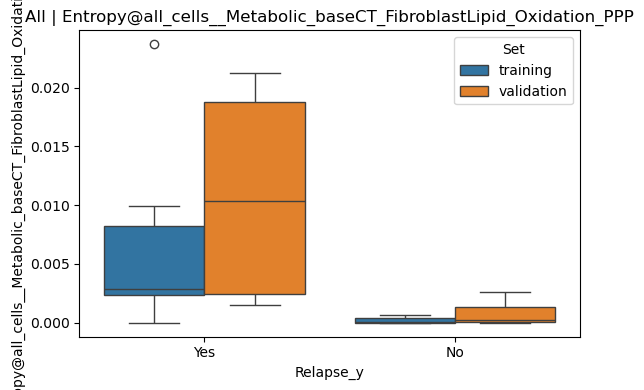

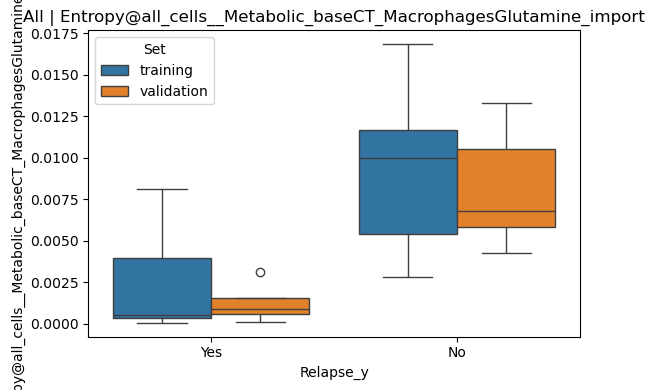

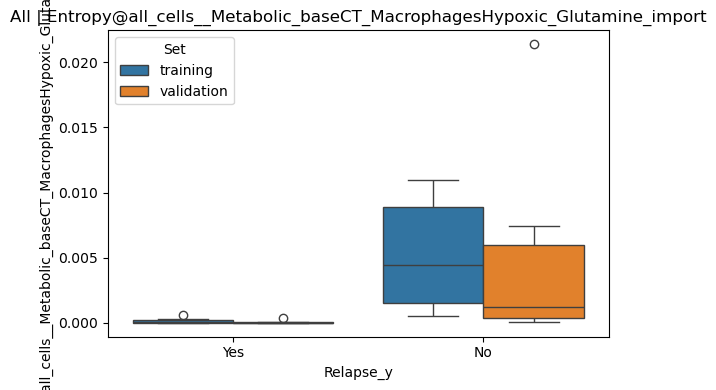

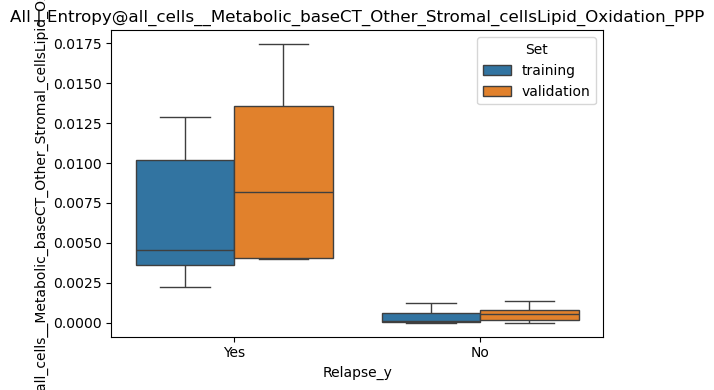

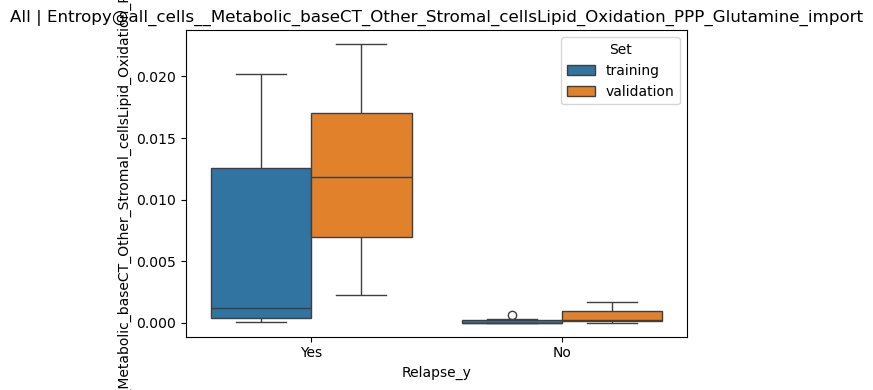

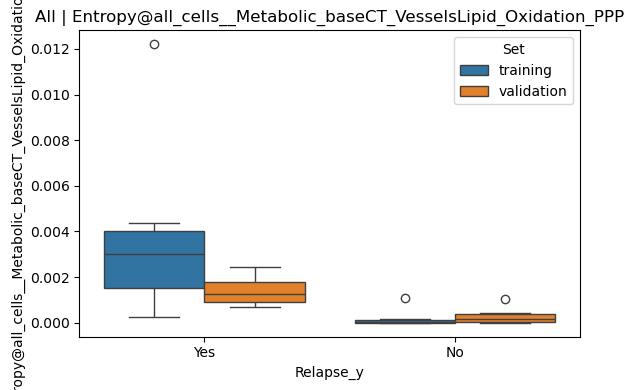

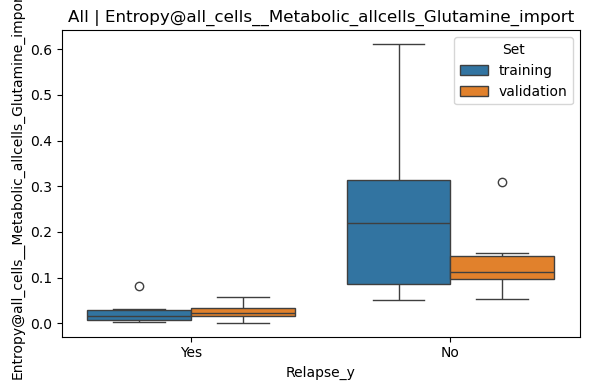

In [149]:
for feature in lusc:
    # All
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_filter[df_filter['Histology'] == 'Squamous'], x='Relapse_y', y=feature, hue = 'Set')
    plt.title(f'All | {feature}')
    plt.tight_layout()
    plt.savefig(f'Feature_csv/Aaron/figures/mann_whitney_{feature}_lusc.svg')
    plt.show()



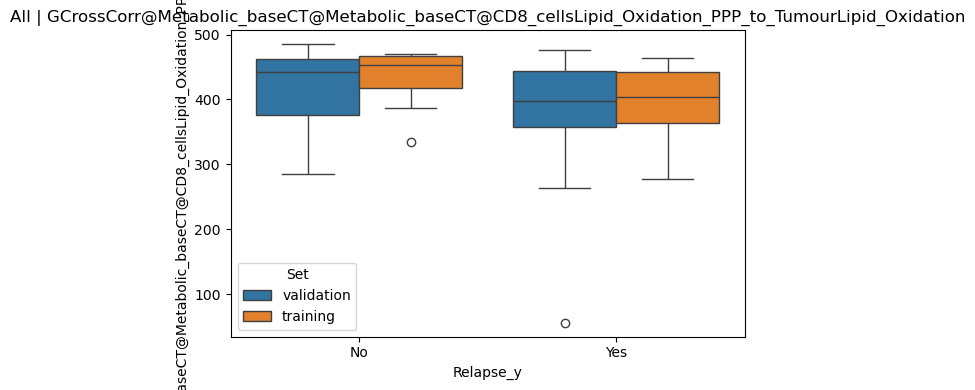

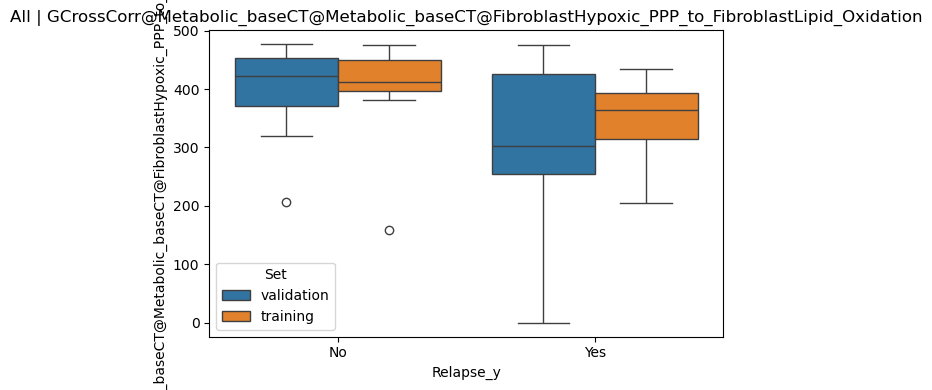

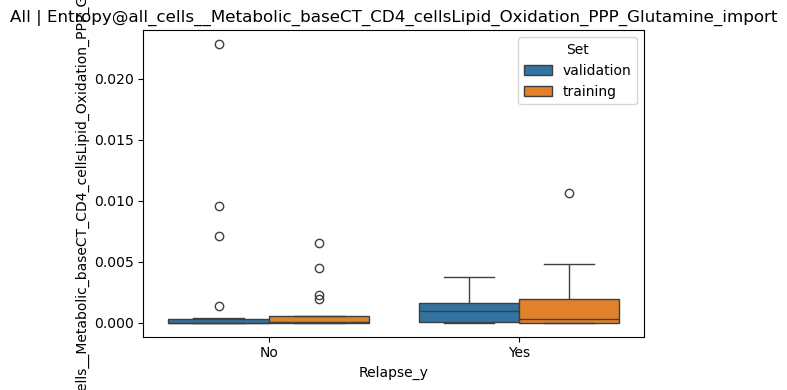

In [150]:
for feature in luad:
    # All
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_filter[df_filter['Histology'] == 'Adenocarcinoma'], x='Relapse_y', y=feature, hue = 'Set')
    plt.title(f'All | {feature}')
    plt.tight_layout()
    plt.savefig(f'Feature_csv/Aaron/figures/mann_whitney_{feature}_luad.svg')
    plt.show()



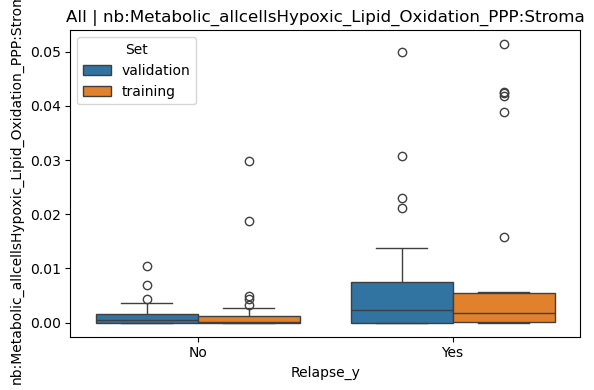

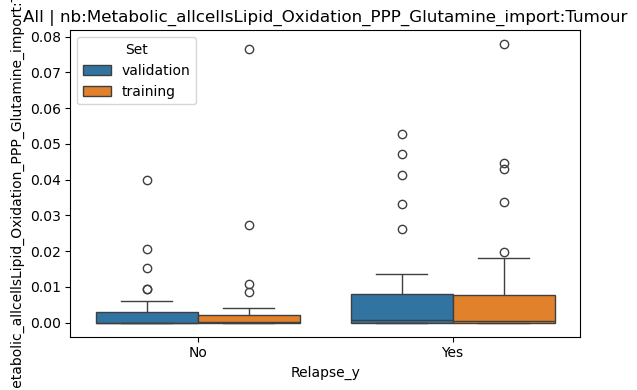

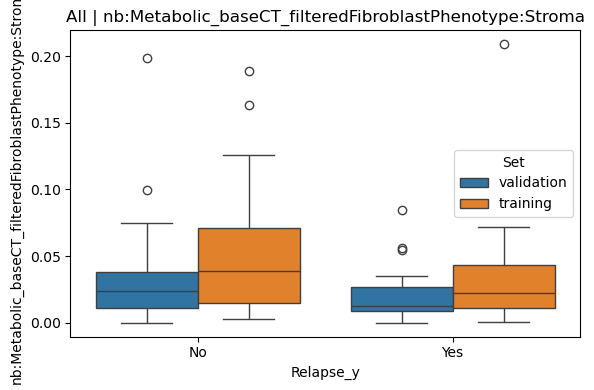

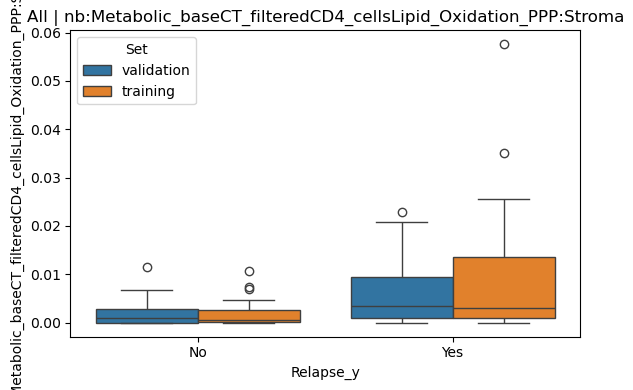

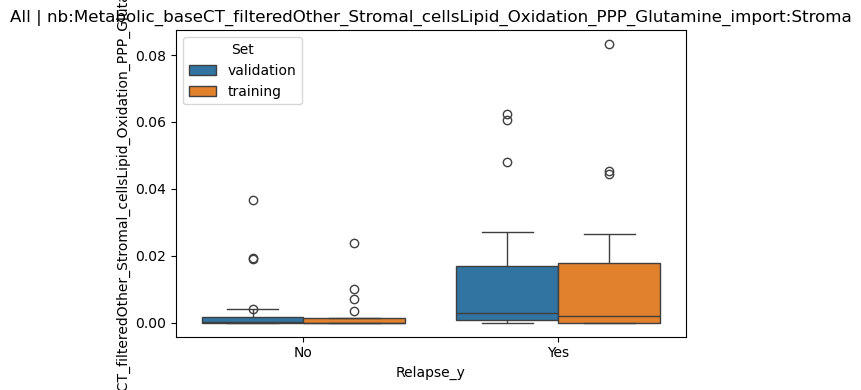

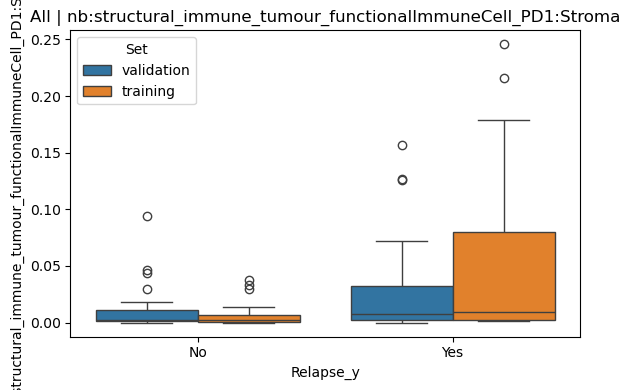

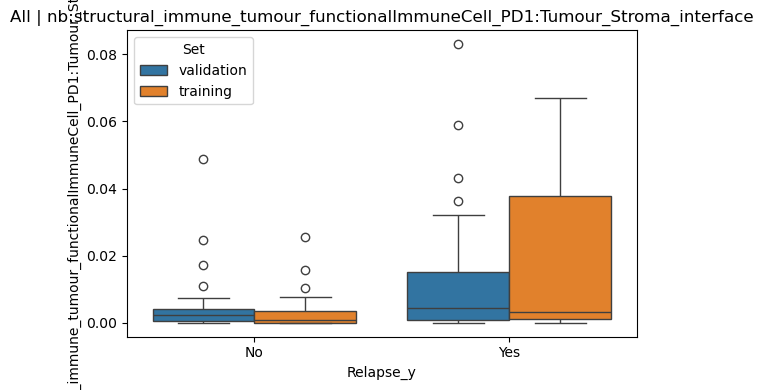

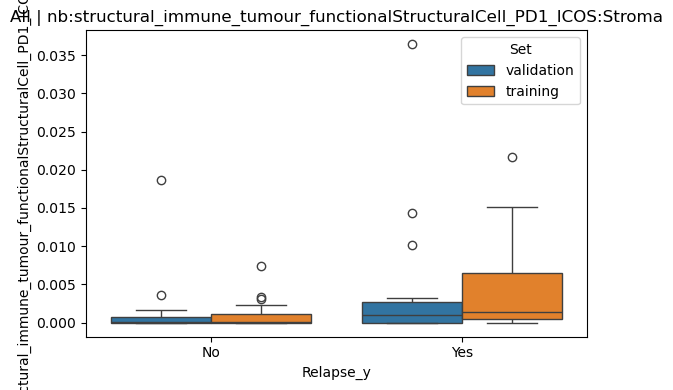

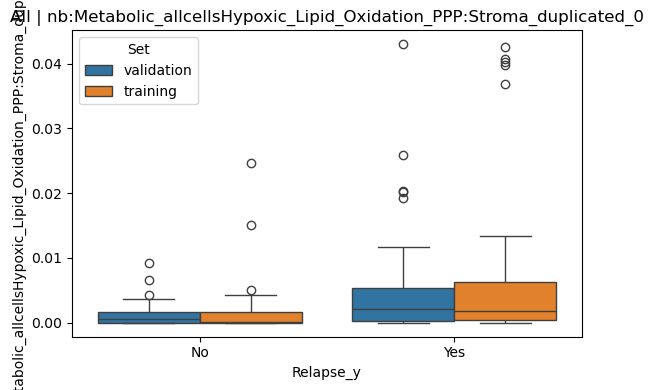

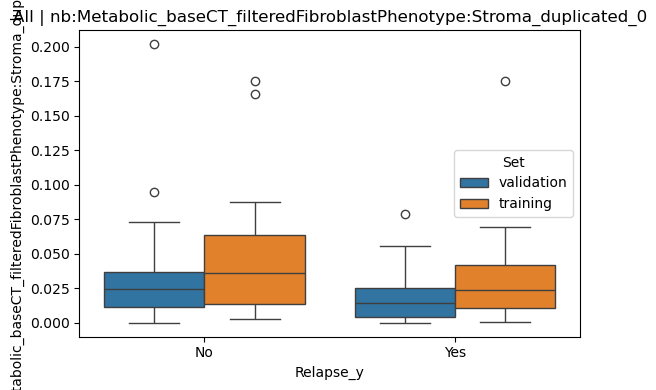

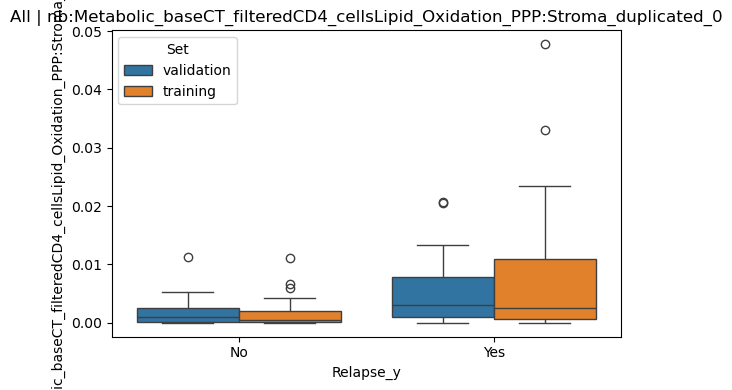

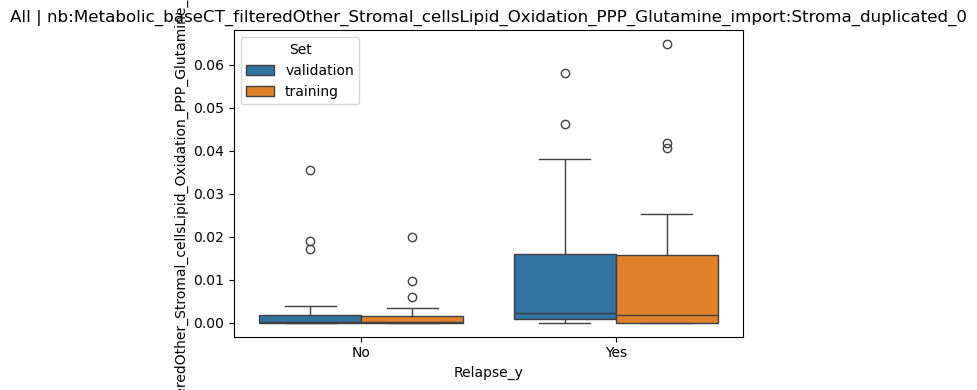

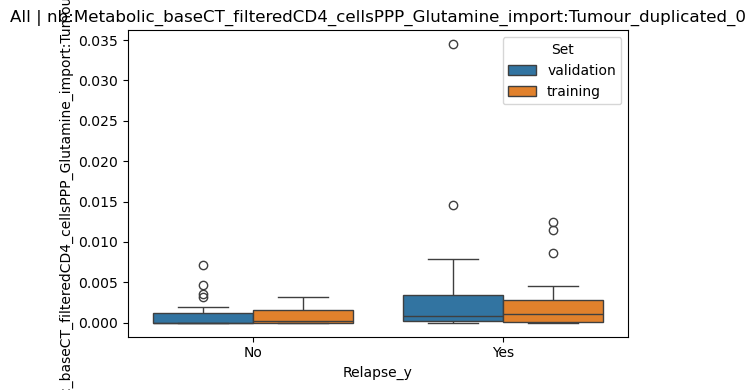

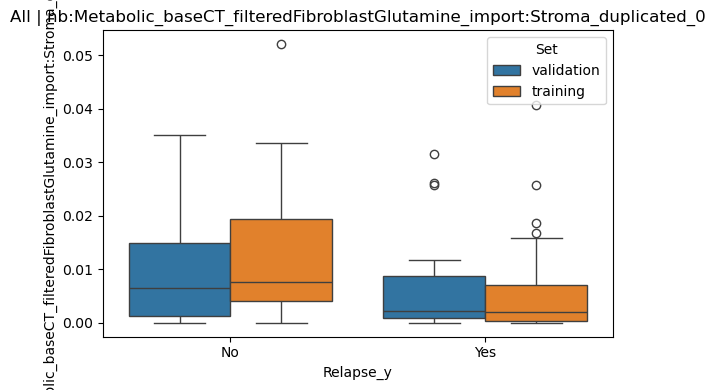

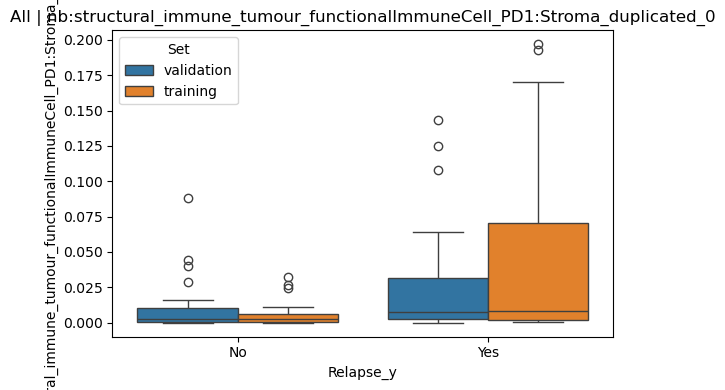

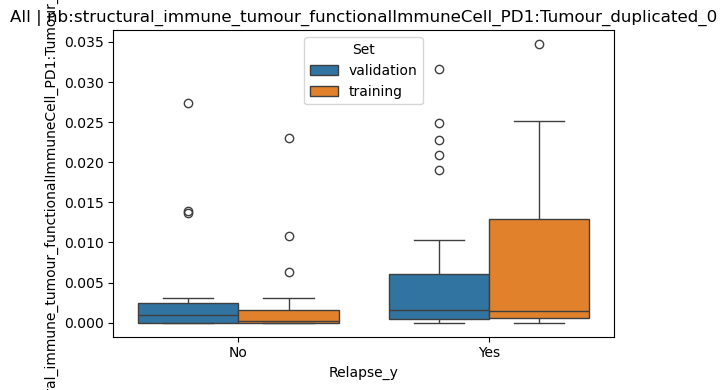

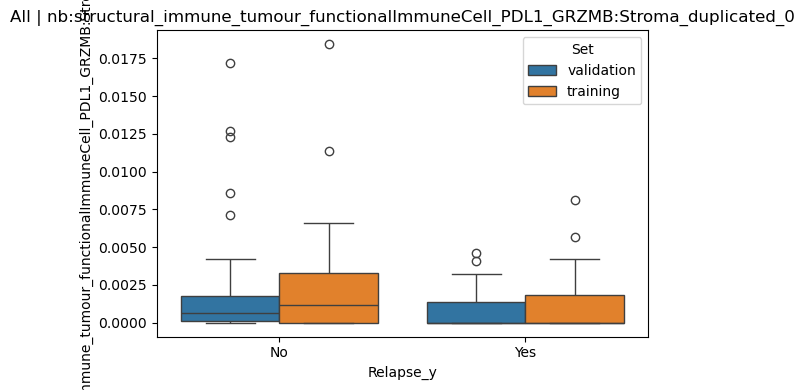

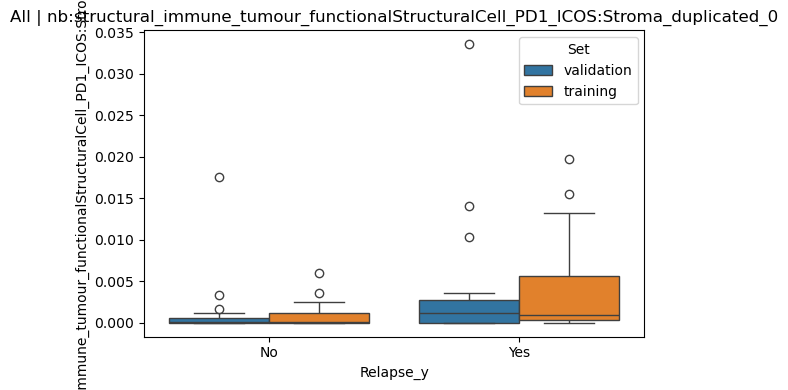

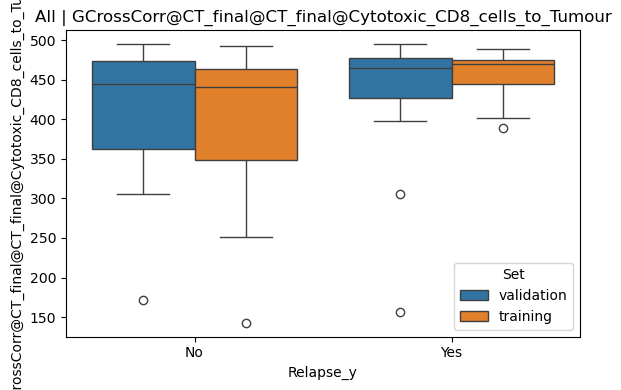

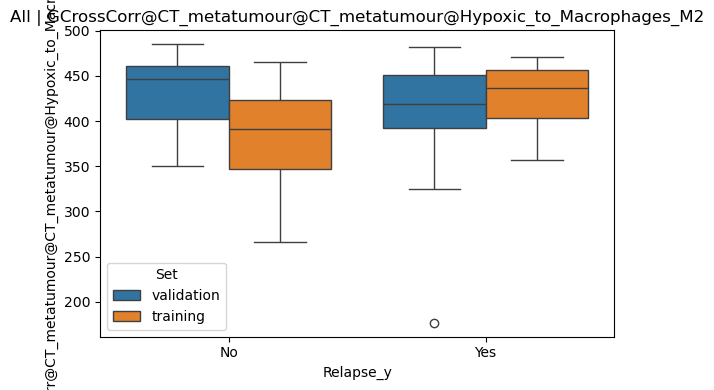

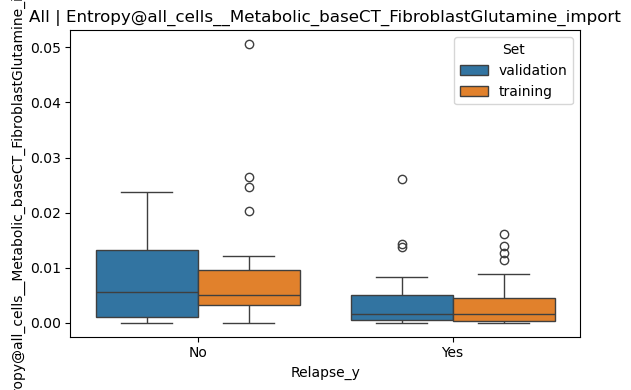

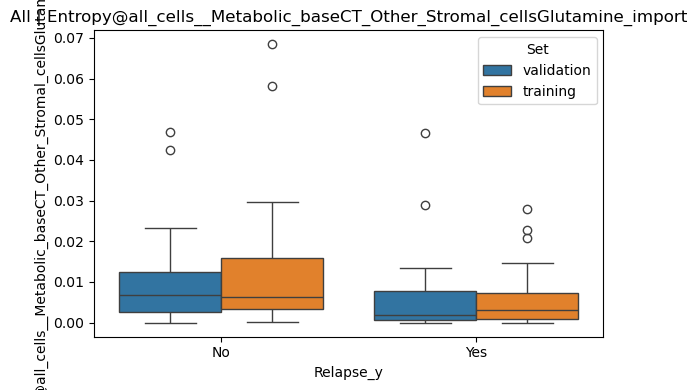

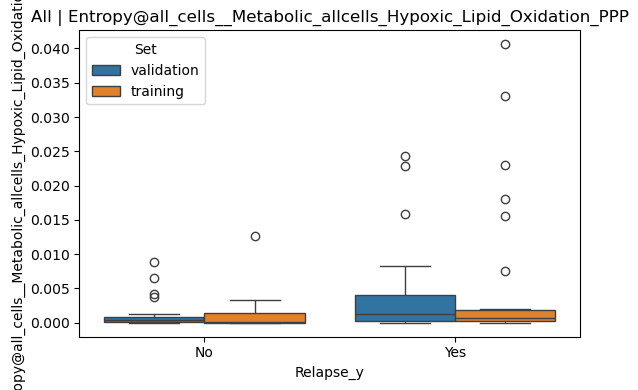

In [151]:
for feature in all_samples:
    # All
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_filter, x='Relapse_y', y=feature, hue = 'Set')
    plt.title(f'All | {feature}')
    plt.tight_layout()
    plt.savefig(f'Feature_csv/Aaron/figures/mann_whitney_{feature}_all.svg')
    plt.show()



In [153]:
all_km = ['nb:Metabolic_allcellsHypoxic:Stroma',
'nb:Metabolic_allcellsHypoxic_Lipid_Oxidation_PPP:Stroma',
'nb:Metabolic_allcellsHypoxic_Glutamine_import:Tumour_Stroma_interface',
'nb:Metabolic_allcellsLipid_Oxidation_PPP_Glutamine_import:Stroma',
'nb:Metabolic_baseCT_filteredCD4_cellsLipid_Oxidation_PPP:Stroma',
'nb:Metabolic_baseCT_filteredOther_Stromal_cellsLipid_Oxidation_PPP_Glutamine_import:Stroma',
'nb:Metabolic_baseCT_filteredFibroblastPPP_Glutamine_import:Tumour',
'nb:structural_immune_tumour_functionalImmuneCell_PD1_GRZMB:Tumour_Stroma_interface',
'nb:CT_finalMHC_II:Tumour_duplicated_0',
'nb:Metabolic_allcellsHypoxic_Glutamine_import:Tumour_duplicated_0',
'nb:Metabolic_allcellsLipid_Oxidation_PPP_Glutamine_import:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredCD4_cellsLipid_Oxidation_PPP:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredCD8_cellsPPP:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredOther_Stromal_cellsLipid_Oxidation_PPP_Glutamine_import:Stroma_duplicated_0',
'nb:Metabolic_baseCT_filteredCD8_cellsLipid_Oxidation_PPP_Glutamine_import:Stroma_duplicated_0',
'nb:structural_immune_tumour_functionalImmuneCell_PD1_HLADR:Stroma_duplicated_0',
'GCrossCorr@CT_metatumour@CT_metatumour@Tumour_metalow_to_Hypoxic',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Hypoxic_PPP_Glutamine_import_to_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Lipid_Oxidation_PPP_Glutamine_import_to_Glutamine_import',
'GCrossCorr@Metabolic_allcells@Metabolic_allcells@Lipid_Oxidation_PPP_Glutamine_import_to_Hypoxic_Glutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@B_cellsPhenotype_to_CD8_cellsPPP_Glutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD4_cellsPPP_Glutamine_import_to_CD4_cellsPPP_Glutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD4_cellsPhenotype_to_FibroblastPhenotype',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD8_cellsHypoxic_PPP_Glutamine_import_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD8_cellsHypoxic_PPP_Glutamine_import_to_FibroblastPhenotype',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@FibroblastHypoxic_PPP_Glutamine_import_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@FibroblastPPP_Glutamine_import_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@MacrophagesLipid_Oxidation_PPP_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@MacrophagesLipid_Oxidation_PPP_to_Other_Stromal_cellsHypoxic_PPP',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@MacrophagesPPP_Glutamine_import_to_CD4_cellsPPP_Glutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@MacrophagesPhenotype_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@Other_Stromal_cellsLipid_Oxidation_to_FibroblastGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@Other_Stromal_cellsLipid_Oxidation_PPP_Glutamine_import_to_Other_Stromal_cellsGlutamine_import',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@TumourPhenotype_to_TumourHypoxic',
'GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@VesselsLipid_Oxidation_PPP_to_FibroblastGlutamine_import',
'Entropy@all_cells__Metabolic_baseCT_CD4_cellsHypoxic_Glutamine_import',
'Entropy@all_cells__Metabolic_baseCT_CD4_cellsLipid_Oxidation_PPP',
'Entropy@all_cells__Metabolic_baseCT_CD4_cellsLipid_Oxidation_PPP_Glutamine_import',
'Entropy@all_cells__Metabolic_baseCT_CD8_cellsHypoxic_Glutamine_import',
'Entropy@all_cells__Metabolic_baseCT_CD8_cellsLipid_Oxidation_PPP_Glutamine_import',
'Entropy@all_cells__Metabolic_baseCT_FibroblastGlutamine_import',
'Entropy@all_cells__Metabolic_baseCT_FibroblastLipid_Oxidation_PPP_Glutamine_import',
'Entropy@all_cells__Metabolic_allcells_Lipid_Oxidation_PPP_Glutamine_import']


In [154]:
df_filter

Unnamed: 0  \
0     TMA_A_A1   
1     TMA_A_A2   
2     TMA_A_A3   
3     TMA_A_A4   
4     TMA_A_A5   
..         ...   
101   TMA_B_J2   
102   TMA_B_J3   
103   TMA_B_J4   
104   TMA_B_J7   
105   TMA_B_J8   

     JSDScores@k2CNs@CT_basetumour@CT_basetumour@AllCells_0_Macrophages_M2_PDL1+_Vessels  \
0                                                  NaN                                     
1                                             0.849263                                     
2                                             0.766869                                     
3                                             0.668055                                     
4                                             0.776492                                     
..                                                 ...                                     
101                                                NaN                                     
102                                           0.621604                                     
103                                           0.771249                                     
104                                                NaN                                     
105                                                NaN                                     

     JSDScores@k2CNs@CT_basetumour@CT_basetumour@AllCells_0_Macrophages_M2_PDL1+_Tumour  \
0                                                  NaN                                    
1                                             0.737798                                    
2                                             0.734866                                    
3                                             0.715580                                    
4                                             0.661261                                    
..                                                 ...                                    
101                                                NaN                                    
102                                           0.543270                                    
103                                           0.697754                                    
104                                                NaN                                    
105                                                NaN                                    

     JSDScores@k2CNs@CT_basetumour@CT_basetumour@AllCells_0_CD8_cells_Fibroblast  \
0                                             0.506636                             
1                                                  NaN                             
2                                             0.779122                             
3                                             0.678584                             
4                                                  NaN                             
..                                                 ...                             
101                                                NaN                             
102                                           0.743199                             
103                                                NaN                             
104                                                NaN                             
105                                           0.397013                             

     JSDScores@k2CNs@CT_basetumour@CT_basetumour@AllCells_0_CD8_cells_Tumour  \
0                                             0.483936                         
1                                                  NaN                         
2                                             0.693202                         
3                                             0.613596                         
4                                                  NaN                         
..                                                 ...                         
101                 


===== nb:Metabolic_allcellsHypoxic:Stroma =====


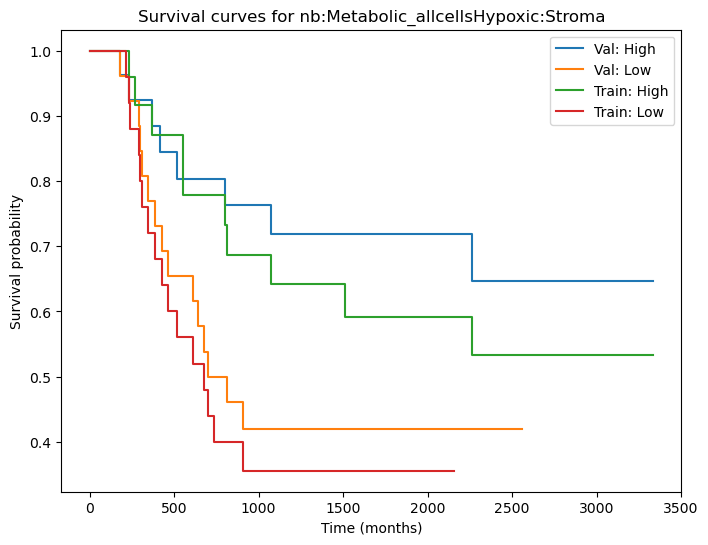

Validation log-rank p = 0.0343
Training log-rank p = 0.0394

===== nb:Metabolic_allcellsHypoxic_Lipid_Oxidation_PPP:Stroma =====


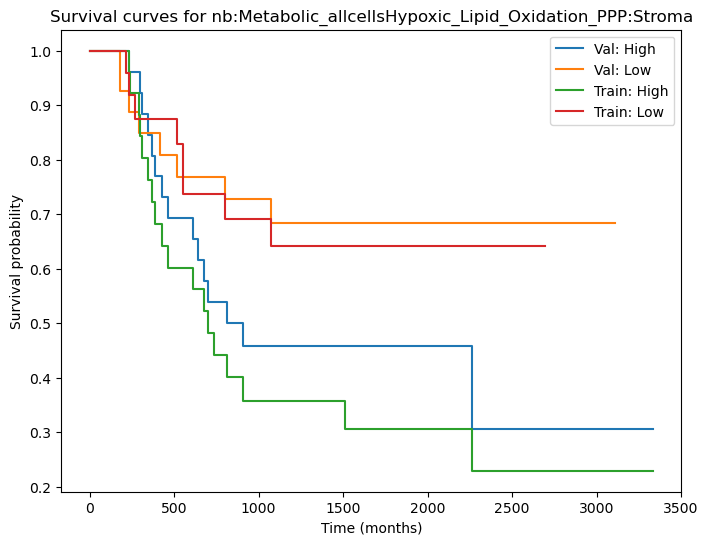

Validation log-rank p = 0.0782
Training log-rank p = 0.0216

===== nb:Metabolic_allcellsHypoxic_Glutamine_import:Tumour_Stroma_interface =====


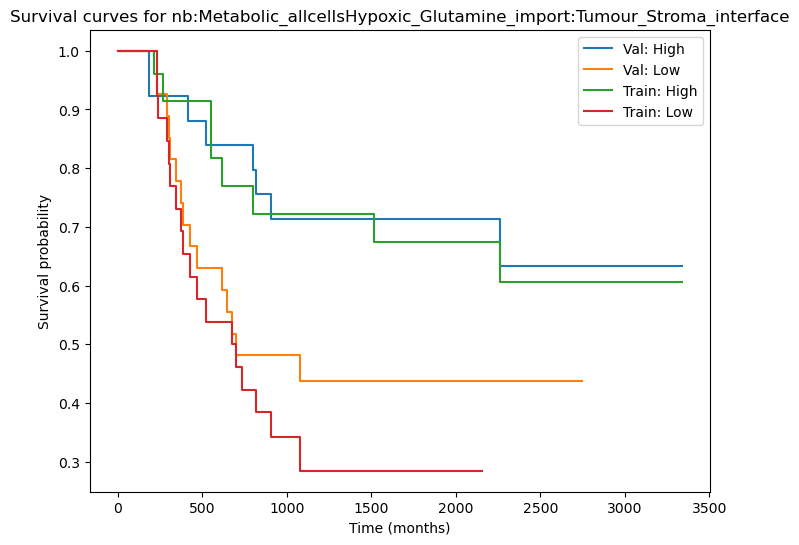

Validation log-rank p = 0.0579
Training log-rank p = 0.0056

===== nb:Metabolic_allcellsLipid_Oxidation_PPP_Glutamine_import:Stroma =====


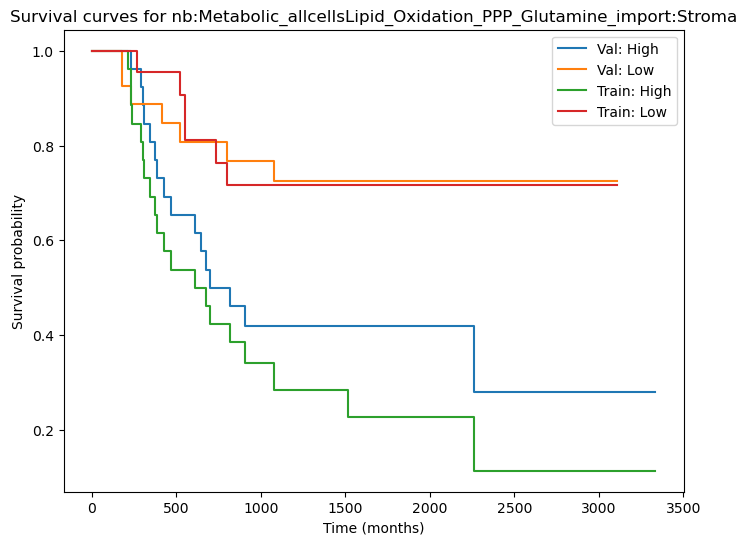

Validation log-rank p = 0.0160
Training log-rank p = 0.0005

===== nb:Metabolic_baseCT_filteredCD4_cellsLipid_Oxidation_PPP:Stroma =====


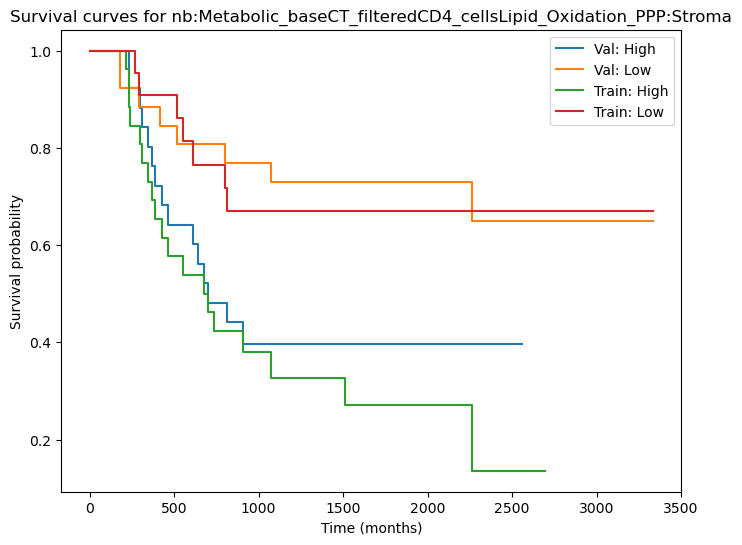

Validation log-rank p = 0.0246
Training log-rank p = 0.0042

===== nb:Metabolic_baseCT_filteredOther_Stromal_cellsLipid_Oxidation_PPP_Glutamine_import:Stroma =====


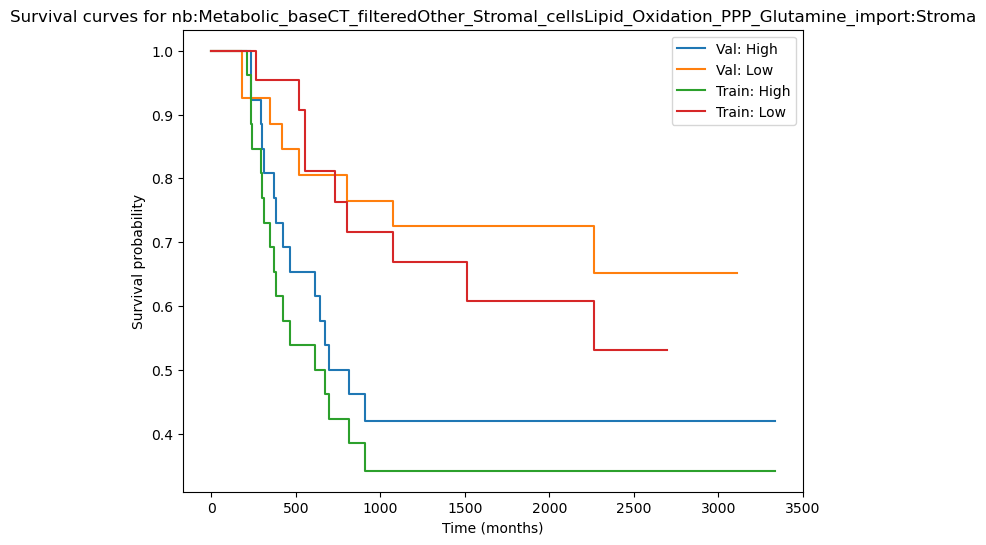

Validation log-rank p = 0.0332
Training log-rank p = 0.0219

===== nb:Metabolic_baseCT_filteredFibroblastPPP_Glutamine_import:Tumour =====


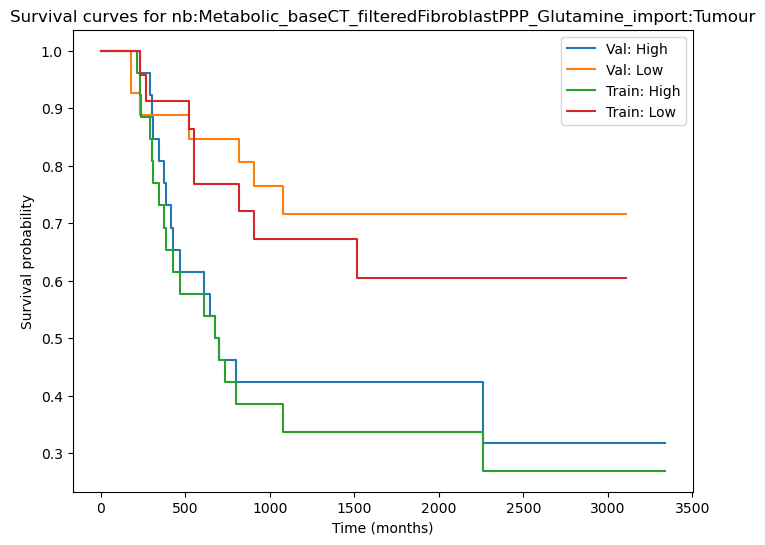

Validation log-rank p = 0.0146
Training log-rank p = 0.0218

===== nb:structural_immune_tumour_functionalImmuneCell_PD1_GRZMB:Tumour_Stroma_interface =====


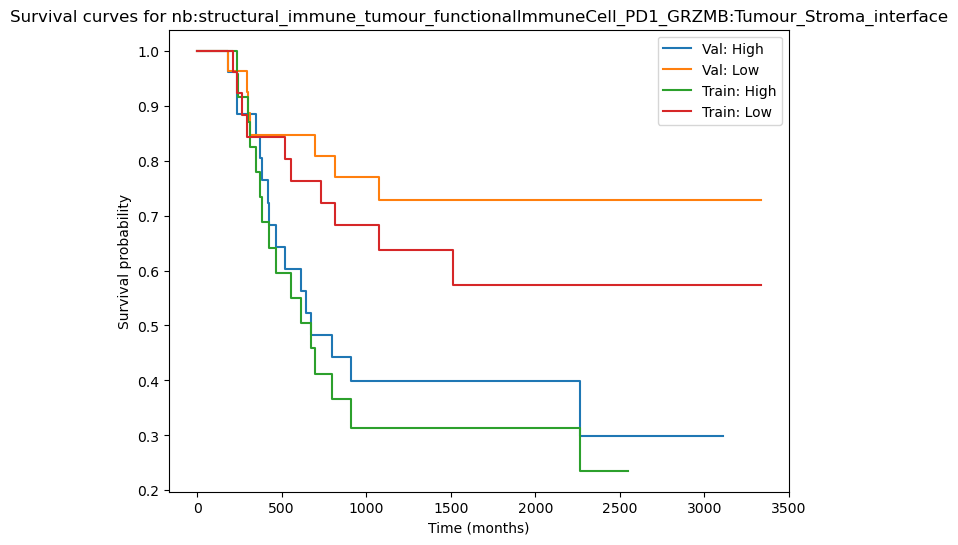

Validation log-rank p = 0.0090
Training log-rank p = 0.0307

===== nb:CT_finalMHC_II:Tumour_duplicated_0 =====


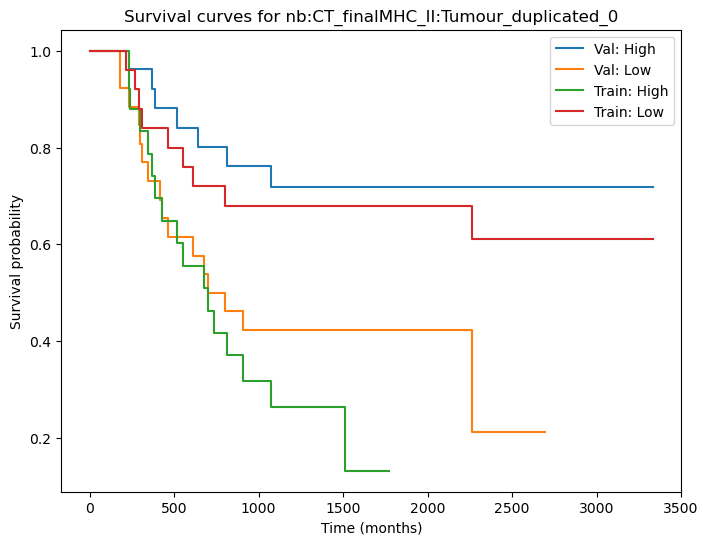

Validation log-rank p = 0.0084
Training log-rank p = 0.0043

===== nb:Metabolic_allcellsHypoxic_Glutamine_import:Tumour_duplicated_0 =====


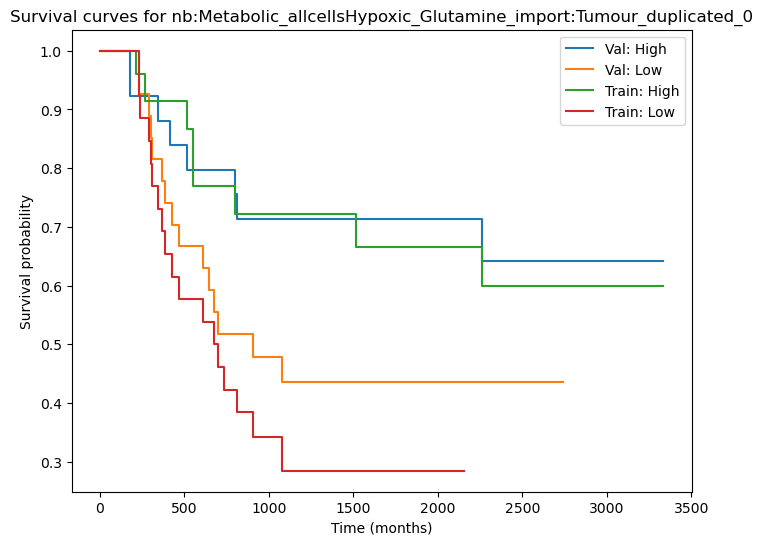

Validation log-rank p = 0.0735
Training log-rank p = 0.0079

===== nb:Metabolic_allcellsLipid_Oxidation_PPP_Glutamine_import:Stroma_duplicated_0 =====


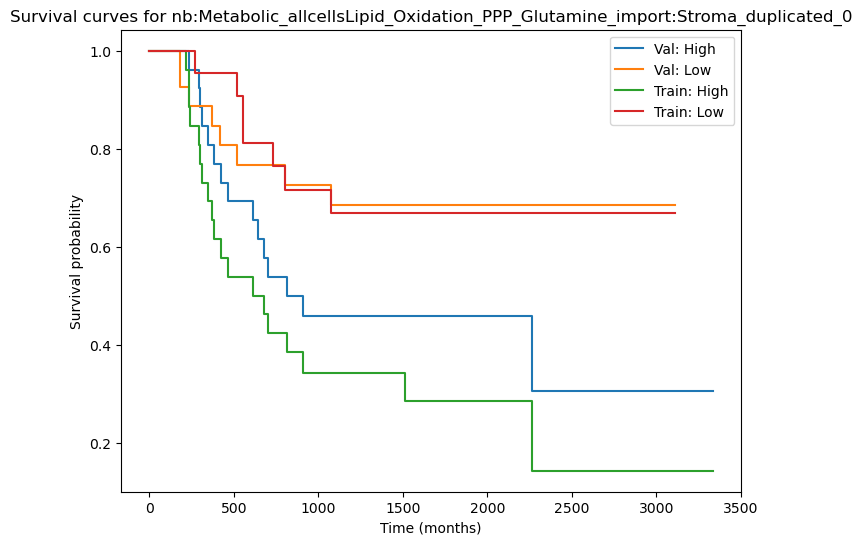

Validation log-rank p = 0.0691
Training log-rank p = 0.0022

===== nb:Metabolic_baseCT_filteredCD4_cellsLipid_Oxidation_PPP:Stroma_duplicated_0 =====


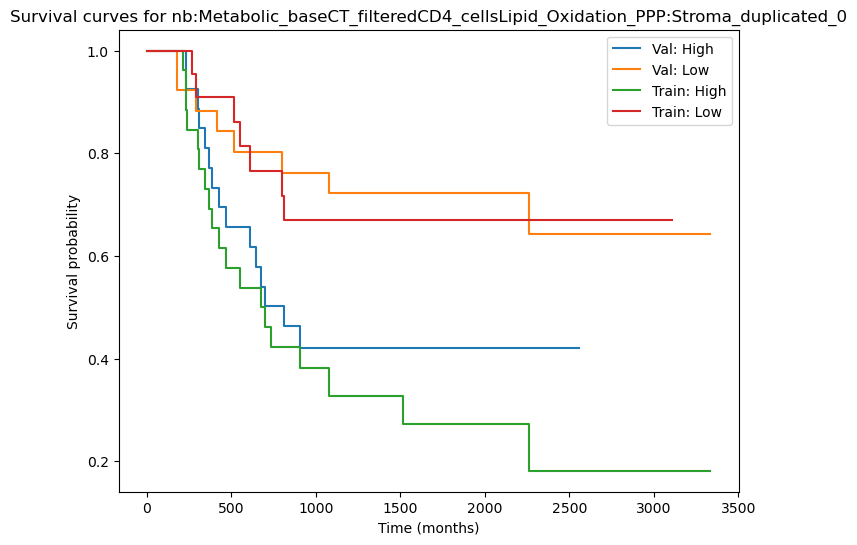

Validation log-rank p = 0.0446
Training log-rank p = 0.0049

===== nb:Metabolic_baseCT_filteredCD8_cellsPPP:Stroma_duplicated_0 =====


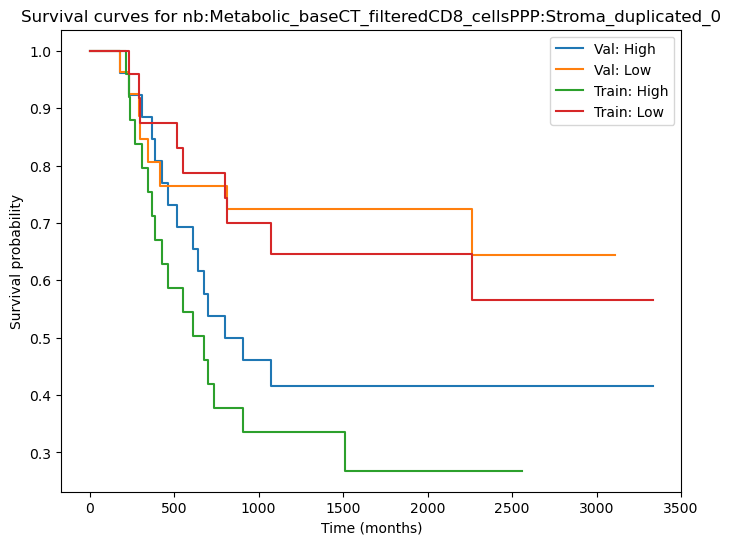

Validation log-rank p = 0.0802
Training log-rank p = 0.0148

===== nb:Metabolic_baseCT_filteredOther_Stromal_cellsLipid_Oxidation_PPP_Glutamine_import:Stroma_duplicated_0 =====


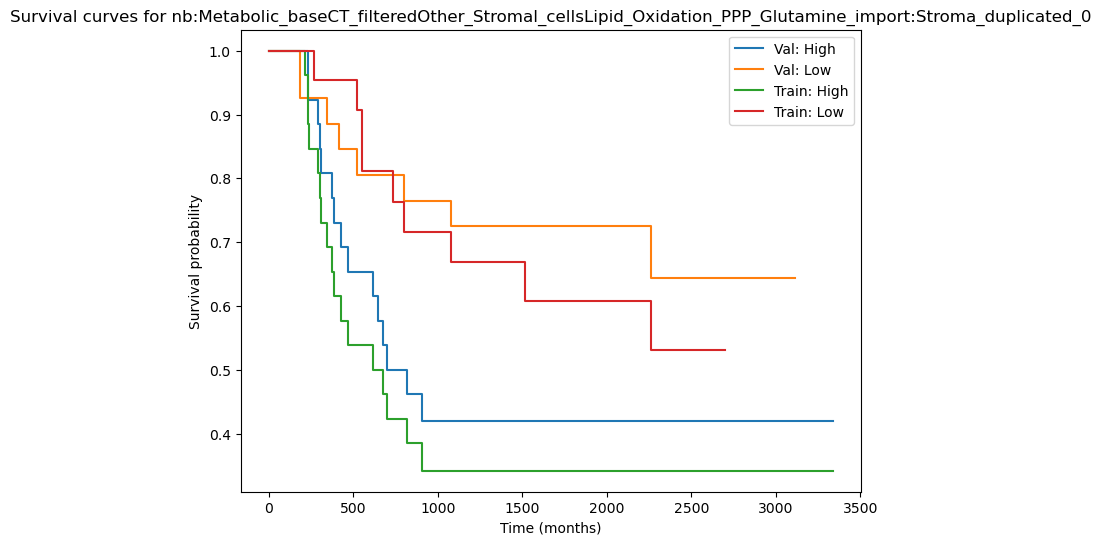

Validation log-rank p = 0.0377
Training log-rank p = 0.0219

===== nb:Metabolic_baseCT_filteredCD8_cellsLipid_Oxidation_PPP_Glutamine_import:Stroma_duplicated_0 =====


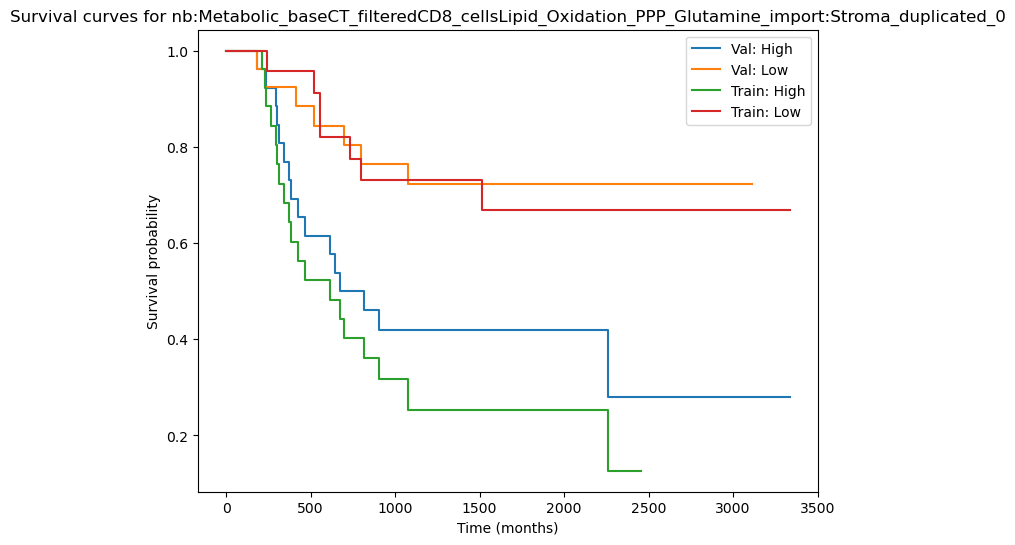

Validation log-rank p = 0.0098
Training log-rank p = 0.0007

===== nb:structural_immune_tumour_functionalImmuneCell_PD1_HLADR:Stroma_duplicated_0 =====


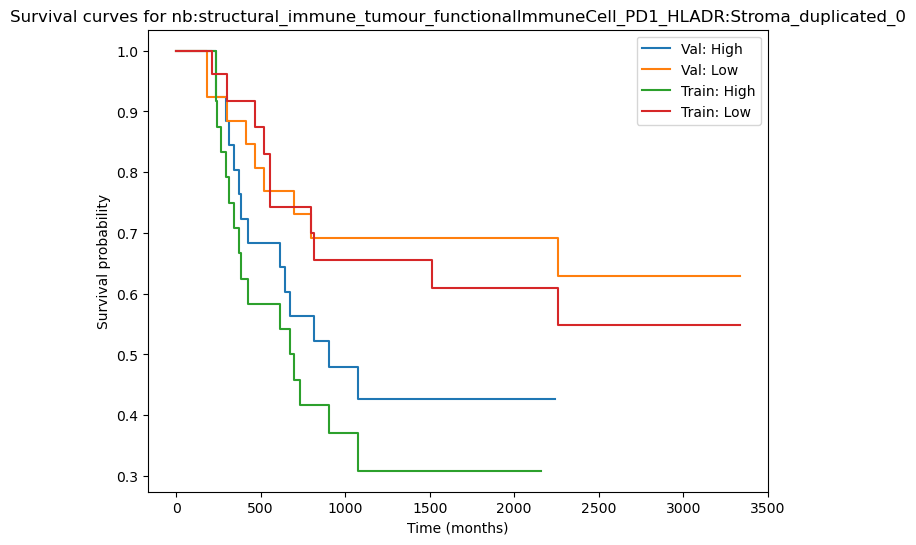

Validation log-rank p = 0.0896
Training log-rank p = 0.0228

===== GCrossCorr@CT_metatumour@CT_metatumour@Tumour_metalow_to_Hypoxic =====


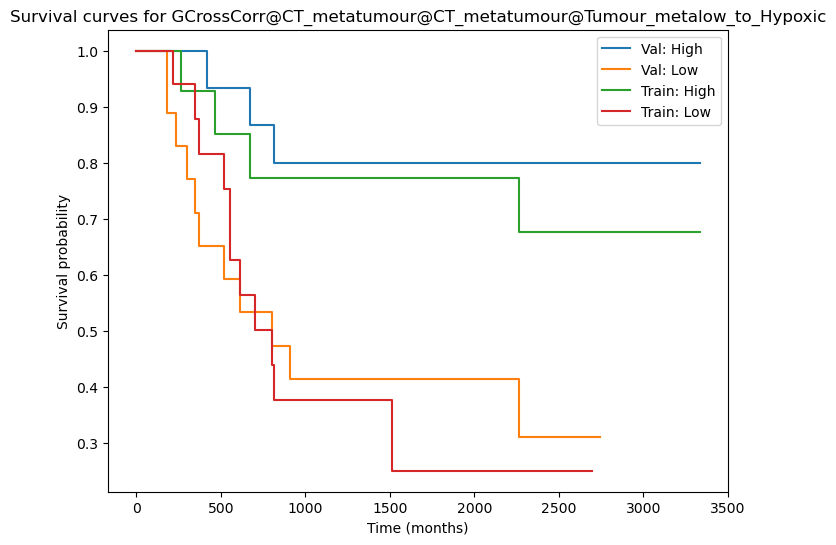

Validation log-rank p = 0.0092
Training log-rank p = 0.0301

===== GCrossCorr@Metabolic_allcells@Metabolic_allcells@Hypoxic_PPP_Glutamine_import_to_Glutamine_import =====


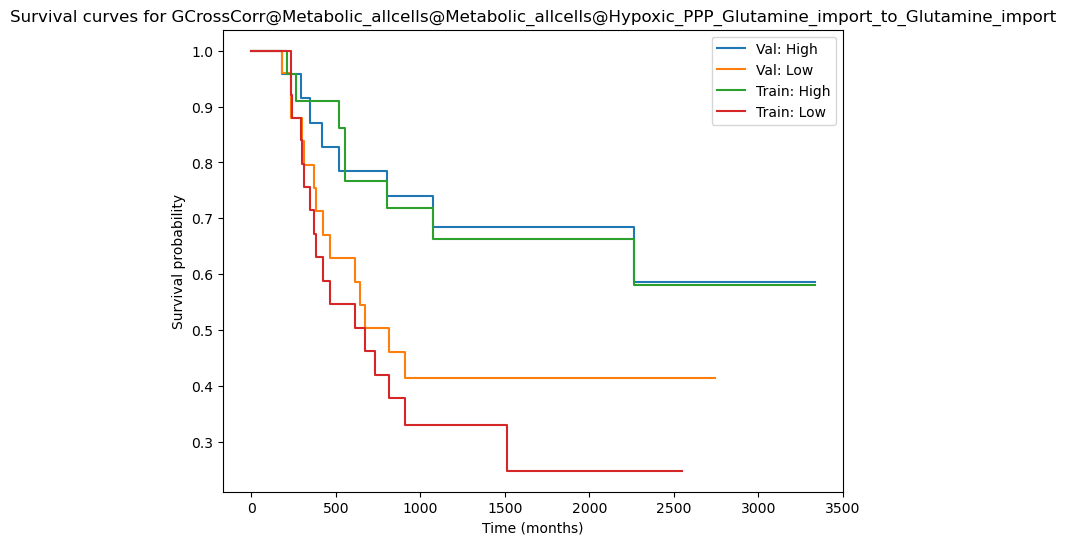

Validation log-rank p = 0.0856
Training log-rank p = 0.0126

===== GCrossCorr@Metabolic_allcells@Metabolic_allcells@Lipid_Oxidation_PPP_Glutamine_import_to_Glutamine_import =====


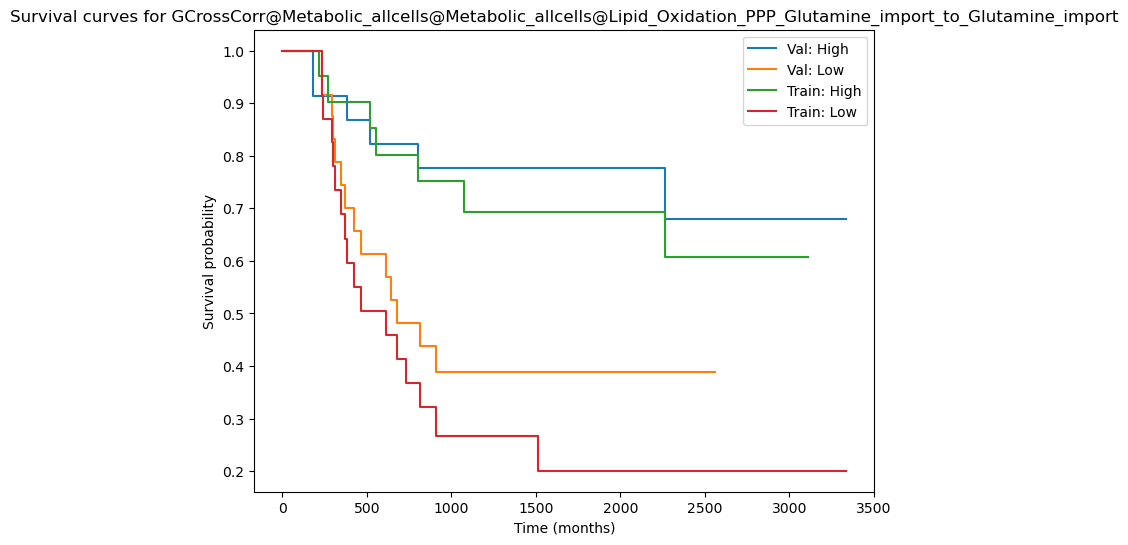

Validation log-rank p = 0.0197
Training log-rank p = 0.0024

===== GCrossCorr@Metabolic_allcells@Metabolic_allcells@Lipid_Oxidation_PPP_Glutamine_import_to_Hypoxic_Glutamine_import =====


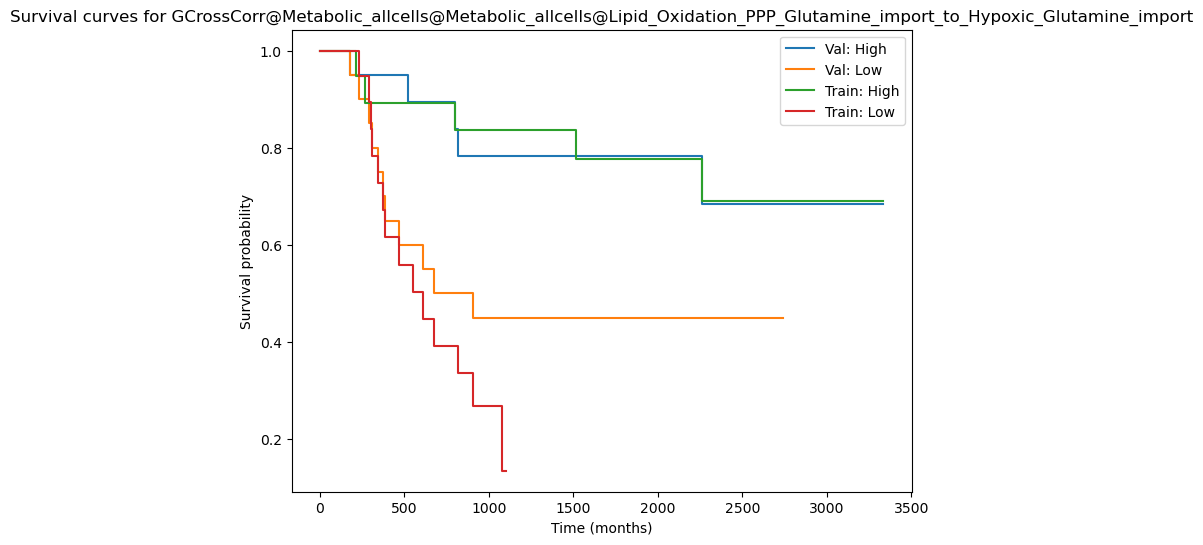

Validation log-rank p = 0.0413
Training log-rank p = 0.0003

===== GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@B_cellsPhenotype_to_CD8_cellsPPP_Glutamine_import =====


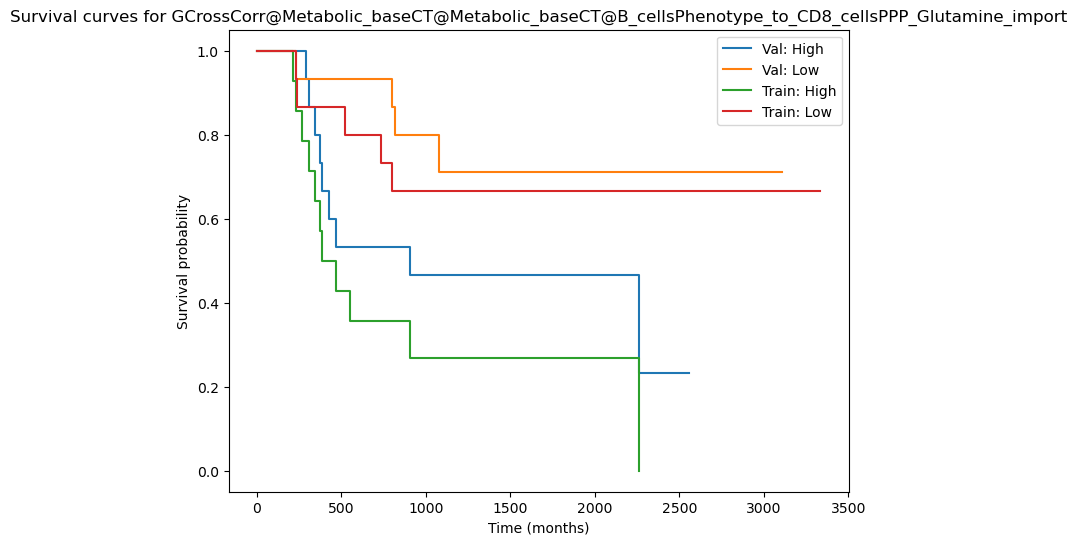

Validation log-rank p = 0.0579
Training log-rank p = 0.0110

===== GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD4_cellsPPP_Glutamine_import_to_CD4_cellsPPP_Glutamine_import =====


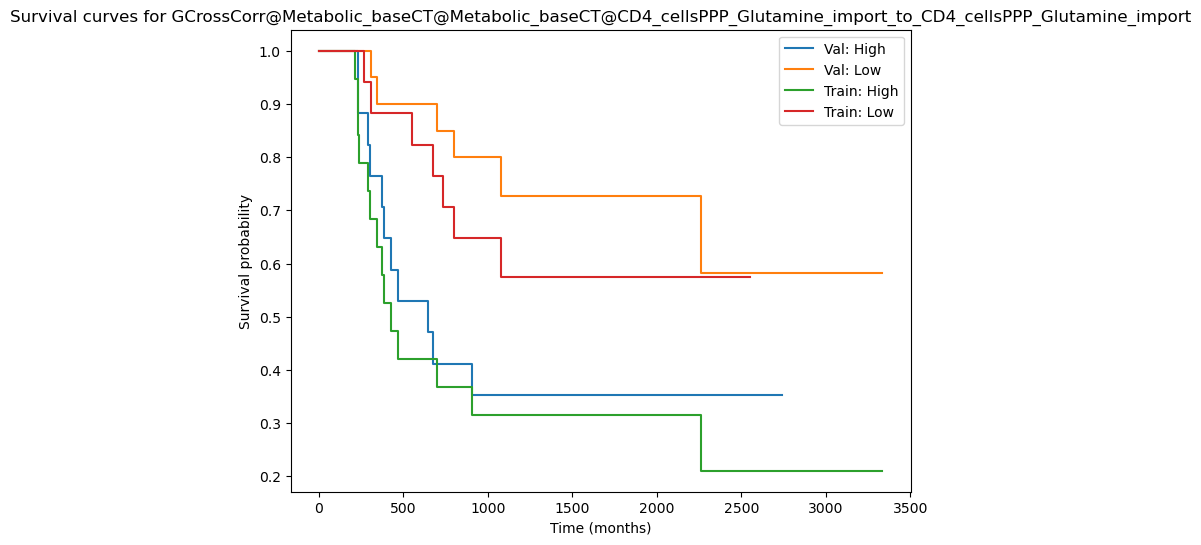

Validation log-rank p = 0.0133
Training log-rank p = 0.0287

===== GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD4_cellsPhenotype_to_FibroblastPhenotype =====


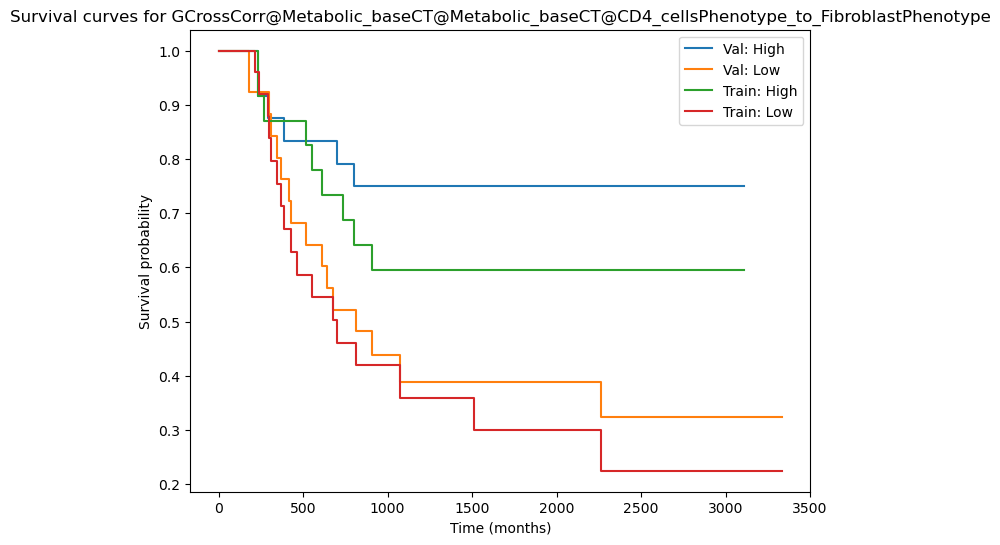

Validation log-rank p = 0.0138
Training log-rank p = 0.0447

===== GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD8_cellsHypoxic_PPP_Glutamine_import_to_FibroblastGlutamine_import =====


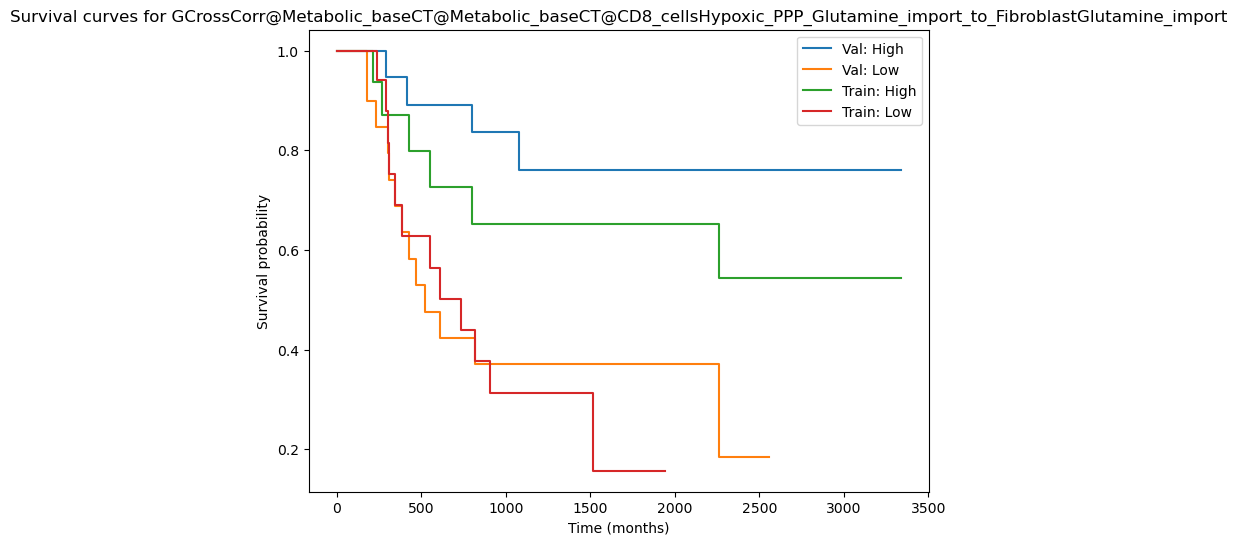

Validation log-rank p = 0.0032
Training log-rank p = 0.0458

===== GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@CD8_cellsHypoxic_PPP_Glutamine_import_to_FibroblastPhenotype =====


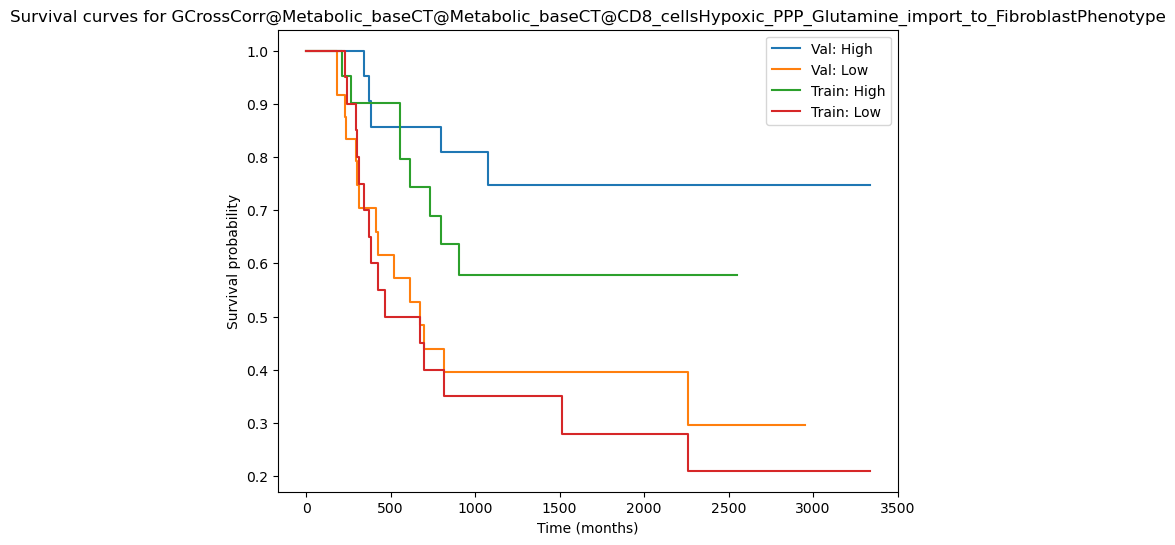

Validation log-rank p = 0.0058
Training log-rank p = 0.0427

===== GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@FibroblastHypoxic_PPP_Glutamine_import_to_FibroblastGlutamine_import =====


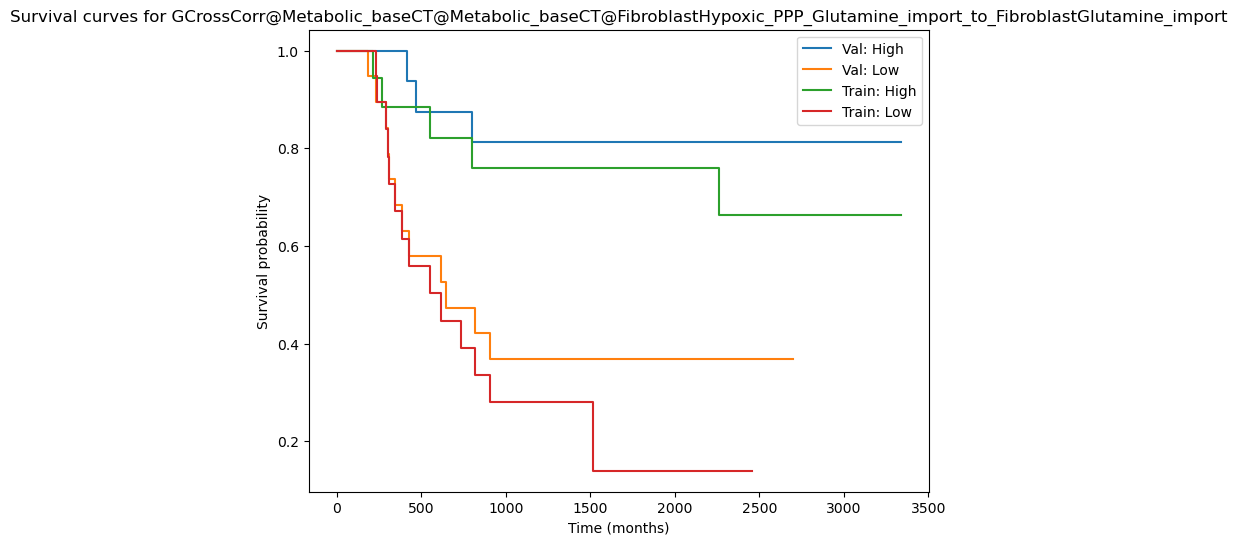

Validation log-rank p = 0.0065
Training log-rank p = 0.0037

===== GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@FibroblastPPP_Glutamine_import_to_FibroblastGlutamine_import =====


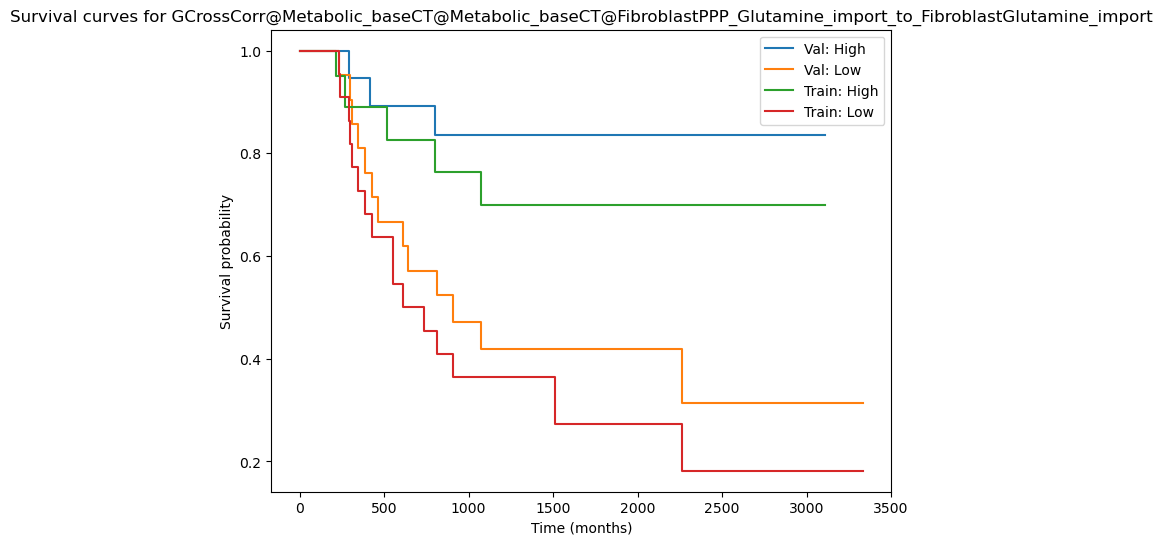

Validation log-rank p = 0.0069
Training log-rank p = 0.0099

===== GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@MacrophagesLipid_Oxidation_PPP_to_FibroblastGlutamine_import =====


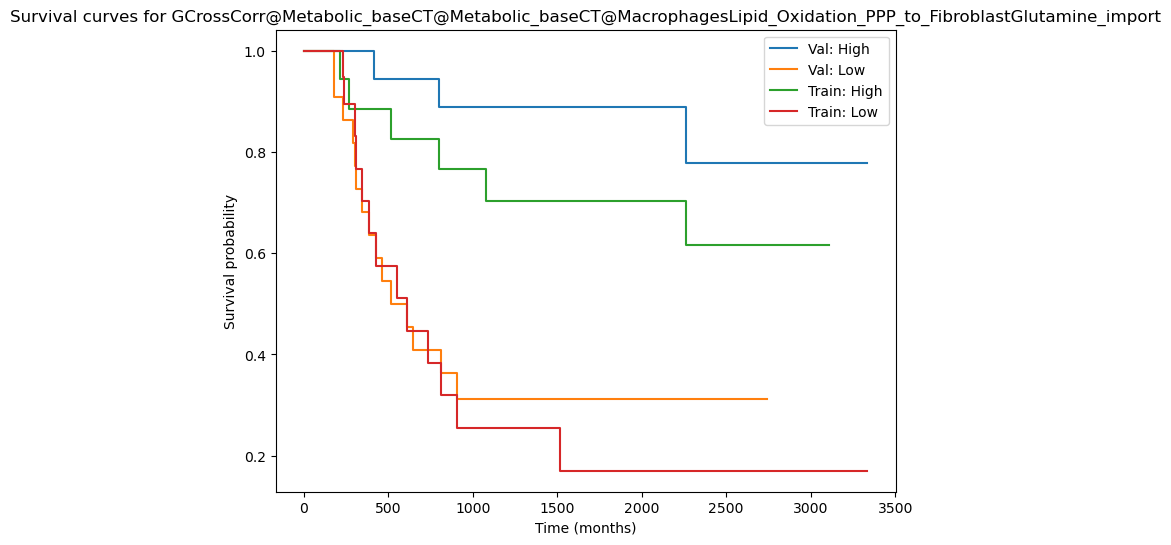

Validation log-rank p = 0.0005
Training log-rank p = 0.0056

===== GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@MacrophagesLipid_Oxidation_PPP_to_Other_Stromal_cellsHypoxic_PPP =====


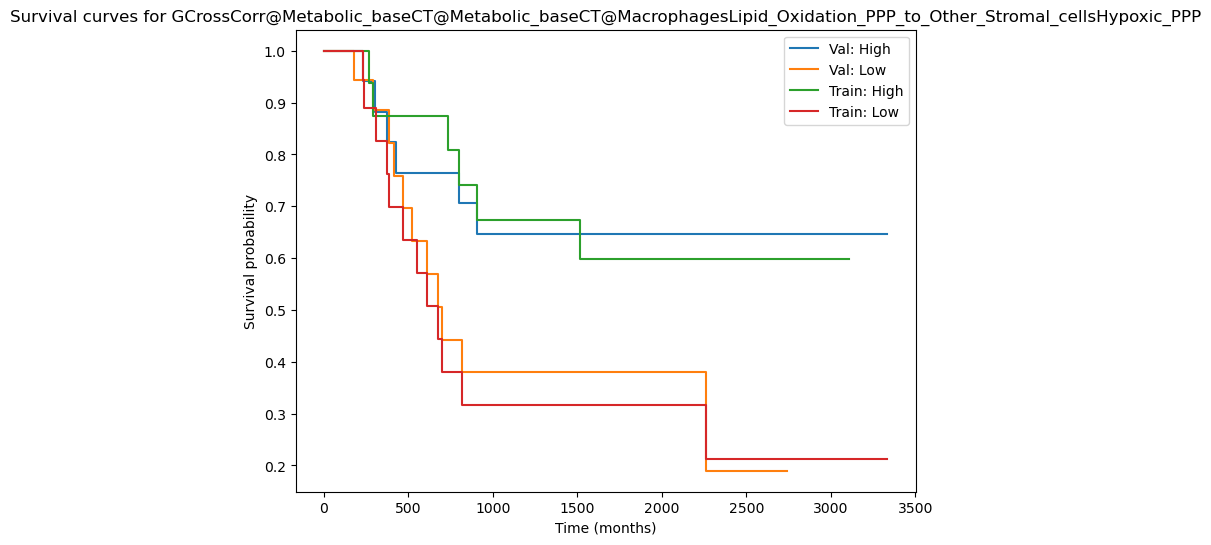

Validation log-rank p = 0.0749
Training log-rank p = 0.0278

===== GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@MacrophagesPPP_Glutamine_import_to_CD4_cellsPPP_Glutamine_import =====


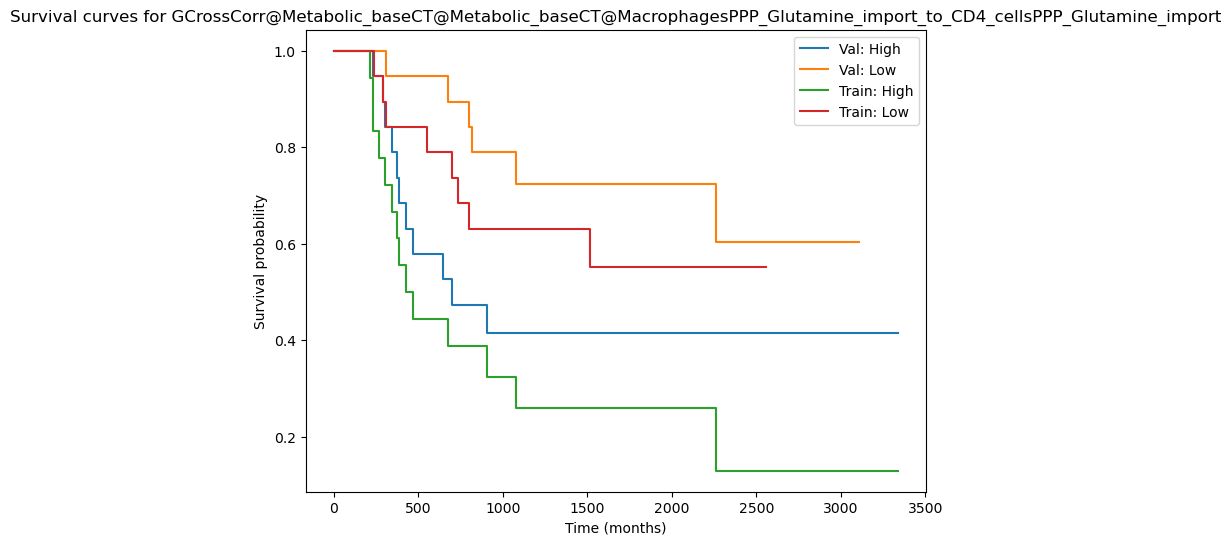

Validation log-rank p = 0.0319
Training log-rank p = 0.0157

===== GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@MacrophagesPhenotype_to_FibroblastGlutamine_import =====


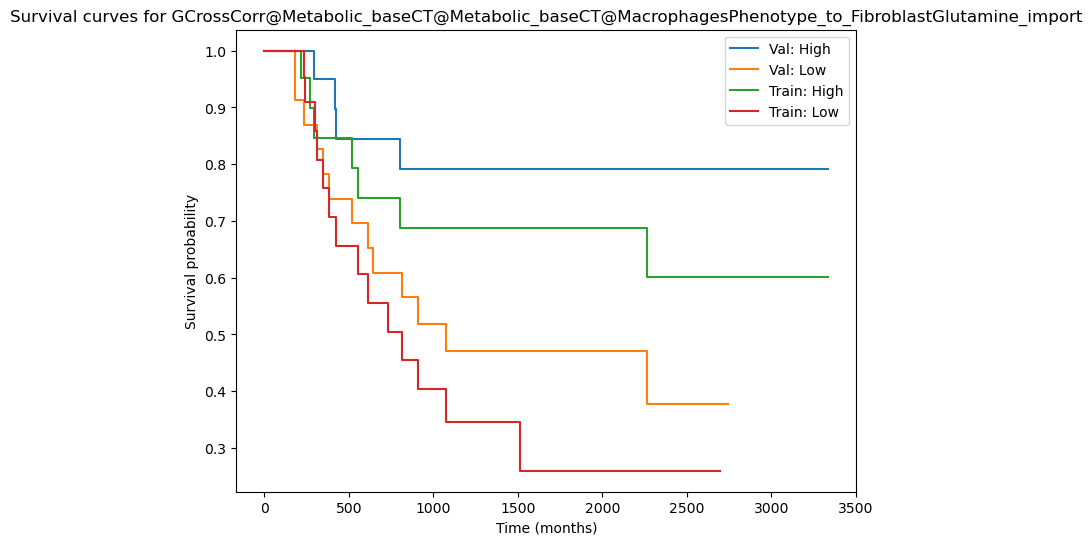

Validation log-rank p = 0.0263
Training log-rank p = 0.0441

===== GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@Other_Stromal_cellsLipid_Oxidation_to_FibroblastGlutamine_import =====


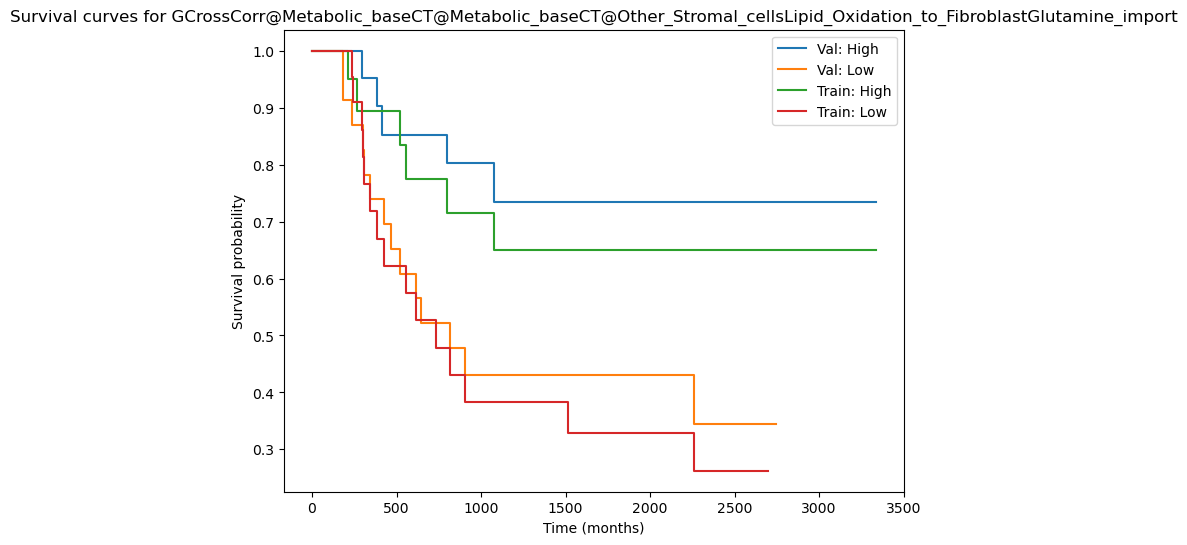

Validation log-rank p = 0.0190
Training log-rank p = 0.0390

===== GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@Other_Stromal_cellsLipid_Oxidation_PPP_Glutamine_import_to_Other_Stromal_cellsGlutamine_import =====


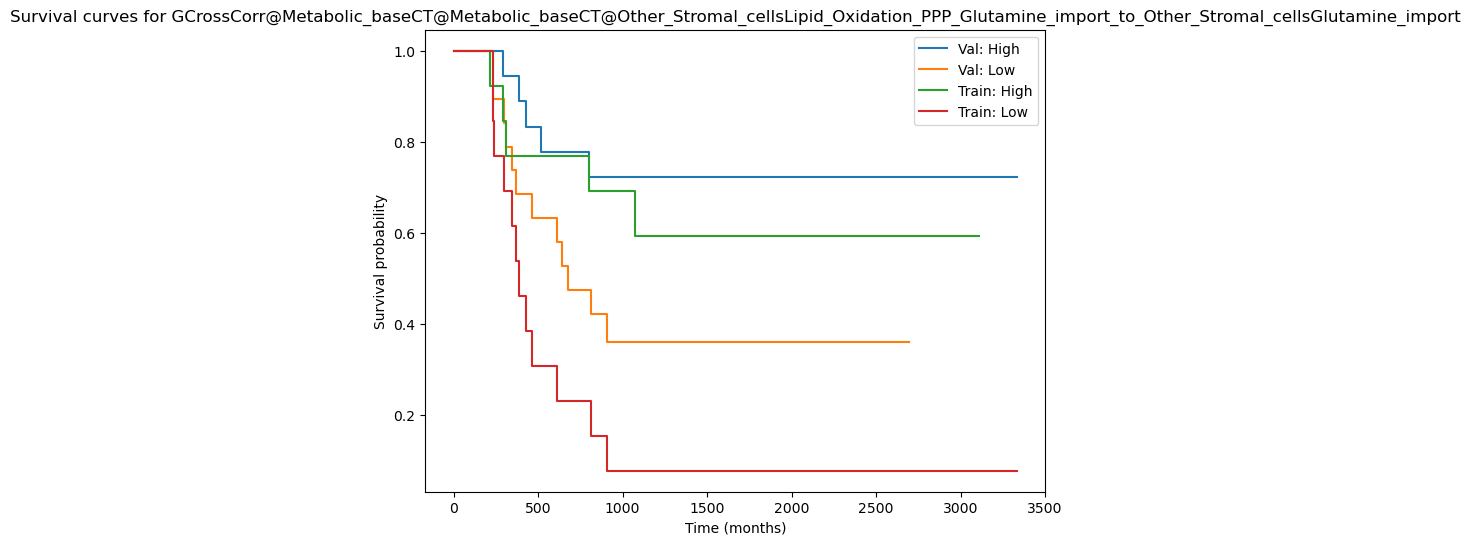

Validation log-rank p = 0.0339
Training log-rank p = 0.0045

===== GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@TumourPhenotype_to_TumourHypoxic =====


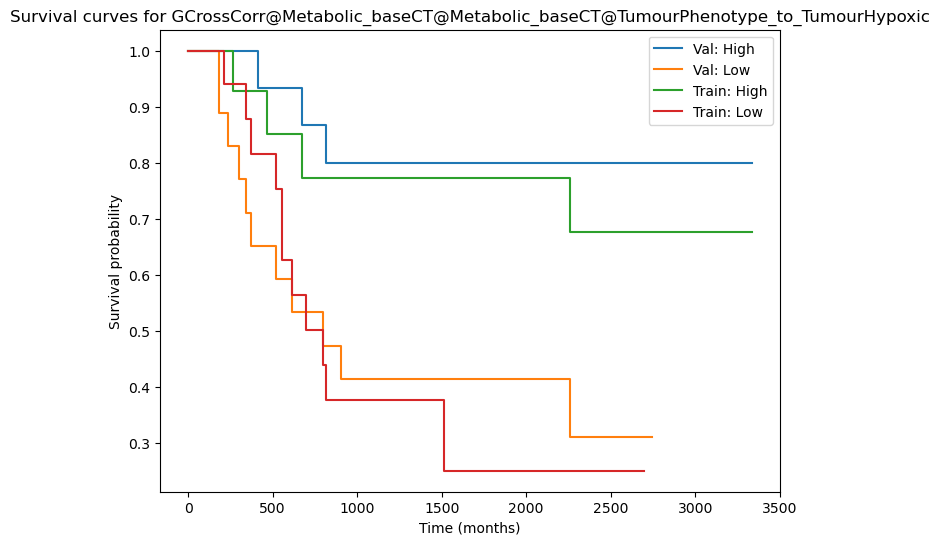

Validation log-rank p = 0.0092
Training log-rank p = 0.0301

===== GCrossCorr@Metabolic_baseCT@Metabolic_baseCT@VesselsLipid_Oxidation_PPP_to_FibroblastGlutamine_import =====


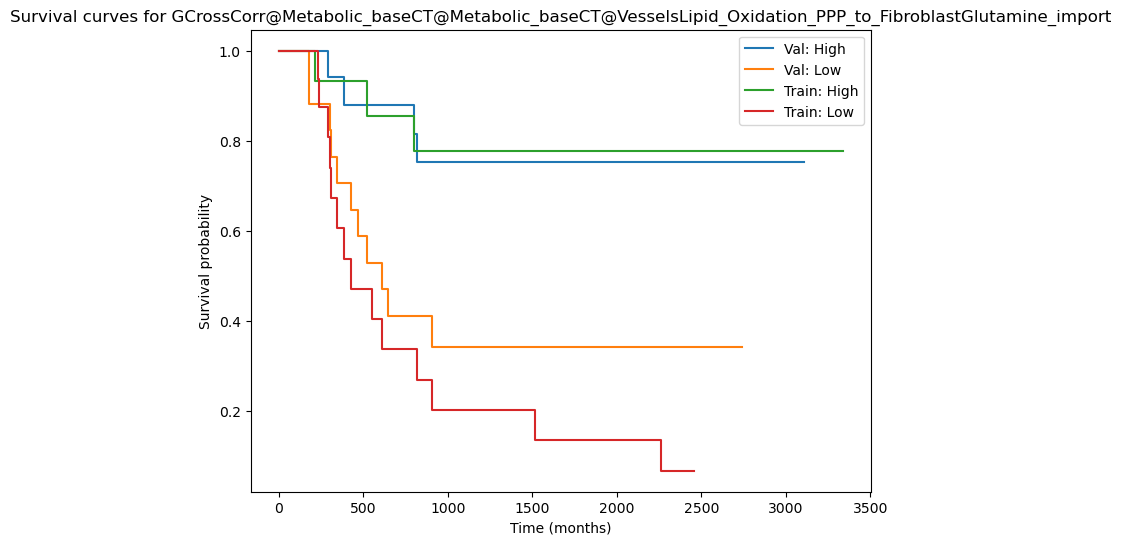

Validation log-rank p = 0.0159
Training log-rank p = 0.0004

===== Entropy@all_cells__Metabolic_baseCT_CD4_cellsHypoxic_Glutamine_import =====


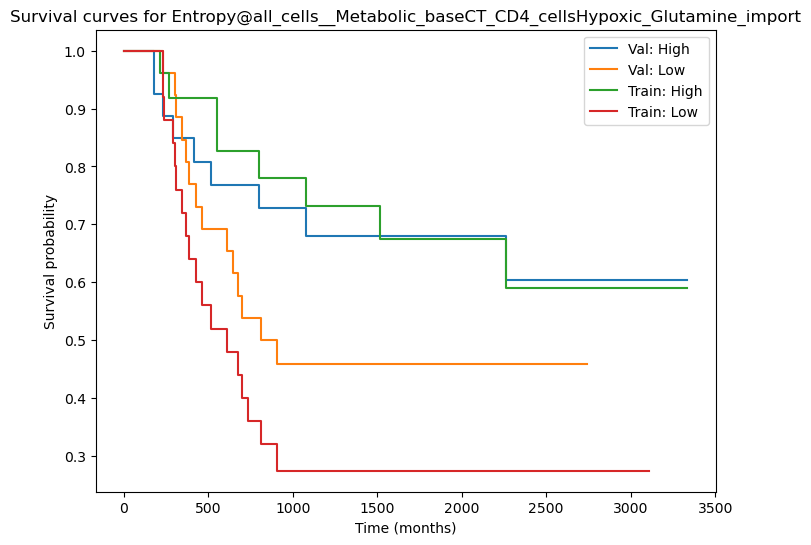

Validation log-rank p = 0.1752
Training log-rank p = 0.0028

===== Entropy@all_cells__Metabolic_baseCT_CD4_cellsLipid_Oxidation_PPP =====


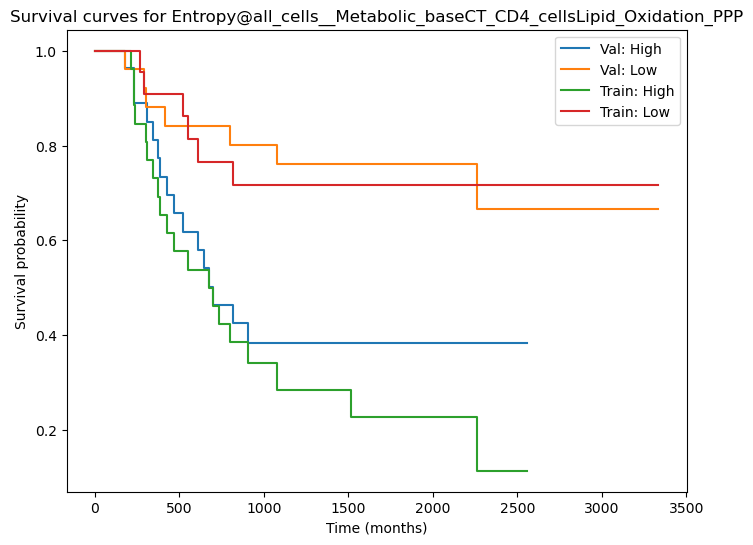

Validation log-rank p = 0.0111
Training log-rank p = 0.0008

===== Entropy@all_cells__Metabolic_baseCT_CD4_cellsLipid_Oxidation_PPP_Glutamine_import =====


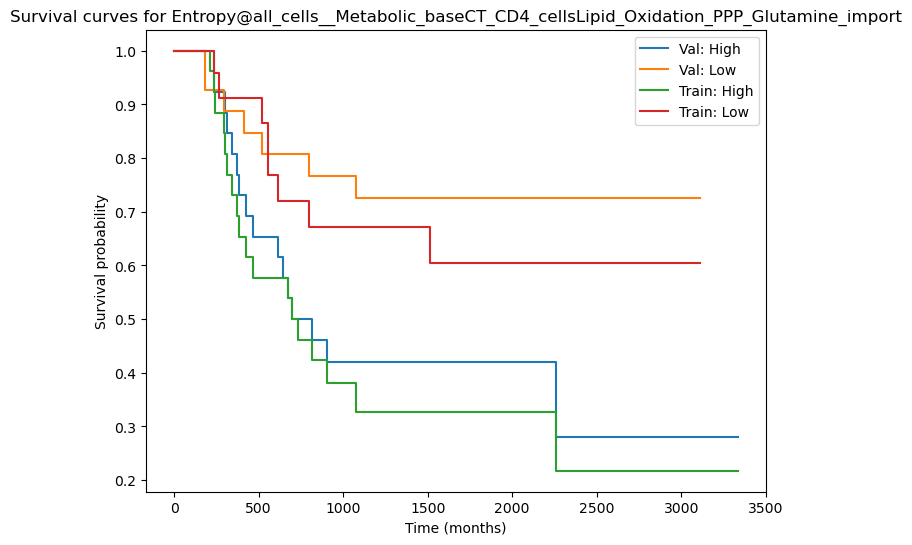

Validation log-rank p = 0.0152
Training log-rank p = 0.0214

===== Entropy@all_cells__Metabolic_baseCT_CD8_cellsHypoxic_Glutamine_import =====


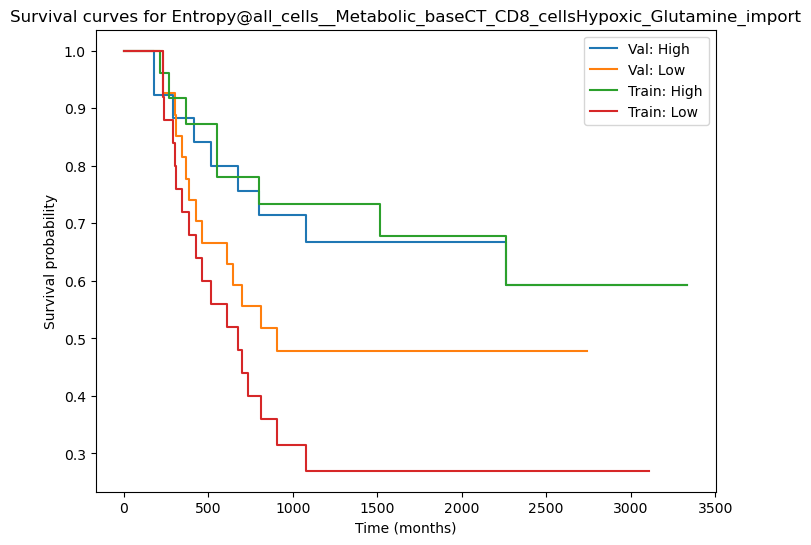

Validation log-rank p = 0.2046
Training log-rank p = 0.0060

===== Entropy@all_cells__Metabolic_baseCT_CD8_cellsLipid_Oxidation_PPP_Glutamine_import =====


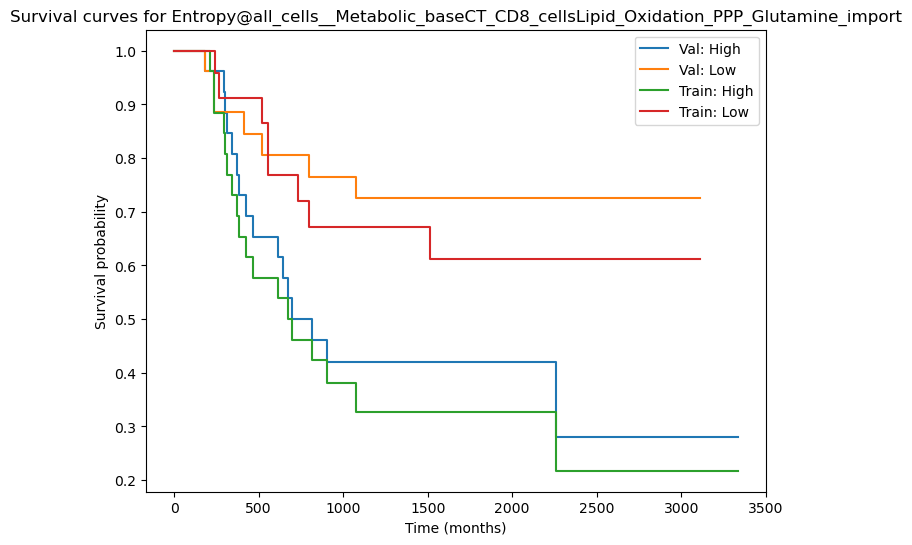

Validation log-rank p = 0.0153
Training log-rank p = 0.0173

===== Entropy@all_cells__Metabolic_baseCT_FibroblastGlutamine_import =====


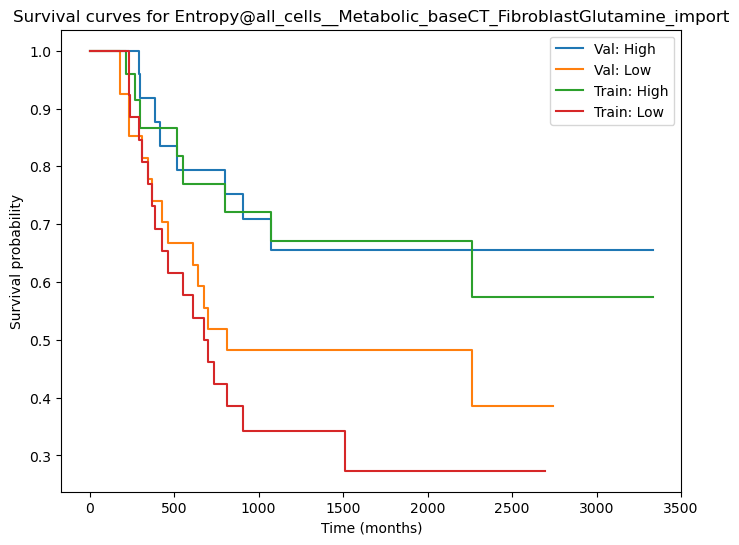

Validation log-rank p = 0.0913
Training log-rank p = 0.0211

===== Entropy@all_cells__Metabolic_baseCT_FibroblastLipid_Oxidation_PPP_Glutamine_import =====


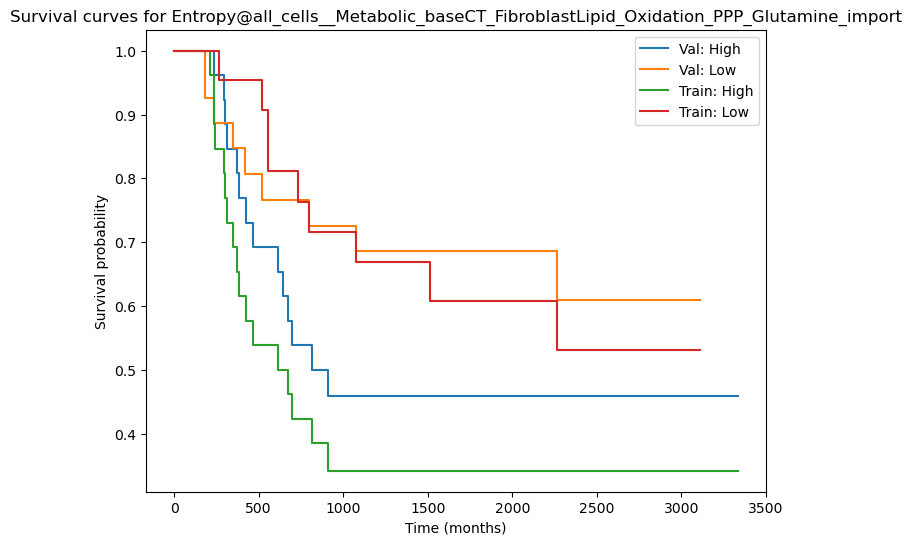

Validation log-rank p = 0.1525
Training log-rank p = 0.0219

===== Entropy@all_cells__Metabolic_allcells_Lipid_Oxidation_PPP_Glutamine_import =====


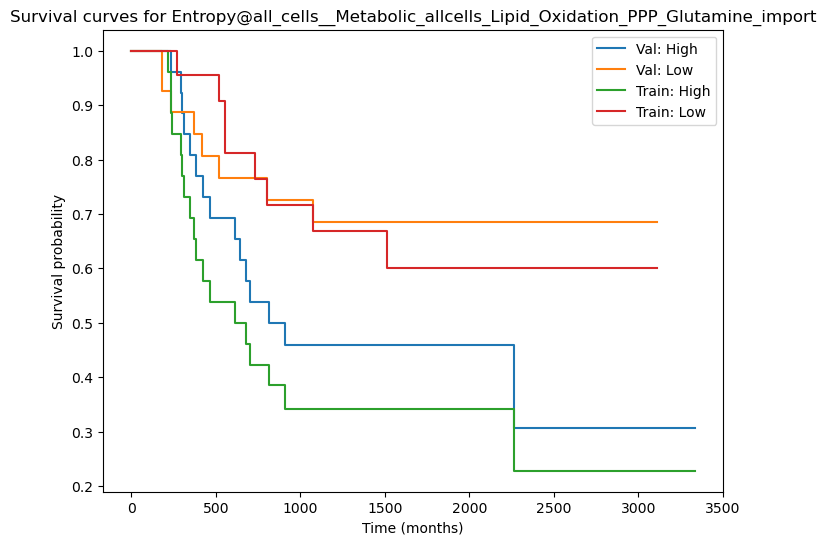

Validation log-rank p = 0.0691
Training log-rank p = 0.0090


In [155]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# Assuming these are your columns
time_column = 'Relapse_followup'
event_column = 'Relapse_status'


# Split into training and validation
validation = df_filter[df_filter['Set'] == 'validation']
training = df_filter[df_filter['Set'] == 'training']

for feature in all_km:
    print(f"\n===== {feature} =====")
    
    # Drop NA for this feature
    df_val = validation[[time_column, event_column, feature]].dropna()
    df_train = training[[time_column, event_column, feature]].dropna()

    # Skip if empty
    if df_val.empty or df_train.empty:
        print(f"{feature} has missing data, skipping.")
        continue

    # Calculate medians
    median_val = df_val[feature].median()
    median_train = df_train[feature].median()

    # Create groups
    df_val['group'] = np.where(df_val[feature] > median_val, 'High', 'Low')
    df_train['group'] = np.where(df_train[feature] > median_train, 'High', 'Low')

    # Fit KM for validation
    kmf = KaplanMeierFitter()
    plt.figure(figsize=(8, 6))
    
    for label, df_sub in df_val.groupby('group'):
        kmf.fit(df_sub[time_column], df_sub[event_column], label=f'Val: {label}')
        kmf.plot_survival_function(ci_show=False)

    # Fit KM for training
    for label, df_sub in df_train.groupby('group'):
        kmf.fit(df_sub[time_column], df_sub[event_column], label=f'Train: {label}')
        kmf.plot_survival_function(ci_show=False)

    plt.title(f'Survival curves for {feature}')
    plt.xlabel('Time (months)')
    plt.ylabel('Survival probability')
    plt.legend()
    plt.savefig(f'Feature_csv/Aaron/figures/km_{feature}_all.svg')
    plt.show()

    # Log-rank tests (Val)
    T_high_val = df_val[df_val['group'] == 'High'][time_column]
    E_high_val = df_val[df_val['group'] == 'High'][event_column]
    T_low_val = df_val[df_val['group'] == 'Low'][time_column]
    E_low_val = df_val[df_val['group'] == 'Low'][event_column]

    result_val = logrank_test(T_high_val, T_low_val, event_observed_A=E_high_val, event_observed_B=E_low_val)
    print(f'Validation log-rank p = {result_val.p_value:.4f}')

    # Log-rank tests (Train)
    T_high_train = df_train[df_train['group'] == 'High'][time_column]
    E_high_train = df_train[df_train['group'] == 'High'][event_column]
    T_low_train = df_train[df_train['group'] == 'Low'][time_column]
    E_low_train = df_train[df_train['group'] == 'Low'][event_column]

    result_train = logrank_test(T_high_train, T_low_train, event_observed_A=E_high_train, event_observed_B=E_low_train)
    print(f'Training log-rank p = {result_train.p_value:.4f}')


In [ ]:
for feature in luad:

import os
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test




validation = df_filter[df_filter['Set']=='validation']
training = df_filter[df_filter['Set']=='training']
df_subset_val = validation[['Relapse_followup', 'Relapse_status', feature]].dropna()
df_subset_training = training[['Relapse_followup', 'Relapse_status', feature]].dropna()
median_value_val = df_subset_val[feature].median()
median_value_train = df_subset_training[feature].median()
# Split into two groups based on median
df_subset_val['group'] = np.where(df_subset_val[feature] > median_value, 'High_val', 'Low_val')
df_subset_training['group'] = np.where(df_subset_training[feature] > median_value, 'High_train', 'Low_train')

df_subset= df_filter[['Relapse_followup', 'Relapse_status', feature]].dropna()

T_high_val = df_subset_val[df_subset_val['group'] == 'High_val'][time_column]
E_high_val = df_subset_val[df_subset_val['group'] == 'High_val'][event_column]
T_low_val = df_subset_val[df_subset_val['group'] == 'Low_val'][time_column]
E_low_val = df_subset_val[df_subset_val['group'] == 'Low_val'][event_column]


T_high_train = df_subset_training[df_subset_training['group'] == 'High_train'][time_column]
E_high_train = df_subset_training[df_subset_training['group'] == 'High_train'][event_column]
T_low_train= df_subset_training[df_subset_training['group'] == 'Low_train'][time_column]
E_low_train= df_subset_training[df_subset_training['group'] == 'Low_train'][event_column]
# Log-rank test
result = logrank_test(T_high, T_low, event_observed_A=E_high, event_observed_B=E_low)
